# FDNY Data & Geocoding

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#FDNY-Data-&amp;-Geocoding" data-toc-modified-id="FDNY-Data-&amp;-Geocoding-1">FDNY Data &amp; Geocoding</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Getting-Data-from-NYC-Open-Data" data-toc-modified-id="Getting-Data-from-NYC-Open-Data-1.2">Getting Data from NYC Open Data</a></span><ul class="toc-item"><li><span><a href="#FDNY-Incidents" data-toc-modified-id="FDNY-Incidents-1.2.1">FDNY Incidents</a></span></li></ul></li><li><span><a href="#Geocode-Fire-Incidents" data-toc-modified-id="Geocode-Fire-Incidents-1.3">Geocode Fire Incidents</a></span></li><li><span><a href="#Assign-Geocoded-Fire-Incidents-to-Census-Tracts" data-toc-modified-id="Assign-Geocoded-Fire-Incidents-to-Census-Tracts-1.4">Assign Geocoded Fire Incidents to Census Tracts</a></span><ul class="toc-item"><li><span><a href="#Geographic-Imports" data-toc-modified-id="Geographic-Imports-1.4.1">Geographic Imports</a></span></li><li><span><a href="#Read-in-Census-Tract-Shapefile" data-toc-modified-id="Read-in-Census-Tract-Shapefile-1.4.2">Read in Census Tract Shapefile</a></span></li><li><span><a href="#Reproject-Fire-Incident-Points" data-toc-modified-id="Reproject-Fire-Incident-Points-1.4.3">Reproject Fire Incident Points</a></span></li><li><span><a href="#Create-Fire-Incident-Point-GeoDataFrame" data-toc-modified-id="Create-Fire-Incident-Point-GeoDataFrame-1.4.4">Create Fire Incident Point GeoDataFrame</a></span></li><li><span><a href="#Map-of-Fire-Incidents" data-toc-modified-id="Map-of-Fire-Incidents-1.4.5">Map of Fire Incidents</a></span></li><li><span><a href="#Spatially-Join-GeoDataFrames" data-toc-modified-id="Spatially-Join-GeoDataFrames-1.4.6">Spatially Join GeoDataFrames</a></span></li><li><span><a href="#Datetime-Columns-(Month-&amp;-Year)" data-toc-modified-id="Datetime-Columns-(Month-&amp;-Year)-1.4.7">Datetime Columns (Month &amp; Year)</a></span></li><li><span><a href="#Group-Incidents-by-Census-Tract,-Year,-Month" data-toc-modified-id="Group-Incidents-by-Census-Tract,-Year,-Month-1.4.8">Group Incidents by Census Tract, Year, Month</a></span></li><li><span><a href="#Reconcile-Differences-in-Census-Tracts-between-Datasets" data-toc-modified-id="Reconcile-Differences-in-Census-Tracts-between-Datasets-1.4.9">Reconcile Differences in Census Tracts between Datasets</a></span></li></ul></li><li><span><a href="#MODELS" data-toc-modified-id="MODELS-1.5">MODELS</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-1.5.1">Train Test Split</a></span></li></ul></li></ul></li></ul></div>

## Imports

In [18]:
import pandas as pd
from sodapy import Socrata
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import geocoder

## Getting Data from NYC Open Data

In [57]:
## LOAD SOCRATA NYC OPEN DATA API TOKEN
with open('./nycopendata_credentials.json') as cred_data:
    info = json.load(cred_data)
    app_token = info['app_token']
    secret_token = info['secret_token']

### FDNY Incidents

In [58]:
client = Socrata("data.cityofnewyork.us",
                 app_token=app_token)

# Incidents Responded to by Fire Companies
# from: https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd
api_id = 'tm6d-hbzd'
fires = client.get(api_id, limit=2518758)
# Convert to pandas DataFrame
fdny_incidents = pd.DataFrame.from_records(fires)

In [59]:
fdny_incidents.head().T

0  \
action_taken1_desc            42 - HazMat detection, monitoring, sampling, &...   
action_taken2_desc                                               51 - Ventilate   
action_taken3_desc                                             86 - Investigate   
aes_presence_desc                                                           NaN   
arrival_date_time                                       2018-07-01T00:00:32.000   
borough_desc                                                          2 - Bronx   
co_detector_present_desc                                                    Yes   
detector_presence_desc                                                      NaN   
fire_box                                                                   2928   
fire_origin_below_grade_flag                                                NaN   
fire_spread_desc                                                            NaN   
floor                                                                         1   
highest_level_desc                                             11 - First Alarm   
im_incident_key                                                        63476768   
incident_date_time                                      2018-06-30T23:55:29.000   
incident_type_desc             746 - Carbon monoxide detector activation, no CO   
last_unit_cleared_date_time                             2018-07-01T00:22:57.000   
property_use_desc                                    429 - Multifamily dwelling   
standpipe_sys_present_flag                                                  NaN   
story_fire_origin_count                                                     NaN   
street_highway                                                   UNDERCLIFF AVE   
total_incident_duration                                                    1648   
units_onscene                                                                 2   
zip_code                                                                  10453   

                                                              1  \
action_taken1_desc                     00 - Action taken, other   
action_taken2_desc                                          NaN   
action_taken3_desc                                          NaN   
aes_presence_desc                                           NaN   
arrival_date_time                       2018-06-30T23:58:59.000   
borough_desc                                       4 - Brooklyn   
co_detector_present_desc                                    NaN   
detector_presence_desc                                      NaN   
fire_box                                                   1021   
fire_origin_below_grade_flag                                NaN   
fire_spread_desc                                            NaN   
floor                                                       NaN   
highest_level_desc                             11 - First Alarm   
im_incident_key                                        63476763   
incident_date_time                      2018-06-30T23:54:44.000   
incident_type_desc            300 - Rescue, EMS incident, other   
last_unit_cleared_date_time             2018-07-01T00:09:29.000   
property_use_desc                            UUU - Undetermined   
standpipe_sys_present_flag                                  NaN   
story_fire_origin_count                                     NaN   
street_highway                                       RUTLAND RD   
total_incident_duration                                     885   
units_onscene                                                 1   
zip_code                                                  11203   

                                                             2  \
action_taken1_desc                    00 - Action taken, other   
action_taken2_desc                                         NaN   
action_taken3_desc                                         NaN   
aes_presence_desc                                          NaN

In [60]:
fdny_incidents[fdny_incidents['street_highway']=='DEFAULT RECORD FOR SF'].head()

action_taken1_desc action_taken2_desc action_taken3_desc  \
4   00 - Action taken, other                NaN                NaN   
8      64 - Shut down system                NaN                NaN   
10  00 - Action taken, other                NaN                NaN   
20  00 - Action taken, other                NaN                NaN   
21  00 - Action taken, other                NaN                NaN   

   aes_presence_desc        arrival_date_time  borough_desc  \
4                NaN  2018-06-30T23:56:50.000  4 - Brooklyn   
8                NaN  2018-06-30T23:56:26.000     2 - Bronx   
10               NaN  2018-06-30T23:51:00.000    5 - Queens   
20               NaN  2018-06-30T23:42:53.000  4 - Brooklyn   
21               NaN  2018-06-30T23:42:16.000     2 - Bronx   

   co_detector_present_desc detector_presence_desc fire_box  \
4                       NaN                    NaN     1877   
8                       NaN                    NaN     4790   
10                      NaN                    NaN     7998   
20                      NaN                    NaN     1781   
21                      NaN                    NaN     2258   

   fire_origin_below_grade_flag  ...       incident_date_time  \
4                           NaN  ...  2018-06-30T23:53:33.000   
8                           NaN  ...  2018-06-30T23:48:39.000   
10                          NaN  ...  2018-06-30T23:47:33.000   
20                          NaN  ...  2018-06-30T23:37:54.000   
21                          NaN  ...  2018-06-30T23:37:37.000   

                                incident_type_desc  \
4   710 - Malicious, mischievous false call, other   
8                        522 - Water or steam leak   
10  710 - Malicious, mischievous false call, other   
20  710 - Malicious, mischievous false call, other   
21  710 - Malicious, mischievous false call, other   

   last_unit_cleared_date_time  \
4      2018-06-30T23:57:11.000   
8      2018-06-30T23:59:20.000   
10     2018-06-30T23:51:58.000   
20     2018-06-30T23:43:42.000   
21     2018-06-30T23:43:16.000   

                                    property_use_desc  \
4                                  UUU - Undetermined   
8   962 - Residential street, road or residential ...   
10                                 UUU - Undetermined   
20                                 UUU - Undetermined   
21                                 UUU - Undetermined   

   standpipe_sys_present_flag story_fire_origin_count         street_highway  \
4                         NaN                     NaN  DEFAULT RECORD FOR SF   
8                         NaN                     NaN  DEFAULT RECORD FOR SF   
10                        NaN                     NaN  DEFAULT RECORD FOR SF   
20                        NaN                     NaN  DEFAULT RECORD FOR SF   
21                        NaN                     NaN  DEFAULT RECORD FOR SF   

   total_incident_duration units_onscene zip_code  
4                      218             1    11208  
8                      641             1    10457  
10                     265             1    11368  
20                     348             1    11207  
21                     339             1    10455  

[5 rows x 24 columns]

In [61]:
(fdny_incidents['street_highway']=='DEFAULT RECORD FOR SF').sum()

18830

In [62]:
fdny_incidents.shape

(2518758, 24)

In [63]:
## Remove rows where street is listed as 'DEFAULT RECORD FOR SF'
incidents_df = fdny_incidents[fdny_incidents['street_highway']!='DEFAULT RECORD FOR SF']
incidents_df.reset_index(inplace = True,drop = True)
print(incidents_df.shape)
incidents_df.head()

(2499928, 24)


action_taken1_desc action_taken2_desc  \
0  42 - HazMat detection, monitoring, sampling, &...     51 - Ventilate   
1                           00 - Action taken, other                NaN   
2                           00 - Action taken, other                NaN   
3      11 - Extinguishment by fire service personnel     51 - Ventilate   
4                           00 - Action taken, other                NaN   

  action_taken3_desc aes_presence_desc        arrival_date_time  \
0   86 - Investigate               NaN  2018-07-01T00:00:32.000   
1                NaN               NaN  2018-06-30T23:58:59.000   
2                NaN               NaN  2018-06-30T23:58:29.000   
3                NaN               NaN  2018-06-30T23:58:53.000   
4                NaN               NaN  2018-06-30T23:57:48.000   

    borough_desc co_detector_present_desc detector_presence_desc fire_box  \
0      2 - Bronx                      Yes                    NaN     2928   
1   4 - Brooklyn                      NaN                    NaN     1021   
2      2 - Bronx                      NaN                    NaN     2745   
3      2 - Bronx                      NaN                    NaN     2135   
4  1 - Manhattan                      NaN                    NaN     1765   

  fire_origin_below_grade_flag  ...       incident_date_time  \
0                          NaN  ...  2018-06-30T23:55:29.000   
1                          NaN  ...  2018-06-30T23:54:44.000   
2                          NaN  ...  2018-06-30T23:54:13.000   
3                          NaN  ...  2018-06-30T23:54:08.000   
4                          NaN  ...  2018-06-30T23:53:30.000   

                                  incident_type_desc  \
0   746 - Carbon monoxide detector activation, no CO   
1                  300 - Rescue, EMS incident, other   
2                   651 - Smoke scare, odor of smoke   
3  117 - Commercial Compactor fire, confined to r...   
4                  300 - Rescue, EMS incident, other   

  last_unit_cleared_date_time           property_use_desc  \
0     2018-07-01T00:22:57.000  429 - Multifamily dwelling   
1     2018-07-01T00:09:29.000          UUU - Undetermined   
2     2018-07-01T00:07:50.000          UUU - Undetermined   
3     2018-07-01T00:19:16.000  429 - Multifamily dwelling   
4     2018-07-01T00:10:41.000          UUU - Undetermined   

  standpipe_sys_present_flag story_fire_origin_count  street_highway  \
0                        NaN                     NaN  UNDERCLIFF AVE   
1                        NaN                     NaN      RUTLAND RD   
2                        NaN                     NaN    PROSPECT AVE   
3                        NaN                     NaN        BROWN PL   
4                        NaN                     NaN        W 186 ST   

  total_incident_duration units_onscene zip_code  
0                    1648             2    10453  
1                     885             1    11203  
2                     817             3    10456  
3                    1508             5    10454  
4                    1031             1    10040  

[5 rows x 24 columns]

In [64]:
## Make borough column where values are names of Boroughs
incidents_df['borough'] = [i.split(' - ')[1] for i in incidents_df['borough_desc']]

C:\Users\noaha\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
## Make incident_type_num column where values are incident code numbers
incidents_df['incident_type_num'] = incidents_df['incident_type_desc'].apply(lambda x: x.split('-')[0].strip())

C:\Users\noaha\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [821]:
## Create dictionary of relevant incident codes (structural fires or fires relating to buildings)
fire_codes = {
    # Code 100 Series Incidents - Fires
    # some codes have been removed to focus on fire incidents related to buildings/structures
    '100': 'Fire, other',
    '111': 'Building fire',
    '112': 'Fires in structure other than in a building',
    '114': 'Chimney or flue fire, confined to chimney or flue',
    '115': 'Incinerator overload or malfunction, fire confined',
    '116': 'Fuel burner/boiler malfunction, fire confined',
    '117': 'Commercial Compactor fire, confined to rubbish',
    '120': 'Fire in mobile prop. used as a fixed struc., other',
    '121': 'Fire in mobile home used as fixed residence',
    '122': 'Fire in motor home, camper, recreational vehicle',
    '160': 'Special outside fire, other',
    '161': 'Outside storage fire',
    '162': 'Outside equipment fire',
    '163': 'Outside gas or vapor combustion explosion',
    ## Code 200 Series Incidents - Overpressure Rupture, Explosion, Overheat (No Fire)
    '200': 'Overpressure rupture, explosion, overheat other',
    '210': 'Overpressure rupture from steam, other',
    '211': 'Overpressure rupture of steam pipe or pipeline',
    '212': 'Overpressure rupture of steam boiler',
    '213': 'Steam rupture of pressure or process vessel',
    '220': 'Overpressure rupture from air or gas, other',
    '221': 'Overpressure rupture of air or gas pipe/pipeline',
    '222': 'Overpressure rupture of boiler from air or gas',
    '223': 'Air or gas rupture of pressure or process vessel',
    '231': 'Chemical reaction rupture of process vessel'
}

In [67]:
## Create fire_incidents dataframe, which contains all incidents where the incident code is in fire_codes
fire_incidents = incidents_df[incidents_df['incident_type_num'].isin(fire_codes.keys())]
fire_incidents.reset_index(inplace = True, drop = True)

In [79]:
## Drop all rows where street_highway (street name) is not given
## This is because geocoding will be done on street names
fire_incidents = fire_incidents[fire_incidents['street_highway'].notna()]
fire_incidents.reset_index(inplace = True, drop = True)

In [68]:
print(fire_incidents.shape)
fire_incidents.head()

(103387, 26)


action_taken1_desc   action_taken2_desc  \
0  11 - Extinguishment by fire service personnel       51 - Ventilate   
1  11 - Extinguishment by fire service personnel                  NaN   
2  11 - Extinguishment by fire service personnel                  NaN   
3  11 - Extinguishment by fire service personnel       51 - Ventilate   
4  11 - Extinguishment by fire service personnel  52 - Forcible entry   

                           action_taken3_desc aes_presence_desc  \
0                                         NaN               NaN   
1                                         NaN               NaN   
2                                         NaN               NaN   
3                       64 - Shut down system               NaN   
4  112 - Stretch 1 3/4" line, extinguish fire               NaN   

         arrival_date_time   borough_desc co_detector_present_desc  \
0  2018-06-30T23:58:53.000      2 - Bronx                      NaN   
1  2018-06-30T23:30:01.000  1 - Manhattan                      NaN   
2  2018-06-30T22:17:14.000   4 - Brooklyn                      NaN   
3  2018-06-30T22:11:36.000  1 - Manhattan                      NaN   
4  2018-06-30T21:27:59.000      2 - Bronx                      NaN   

  detector_presence_desc fire_box fire_origin_below_grade_flag  ...  \
0                    NaN     2135                          NaN  ...   
1                    NaN      470                          NaN  ...   
2                    NaN     1646                          NaN  ...   
3                    NaN     1271                          NaN  ...   
4                    NaN     2411                          NaN  ...   

  last_unit_cleared_date_time  \
0     2018-07-01T00:19:16.000   
1     2018-06-30T23:55:05.000   
2     2018-06-30T22:28:02.000   
3     2018-06-30T22:28:52.000   
4     2018-06-30T21:40:12.000   

                                 property_use_desc standpipe_sys_present_flag  \
0                       429 - Multifamily dwelling                        NaN   
1     519 - Food and beverage sales, grocery store                        NaN   
2                       965 - Vehicle parking area                        NaN   
3                       429 - Multifamily dwelling                        NaN   
4  213 - Elementary school, including kindergarten                        NaN   

  story_fire_origin_count street_highway total_incident_duration  \
0                     NaN       BROWN PL                    1508   
1                     NaN        E 14 ST                    1664   
2                     NaN    PROSPECT PL                     982   
3                     NaN  AMSTERDAM AVE                    1213   
4                     NaN     BRYANT AVE                    1010   

  units_onscene zip_code    borough incident_type_num  
0             5    10454      Bronx               117  
1             6    10009  Manhattan               151  
2             1    11233   Brooklyn               151  
3             5    10025  Manhattan               117  
4             1    10474      Bronx               151  

[5 rows x 26 columns]

In [69]:
## Save fire_incidents to CSV
fire_incidents.to_csv('./fire_incident_data.csv',index = False)

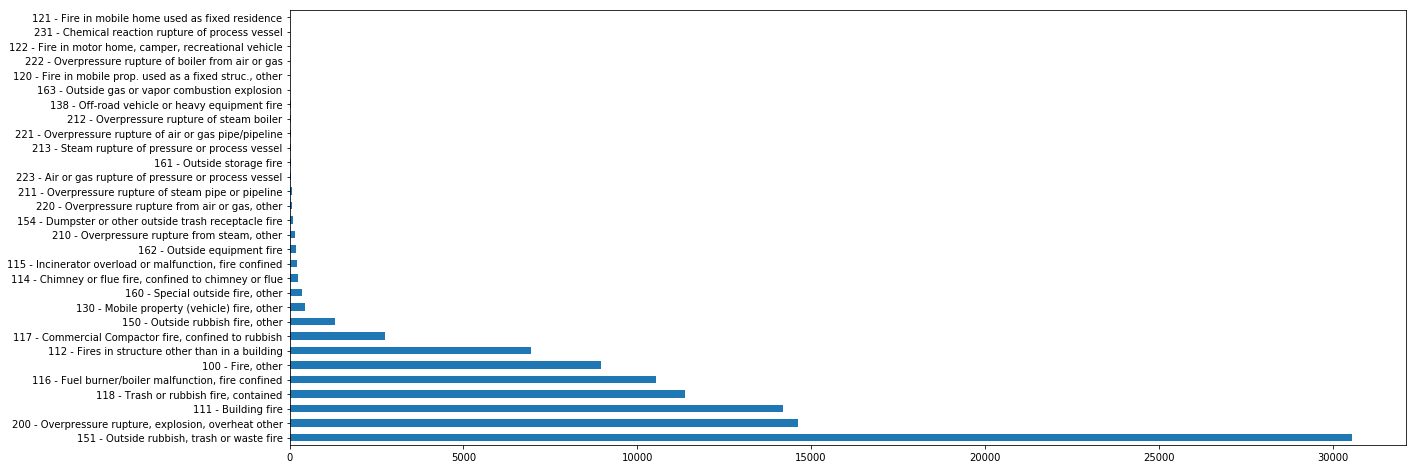

In [70]:
## Number of Fire Incidents by Incident Type
plt.figure(figsize = (20,8))
fire_incidents['incident_type_desc'].value_counts().plot(kind = 'barh')

## Geocode Fire Incidents

In [71]:
## Instantiate lat,lon columns to hold floats
fire_incidents['lat'] = [0.1 for i in fire_incidents.index]
fire_incidents['lon'] = [0.1 for i in fire_incidents.index]

C:\Users\noaha\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\noaha\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
# ## GEOCODE ADDRESSES USING ARCGIS API (DO NOT RERUN)
# ## SAVE AS LAT, LON COLUMNS IN FIRE INCIDENTS DATAFRAME
# for i in fire_incidents.index:
#     addr_str = ''
#     addr_str += fire_incidents['street_highway'][i]
#     addr_str += ', '
#     addr_str += fire_incidents['borough'][i]
#     addr_str += ', NY '
#     addr_str += fire_incidents['zip_code'][i]
#     #print(addr_str)
#     g = geocoder.arcgis(addr_str)
#     #print(g.json)
#     fire_incidents['lat'][i] = g.lat
#     fire_incidents['lon'][i] = g.lng
#     print(f'Geocoded {i+1}/{len(fire_incidents.index)}')

C:\Users\noaha\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\noaha\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Geocoded 44280/103374
Geocoded 44281/103374
Geocoded 44282/103374
Geocoded 44283/103374
Geocoded 44284/103374
Geocoded 44285/103374
Geocoded 44286/103374
Geocoded 44287/103374
Geocoded 44288/103374
Geocoded 44289/103374
Geocoded 44290/103374
Geocoded 44291/103374
Geocoded 44292/103374
Geocoded 44293/103374
Geocoded 44294/103374
Geocoded 44295/103374
Geocoded 44296/103374
Geocoded 44297/103374
Geocoded 44298/103374
Geocoded 44299/103374
Geocoded 44300/103374
Geocoded 44301/103374
Geocoded 44302/103374
Geocoded 44303/103374
Geocoded 44304/103374
Geocoded 44305/103374
Geocoded 44306/103374
Geocoded 44307/103374
Geocoded 44308/103374
Geocoded 44309/103374
Geocoded 44310/103374
Geocoded 44311/103374
Geocoded 44312/103374
Geocoded 44313/103374
Geocoded 44314/103374
Geocoded 44315/103374
Geocoded 44316/103374
Geocoded 44317/103374
Geocoded 44318/103374
Geocoded 44319/103374
Geocoded 44320/103374
Geocoded 44321/103374
Geocoded 44322/103374
Geocoded 44323/103374
Geocoded 44324/103374
Geocoded 4

Geocoded 44653/103374
Geocoded 44654/103374
Geocoded 44655/103374
Geocoded 44656/103374
Geocoded 44657/103374
Geocoded 44658/103374
Geocoded 44659/103374
Geocoded 44660/103374
Geocoded 44661/103374
Geocoded 44662/103374
Geocoded 44663/103374
Geocoded 44664/103374
Geocoded 44665/103374
Geocoded 44666/103374
Geocoded 44667/103374
Geocoded 44668/103374
Geocoded 44669/103374
Geocoded 44670/103374
Geocoded 44671/103374
Geocoded 44672/103374
Geocoded 44673/103374
Geocoded 44674/103374
Geocoded 44675/103374
Geocoded 44676/103374
Geocoded 44677/103374
Geocoded 44678/103374
Geocoded 44679/103374
Geocoded 44680/103374
Geocoded 44681/103374
Geocoded 44682/103374
Geocoded 44683/103374
Geocoded 44684/103374
Geocoded 44685/103374
Geocoded 44686/103374
Geocoded 44687/103374
Geocoded 44688/103374
Geocoded 44689/103374
Geocoded 44690/103374
Geocoded 44691/103374
Geocoded 44692/103374
Geocoded 44693/103374
Geocoded 44694/103374
Geocoded 44695/103374
Geocoded 44696/103374
Geocoded 44697/103374
Geocoded 4

Geocoded 45026/103374
Geocoded 45027/103374
Geocoded 45028/103374
Geocoded 45029/103374
Geocoded 45030/103374
Geocoded 45031/103374
Geocoded 45032/103374
Geocoded 45033/103374
Geocoded 45034/103374
Geocoded 45035/103374
Geocoded 45036/103374
Geocoded 45037/103374
Geocoded 45038/103374
Geocoded 45039/103374
Geocoded 45040/103374
Geocoded 45041/103374
Geocoded 45042/103374
Geocoded 45043/103374
Geocoded 45044/103374
Geocoded 45045/103374
Geocoded 45046/103374
Geocoded 45047/103374
Geocoded 45048/103374
Geocoded 45049/103374
Geocoded 45050/103374
Geocoded 45051/103374
Geocoded 45052/103374
Geocoded 45053/103374
Geocoded 45054/103374
Geocoded 45055/103374
Geocoded 45056/103374
Geocoded 45057/103374
Geocoded 45058/103374
Geocoded 45059/103374
Geocoded 45060/103374
Geocoded 45061/103374
Geocoded 45062/103374
Geocoded 45063/103374
Geocoded 45064/103374
Geocoded 45065/103374
Geocoded 45066/103374
Geocoded 45067/103374
Geocoded 45068/103374
Geocoded 45069/103374
Geocoded 45070/103374
Geocoded 4

Geocoded 45399/103374
Geocoded 45400/103374
Geocoded 45401/103374
Geocoded 45402/103374
Geocoded 45403/103374
Geocoded 45404/103374
Geocoded 45405/103374
Geocoded 45406/103374
Geocoded 45407/103374
Geocoded 45408/103374
Geocoded 45409/103374
Geocoded 45410/103374
Geocoded 45411/103374
Geocoded 45412/103374
Geocoded 45413/103374
Geocoded 45414/103374
Geocoded 45415/103374
Geocoded 45416/103374
Geocoded 45417/103374
Geocoded 45418/103374
Geocoded 45419/103374
Geocoded 45420/103374
Geocoded 45421/103374
Geocoded 45422/103374
Geocoded 45423/103374
Geocoded 45424/103374
Geocoded 45425/103374
Geocoded 45426/103374
Geocoded 45427/103374
Geocoded 45428/103374
Geocoded 45429/103374
Geocoded 45430/103374
Geocoded 45431/103374
Geocoded 45432/103374
Geocoded 45433/103374
Geocoded 45434/103374
Geocoded 45435/103374
Geocoded 45436/103374
Geocoded 45437/103374
Geocoded 45438/103374
Geocoded 45439/103374
Geocoded 45440/103374
Geocoded 45441/103374
Geocoded 45442/103374
Geocoded 45443/103374
Geocoded 4

Geocoded 45772/103374
Geocoded 45773/103374
Geocoded 45774/103374
Geocoded 45775/103374
Geocoded 45776/103374
Geocoded 45777/103374
Geocoded 45778/103374
Geocoded 45779/103374
Geocoded 45780/103374
Geocoded 45781/103374
Geocoded 45782/103374
Geocoded 45783/103374
Geocoded 45784/103374
Geocoded 45785/103374
Geocoded 45786/103374
Geocoded 45787/103374
Geocoded 45788/103374
Geocoded 45789/103374
Geocoded 45790/103374
Geocoded 45791/103374
Geocoded 45792/103374
Geocoded 45793/103374
Geocoded 45794/103374
Geocoded 45795/103374
Geocoded 45796/103374
Geocoded 45797/103374
Geocoded 45798/103374
Geocoded 45799/103374
Geocoded 45800/103374
Geocoded 45801/103374
Geocoded 45802/103374
Geocoded 45803/103374
Geocoded 45804/103374
Geocoded 45805/103374
Geocoded 45806/103374
Geocoded 45807/103374
Geocoded 45808/103374
Geocoded 45809/103374
Geocoded 45810/103374
Geocoded 45811/103374
Geocoded 45812/103374
Geocoded 45813/103374
Geocoded 45814/103374
Geocoded 45815/103374
Geocoded 45816/103374
Geocoded 4

Geocoded 46145/103374
Geocoded 46146/103374
Geocoded 46147/103374
Geocoded 46148/103374
Geocoded 46149/103374
Geocoded 46150/103374
Geocoded 46151/103374
Geocoded 46152/103374
Geocoded 46153/103374
Geocoded 46154/103374
Geocoded 46155/103374
Geocoded 46156/103374
Geocoded 46157/103374
Geocoded 46158/103374
Geocoded 46159/103374
Geocoded 46160/103374
Geocoded 46161/103374
Geocoded 46162/103374
Geocoded 46163/103374
Geocoded 46164/103374
Geocoded 46165/103374
Geocoded 46166/103374
Geocoded 46167/103374
Geocoded 46168/103374
Geocoded 46169/103374
Geocoded 46170/103374
Geocoded 46171/103374
Geocoded 46172/103374
Geocoded 46173/103374
Geocoded 46174/103374
Geocoded 46175/103374
Geocoded 46176/103374
Geocoded 46177/103374
Geocoded 46178/103374
Geocoded 46179/103374
Geocoded 46180/103374
Geocoded 46181/103374
Geocoded 46182/103374
Geocoded 46183/103374
Geocoded 46184/103374
Geocoded 46185/103374
Geocoded 46186/103374
Geocoded 46187/103374
Geocoded 46188/103374
Geocoded 46189/103374
Geocoded 4

Geocoded 46518/103374
Geocoded 46519/103374
Geocoded 46520/103374
Geocoded 46521/103374
Geocoded 46522/103374
Geocoded 46523/103374
Geocoded 46524/103374
Geocoded 46525/103374
Geocoded 46526/103374
Geocoded 46527/103374
Geocoded 46528/103374
Geocoded 46529/103374
Geocoded 46530/103374
Geocoded 46531/103374
Geocoded 46532/103374
Geocoded 46533/103374
Geocoded 46534/103374
Geocoded 46535/103374
Geocoded 46536/103374
Geocoded 46537/103374
Geocoded 46538/103374
Geocoded 46539/103374
Geocoded 46540/103374
Geocoded 46541/103374
Geocoded 46542/103374
Geocoded 46543/103374
Geocoded 46544/103374
Geocoded 46545/103374
Geocoded 46546/103374
Geocoded 46547/103374
Geocoded 46548/103374
Geocoded 46549/103374
Geocoded 46550/103374
Geocoded 46551/103374
Geocoded 46552/103374
Geocoded 46553/103374
Geocoded 46554/103374
Geocoded 46555/103374
Geocoded 46556/103374
Geocoded 46557/103374
Geocoded 46558/103374
Geocoded 46559/103374
Geocoded 46560/103374
Geocoded 46561/103374
Geocoded 46562/103374
Geocoded 4

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=BROADWAY%2C+Manhattan%2C+NY+10010&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF041208D0>: Failed to establish a new connection: [WinError 10065] A socket operation was attempted to an unreachable host'))
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=EASTEND+AVE%2C+Manhattan%2C+NY+10028&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF04120BE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo

Geocoded 46701/103374
Geocoded 46702/103374
Geocoded 46703/103374
Geocoded 46704/103374
Geocoded 46705/103374
Geocoded 46706/103374
Geocoded 46707/103374
Geocoded 46708/103374
Geocoded 46709/103374
Geocoded 46710/103374
Geocoded 46711/103374
Geocoded 46712/103374
Geocoded 46713/103374
Geocoded 46714/103374
Geocoded 46715/103374
Geocoded 46716/103374
Geocoded 46717/103374
Geocoded 46718/103374
Geocoded 46719/103374
Geocoded 46720/103374
Geocoded 46721/103374
Geocoded 46722/103374
Geocoded 46723/103374
Geocoded 46724/103374
Geocoded 46725/103374
Geocoded 46726/103374
Geocoded 46727/103374
Geocoded 46728/103374
Geocoded 46729/103374
Geocoded 46730/103374
Geocoded 46731/103374
Geocoded 46732/103374
Geocoded 46733/103374
Geocoded 46734/103374
Geocoded 46735/103374
Geocoded 46736/103374
Geocoded 46737/103374
Geocoded 46738/103374
Geocoded 46739/103374
Geocoded 46740/103374
Geocoded 46741/103374
Geocoded 46742/103374
Geocoded 46743/103374
Geocoded 46744/103374
Geocoded 46745/103374
Geocoded 4

Geocoded 47074/103374
Geocoded 47075/103374
Geocoded 47076/103374
Geocoded 47077/103374
Geocoded 47078/103374
Geocoded 47079/103374
Geocoded 47080/103374
Geocoded 47081/103374
Geocoded 47082/103374
Geocoded 47083/103374
Geocoded 47084/103374
Geocoded 47085/103374
Geocoded 47086/103374
Geocoded 47087/103374
Geocoded 47088/103374
Geocoded 47089/103374
Geocoded 47090/103374
Geocoded 47091/103374
Geocoded 47092/103374
Geocoded 47093/103374
Geocoded 47094/103374
Geocoded 47095/103374
Geocoded 47096/103374
Geocoded 47097/103374
Geocoded 47098/103374
Geocoded 47099/103374
Geocoded 47100/103374
Geocoded 47101/103374
Geocoded 47102/103374
Geocoded 47103/103374
Geocoded 47104/103374
Geocoded 47105/103374
Geocoded 47106/103374
Geocoded 47107/103374
Geocoded 47108/103374
Geocoded 47109/103374
Geocoded 47110/103374
Geocoded 47111/103374
Geocoded 47112/103374
Geocoded 47114/103374
Geocoded 47115/103374
Geocoded 47116/103374
Geocoded 47117/103374
Geocoded 47118/103374
Geocoded 47119/103374
Geocoded 4

Geocoded 47448/103374
Geocoded 47449/103374
Geocoded 47450/103374
Geocoded 47451/103374
Geocoded 47452/103374
Geocoded 47453/103374
Geocoded 47454/103374
Geocoded 47455/103374
Geocoded 47456/103374
Geocoded 47457/103374
Geocoded 47458/103374
Geocoded 47459/103374
Geocoded 47460/103374
Geocoded 47461/103374
Geocoded 47462/103374
Geocoded 47463/103374
Geocoded 47464/103374
Geocoded 47465/103374
Geocoded 47466/103374
Geocoded 47467/103374
Geocoded 47468/103374
Geocoded 47469/103374
Geocoded 47470/103374
Geocoded 47471/103374
Geocoded 47472/103374
Geocoded 47473/103374
Geocoded 47474/103374
Geocoded 47475/103374
Geocoded 47476/103374
Geocoded 47477/103374
Geocoded 47478/103374
Geocoded 47479/103374
Geocoded 47480/103374
Geocoded 47481/103374
Geocoded 47482/103374
Geocoded 47483/103374
Geocoded 47484/103374
Geocoded 47485/103374
Geocoded 47486/103374
Geocoded 47487/103374
Geocoded 47488/103374
Geocoded 47489/103374
Geocoded 47490/103374
Geocoded 47491/103374
Geocoded 47492/103374
Geocoded 4

Geocoded 47821/103374
Geocoded 47822/103374
Geocoded 47823/103374
Geocoded 47824/103374
Geocoded 47825/103374
Geocoded 47826/103374
Geocoded 47827/103374
Geocoded 47828/103374
Geocoded 47829/103374
Geocoded 47830/103374
Geocoded 47831/103374
Geocoded 47832/103374
Geocoded 47833/103374
Geocoded 47834/103374
Geocoded 47835/103374
Geocoded 47836/103374
Geocoded 47837/103374
Geocoded 47838/103374
Geocoded 47839/103374
Geocoded 47840/103374
Geocoded 47841/103374
Geocoded 47842/103374
Geocoded 47843/103374
Geocoded 47844/103374
Geocoded 47845/103374
Geocoded 47846/103374
Geocoded 47847/103374
Geocoded 47848/103374
Geocoded 47849/103374
Geocoded 47850/103374
Geocoded 47851/103374
Geocoded 47852/103374
Geocoded 47853/103374
Geocoded 47854/103374
Geocoded 47855/103374
Geocoded 47856/103374
Geocoded 47857/103374
Geocoded 47858/103374
Geocoded 47859/103374
Geocoded 47860/103374
Geocoded 47861/103374
Geocoded 47862/103374
Geocoded 47863/103374
Geocoded 47864/103374
Geocoded 47865/103374
Geocoded 4

Geocoded 48194/103374
Geocoded 48195/103374
Geocoded 48196/103374
Geocoded 48197/103374
Geocoded 48198/103374
Geocoded 48199/103374
Geocoded 48200/103374
Geocoded 48201/103374
Geocoded 48202/103374
Geocoded 48203/103374
Geocoded 48204/103374
Geocoded 48205/103374
Geocoded 48206/103374
Geocoded 48207/103374
Geocoded 48208/103374
Geocoded 48209/103374
Geocoded 48210/103374
Geocoded 48211/103374
Geocoded 48212/103374
Geocoded 48213/103374
Geocoded 48214/103374
Geocoded 48215/103374
Geocoded 48216/103374
Geocoded 48217/103374
Geocoded 48218/103374
Geocoded 48219/103374
Geocoded 48220/103374
Geocoded 48221/103374
Geocoded 48222/103374
Geocoded 48223/103374
Geocoded 48224/103374
Geocoded 48225/103374
Geocoded 48226/103374
Geocoded 48227/103374
Geocoded 48228/103374
Geocoded 48229/103374
Geocoded 48230/103374
Geocoded 48231/103374
Geocoded 48232/103374
Geocoded 48233/103374
Geocoded 48234/103374
Geocoded 48235/103374
Geocoded 48236/103374
Geocoded 48237/103374
Geocoded 48238/103374
Geocoded 4

Geocoded 48567/103374
Geocoded 48568/103374
Geocoded 48569/103374
Geocoded 48570/103374
Geocoded 48571/103374
Geocoded 48572/103374
Geocoded 48573/103374
Geocoded 48574/103374
Geocoded 48575/103374
Geocoded 48576/103374
Geocoded 48577/103374
Geocoded 48578/103374
Geocoded 48579/103374
Geocoded 48580/103374
Geocoded 48581/103374
Geocoded 48582/103374
Geocoded 48583/103374
Geocoded 48584/103374
Geocoded 48585/103374
Geocoded 48586/103374
Geocoded 48587/103374
Geocoded 48588/103374
Geocoded 48589/103374
Geocoded 48590/103374
Geocoded 48591/103374
Geocoded 48592/103374
Geocoded 48593/103374
Geocoded 48594/103374
Geocoded 48595/103374
Geocoded 48596/103374
Geocoded 48597/103374
Geocoded 48598/103374
Geocoded 48599/103374
Geocoded 48600/103374
Geocoded 48601/103374
Geocoded 48602/103374
Geocoded 48603/103374
Geocoded 48604/103374
Geocoded 48605/103374
Geocoded 48606/103374
Geocoded 48607/103374
Geocoded 48608/103374
Geocoded 48609/103374
Geocoded 48610/103374
Geocoded 48611/103374
Geocoded 4

Geocoded 48940/103374
Geocoded 48941/103374
Geocoded 48942/103374
Geocoded 48943/103374
Geocoded 48944/103374
Geocoded 48945/103374
Geocoded 48946/103374
Geocoded 48947/103374
Geocoded 48948/103374
Geocoded 48949/103374
Geocoded 48950/103374
Geocoded 48951/103374
Geocoded 48952/103374
Geocoded 48953/103374
Geocoded 48954/103374
Geocoded 48955/103374
Geocoded 48956/103374
Geocoded 48957/103374
Geocoded 48958/103374
Geocoded 48959/103374
Geocoded 48960/103374
Geocoded 48961/103374
Geocoded 48962/103374
Geocoded 48963/103374
Geocoded 48964/103374
Geocoded 48965/103374
Geocoded 48966/103374
Geocoded 48967/103374
Geocoded 48968/103374
Geocoded 48969/103374
Geocoded 48970/103374
Geocoded 48971/103374
Geocoded 48972/103374
Geocoded 48973/103374
Geocoded 48974/103374
Geocoded 48975/103374
Geocoded 48976/103374
Geocoded 48977/103374
Geocoded 48978/103374
Geocoded 48979/103374
Geocoded 48980/103374
Geocoded 48981/103374
Geocoded 48982/103374
Geocoded 48983/103374
Geocoded 48984/103374
Geocoded 4

Geocoded 49313/103374
Geocoded 49314/103374
Geocoded 49315/103374
Geocoded 49316/103374
Geocoded 49317/103374
Geocoded 49318/103374
Geocoded 49319/103374
Geocoded 49320/103374
Geocoded 49321/103374
Geocoded 49322/103374
Geocoded 49323/103374
Geocoded 49324/103374
Geocoded 49325/103374
Geocoded 49326/103374
Geocoded 49327/103374
Geocoded 49328/103374
Geocoded 49329/103374
Geocoded 49330/103374
Geocoded 49331/103374
Geocoded 49332/103374
Geocoded 49333/103374
Geocoded 49334/103374
Geocoded 49335/103374
Geocoded 49336/103374
Geocoded 49337/103374
Geocoded 49338/103374
Geocoded 49339/103374
Geocoded 49340/103374
Geocoded 49341/103374
Geocoded 49342/103374
Geocoded 49343/103374
Geocoded 49344/103374
Geocoded 49345/103374
Geocoded 49346/103374
Geocoded 49347/103374
Geocoded 49348/103374
Geocoded 49349/103374
Geocoded 49350/103374
Geocoded 49351/103374
Geocoded 49352/103374
Geocoded 49353/103374
Geocoded 49354/103374
Geocoded 49355/103374
Geocoded 49356/103374
Geocoded 49357/103374
Geocoded 4

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 49453/103374
Geocoded 49454/103374
Geocoded 49455/103374
Geocoded 49456/103374
Geocoded 49457/103374
Geocoded 49458/103374
Geocoded 49459/103374
Geocoded 49460/103374
Geocoded 49461/103374
Geocoded 49462/103374
Geocoded 49463/103374
Geocoded 49464/103374
Geocoded 49465/103374
Geocoded 49466/103374
Geocoded 49467/103374
Geocoded 49468/103374
Geocoded 49469/103374
Geocoded 49470/103374
Geocoded 49471/103374
Geocoded 49472/103374
Geocoded 49473/103374
Geocoded 49474/103374
Geocoded 49475/103374
Geocoded 49476/103374
Geocoded 49477/103374
Geocoded 49478/103374
Geocoded 49479/103374
Geocoded 49480/103374
Geocoded 49481/103374
Geocoded 49482/103374
Geocoded 49483/103374
Geocoded 49484/103374
Geocoded 49485/103374
Geocoded 49486/103374
Geocoded 49487/103374
Geocoded 49488/103374
Geocoded 49489/103374
Geocoded 49490/103374
Geocoded 49491/103374
Geocoded 49492/103374
Geocoded 49493/103374
Geocoded 49494/103374
Geocoded 49495/103374
Geocoded 49496/103374
Geocoded 49497/103374
Geocoded 4

Geocoded 49826/103374
Geocoded 49827/103374
Geocoded 49828/103374
Geocoded 49829/103374
Geocoded 49830/103374
Geocoded 49831/103374
Geocoded 49832/103374
Geocoded 49833/103374
Geocoded 49834/103374
Geocoded 49835/103374
Geocoded 49836/103374
Geocoded 49837/103374
Geocoded 49838/103374
Geocoded 49839/103374
Geocoded 49840/103374
Geocoded 49841/103374
Geocoded 49842/103374
Geocoded 49843/103374
Geocoded 49844/103374
Geocoded 49845/103374
Geocoded 49846/103374
Geocoded 49847/103374
Geocoded 49848/103374
Geocoded 49849/103374
Geocoded 49850/103374
Geocoded 49851/103374
Geocoded 49852/103374
Geocoded 49853/103374
Geocoded 49854/103374
Geocoded 49855/103374
Geocoded 49856/103374
Geocoded 49857/103374
Geocoded 49858/103374
Geocoded 49859/103374
Geocoded 49860/103374
Geocoded 49861/103374
Geocoded 49862/103374
Geocoded 49863/103374
Geocoded 49864/103374
Geocoded 49865/103374
Geocoded 49866/103374
Geocoded 49867/103374
Geocoded 49868/103374
Geocoded 49869/103374
Geocoded 49870/103374
Geocoded 4

Geocoded 50199/103374
Geocoded 50200/103374
Geocoded 50201/103374
Geocoded 50202/103374
Geocoded 50203/103374
Geocoded 50204/103374
Geocoded 50205/103374
Geocoded 50206/103374
Geocoded 50207/103374
Geocoded 50208/103374
Geocoded 50209/103374
Geocoded 50210/103374
Geocoded 50211/103374
Geocoded 50212/103374
Geocoded 50213/103374
Geocoded 50214/103374
Geocoded 50215/103374
Geocoded 50216/103374
Geocoded 50217/103374
Geocoded 50218/103374
Geocoded 50219/103374
Geocoded 50220/103374
Geocoded 50221/103374
Geocoded 50222/103374
Geocoded 50223/103374
Geocoded 50224/103374
Geocoded 50225/103374
Geocoded 50226/103374
Geocoded 50227/103374
Geocoded 50228/103374
Geocoded 50229/103374
Geocoded 50230/103374
Geocoded 50231/103374
Geocoded 50232/103374
Geocoded 50233/103374
Geocoded 50234/103374
Geocoded 50235/103374
Geocoded 50236/103374
Geocoded 50237/103374
Geocoded 50238/103374
Geocoded 50239/103374
Geocoded 50240/103374
Geocoded 50241/103374
Geocoded 50242/103374
Geocoded 50243/103374
Geocoded 5

Geocoded 50572/103374
Geocoded 50573/103374
Geocoded 50574/103374
Geocoded 50575/103374
Geocoded 50576/103374
Geocoded 50577/103374
Geocoded 50578/103374
Geocoded 50579/103374
Geocoded 50580/103374
Geocoded 50581/103374
Geocoded 50582/103374
Geocoded 50583/103374
Geocoded 50584/103374
Geocoded 50585/103374
Geocoded 50586/103374
Geocoded 50587/103374
Geocoded 50588/103374
Geocoded 50589/103374
Geocoded 50590/103374
Geocoded 50591/103374
Geocoded 50592/103374
Geocoded 50593/103374
Geocoded 50594/103374
Geocoded 50595/103374
Geocoded 50596/103374
Geocoded 50597/103374
Geocoded 50598/103374
Geocoded 50599/103374
Geocoded 50600/103374
Geocoded 50601/103374
Geocoded 50602/103374
Geocoded 50603/103374
Geocoded 50604/103374
Geocoded 50605/103374
Geocoded 50606/103374
Geocoded 50607/103374
Geocoded 50608/103374
Geocoded 50609/103374
Geocoded 50610/103374
Geocoded 50611/103374
Geocoded 50612/103374
Geocoded 50613/103374
Geocoded 50614/103374
Geocoded 50615/103374
Geocoded 50616/103374
Geocoded 5

Geocoded 50945/103374
Geocoded 50946/103374
Geocoded 50947/103374
Geocoded 50948/103374
Geocoded 50949/103374
Geocoded 50950/103374
Geocoded 50951/103374
Geocoded 50952/103374
Geocoded 50953/103374
Geocoded 50954/103374
Geocoded 50955/103374
Geocoded 50956/103374
Geocoded 50957/103374
Geocoded 50958/103374
Geocoded 50959/103374
Geocoded 50960/103374
Geocoded 50961/103374
Geocoded 50962/103374
Geocoded 50963/103374
Geocoded 50964/103374
Geocoded 50965/103374
Geocoded 50966/103374
Geocoded 50967/103374
Geocoded 50968/103374
Geocoded 50969/103374
Geocoded 50970/103374
Geocoded 50971/103374
Geocoded 50972/103374
Geocoded 50973/103374
Geocoded 50974/103374
Geocoded 50975/103374
Geocoded 50976/103374
Geocoded 50977/103374
Geocoded 50978/103374
Geocoded 50979/103374
Geocoded 50980/103374
Geocoded 50981/103374
Geocoded 50982/103374
Geocoded 50983/103374
Geocoded 50984/103374
Geocoded 50985/103374
Geocoded 50986/103374
Geocoded 50987/103374
Geocoded 50988/103374
Geocoded 50989/103374
Geocoded 5

Geocoded 51318/103374
Geocoded 51319/103374
Geocoded 51320/103374
Geocoded 51321/103374
Geocoded 51322/103374
Geocoded 51323/103374
Geocoded 51324/103374
Geocoded 51325/103374
Geocoded 51326/103374
Geocoded 51327/103374
Geocoded 51328/103374
Geocoded 51329/103374
Geocoded 51330/103374
Geocoded 51331/103374
Geocoded 51332/103374
Geocoded 51333/103374
Geocoded 51334/103374
Geocoded 51335/103374
Geocoded 51336/103374
Geocoded 51337/103374
Geocoded 51338/103374
Geocoded 51339/103374
Geocoded 51340/103374
Geocoded 51341/103374
Geocoded 51342/103374
Geocoded 51343/103374
Geocoded 51344/103374
Geocoded 51345/103374
Geocoded 51346/103374
Geocoded 51347/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51348/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51349/103374
Geocoded 51350/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51351/103374
Geocoded 51352/103374
Geocoded 51353/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51354/103374
Geocoded 51355/103374
Geocoded 51356/103374
Geocoded 51357/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51358/103374
Geocoded 51359/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51360/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51361/103374
Geocoded 51362/103374
Geocoded 51363/103374
Geocoded 51364/103374
Geocoded 51365/103374
Geocoded 51366/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51367/103374
Geocoded 51368/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51369/103374
Geocoded 51370/103374
Geocoded 51371/103374
Geocoded 51372/103374
Geocoded 51373/103374
Geocoded 51374/103374
Geocoded 51375/103374
Geocoded 51376/103374
Geocoded 51377/103374
Geocoded 51378/103374
Geocoded 51379/103374
Geocoded 51380/103374
Geocoded 51381/103374
Geocoded 51382/103374
Geocoded 51383/103374
Geocoded 51384/103374
Geocoded 51385/103374
Geocoded 51386/103374
Geocoded 51387/103374
Geocoded 51388/103374
Geocoded 51389/103374
Geocoded 51390/103374
Geocoded 51391/103374
Geocoded 51392/103374
Geocoded 51393/103374
Geocoded 51394/103374
Geocoded 51395/103374
Geocoded 51396/103374
Geocoded 51397/103374
Geocoded 51398/103374
Geocoded 51399/103374
Geocoded 51400/103374
Geocoded 51401/103374
Geocoded 51402/103374
Geocoded 51403/103374
Geocoded 51404/103374
Geocoded 51405/103374
Geocoded 51406/103374
Geocoded 51407/103374
Geocoded 51408/103374
Geocoded 51409/103374
Geocoded 51410/103374
Geocoded 51411/103374
Geocoded 51412/103374
Geocoded 51413/103374
Geocoded 5

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51434/103374
Geocoded 51435/103374
Geocoded 51436/103374
Geocoded 51437/103374
Geocoded 51438/103374
Geocoded 51439/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51440/103374
Geocoded 51441/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51442/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51443/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 51444/103374
Geocoded 51445/103374
Geocoded 51446/103374
Geocoded 51447/103374
Geocoded 51448/103374
Geocoded 51449/103374
Geocoded 51450/103374
Geocoded 51451/103374
Geocoded 51452/103374
Geocoded 51453/103374
Geocoded 51454/103374
Geocoded 51455/103374
Geocoded 51456/103374
Geocoded 51457/103374
Geocoded 51458/103374
Geocoded 51459/103374
Geocoded 51460/103374
Geocoded 51461/103374
Geocoded 51462/103374
Geocoded 51463/103374
Geocoded 51464/103374
Geocoded 51465/103374
Geocoded 51466/103374
Geocoded 51467/103374
Geocoded 51468/103374
Geocoded 51469/103374
Geocoded 51470/103374
Geocoded 51471/103374
Geocoded 51472/103374
Geocoded 51473/103374
Geocoded 51474/103374
Geocoded 51475/103374
Geocoded 51476/103374
Geocoded 51477/103374
Geocoded 51478/103374
Geocoded 51479/103374
Geocoded 51480/103374
Geocoded 51481/103374
Geocoded 51482/103374
Geocoded 51483/103374
Geocoded 51484/103374
Geocoded 51485/103374
Geocoded 51486/103374
Geocoded 51487/103374
Geocoded 51488/103374
Geocoded 5

Geocoded 51817/103374
Geocoded 51818/103374
Geocoded 51819/103374
Geocoded 51820/103374
Geocoded 51821/103374
Geocoded 51822/103374
Geocoded 51823/103374
Geocoded 51824/103374
Geocoded 51825/103374
Geocoded 51826/103374
Geocoded 51827/103374
Geocoded 51828/103374
Geocoded 51829/103374
Geocoded 51830/103374
Geocoded 51831/103374
Geocoded 51832/103374
Geocoded 51833/103374
Geocoded 51834/103374
Geocoded 51835/103374
Geocoded 51836/103374
Geocoded 51837/103374
Geocoded 51838/103374
Geocoded 51839/103374
Geocoded 51840/103374
Geocoded 51841/103374
Geocoded 51842/103374
Geocoded 51843/103374
Geocoded 51844/103374
Geocoded 51845/103374
Geocoded 51846/103374
Geocoded 51847/103374
Geocoded 51848/103374
Geocoded 51849/103374
Geocoded 51850/103374
Geocoded 51851/103374
Geocoded 51852/103374
Geocoded 51853/103374
Geocoded 51854/103374
Geocoded 51855/103374
Geocoded 51856/103374
Geocoded 51857/103374
Geocoded 51858/103374
Geocoded 51859/103374
Geocoded 51860/103374
Geocoded 51861/103374
Geocoded 5

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52015/103374
Geocoded 52016/103374
Geocoded 52017/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52018/103374
Geocoded 52019/103374
Geocoded 52020/103374
Geocoded 52021/103374
Geocoded 52022/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52023/103374
Geocoded 52024/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52025/103374
Geocoded 52026/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52027/103374
Geocoded 52028/103374
Geocoded 52029/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52030/103374
Geocoded 52031/103374
Geocoded 52032/103374
Geocoded 52033/103374
Geocoded 52034/103374
Geocoded 52035/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 52036/103374
Geocoded 52037/103374
Geocoded 52038/103374
Geocoded 52039/103374
Geocoded 52040/103374
Geocoded 52041/103374
Geocoded 52042/103374
Geocoded 52043/103374
Geocoded 52044/103374
Geocoded 52045/103374
Geocoded 52046/103374
Geocoded 52047/103374
Geocoded 52048/103374
Geocoded 52049/103374
Geocoded 52050/103374
Geocoded 52051/103374
Geocoded 52052/103374
Geocoded 52053/103374
Geocoded 52054/103374
Geocoded 52055/103374
Geocoded 52056/103374
Geocoded 52057/103374
Geocoded 52058/103374
Geocoded 52059/103374
Geocoded 52060/103374
Geocoded 52061/103374
Geocoded 52062/103374
Geocoded 52063/103374
Geocoded 52064/103374
Geocoded 52065/103374
Geocoded 52066/103374
Geocoded 52067/103374
Geocoded 52068/103374
Geocoded 52069/103374
Geocoded 52070/103374
Geocoded 52071/103374
Geocoded 52072/103374
Geocoded 52073/103374
Geocoded 52074/103374
Geocoded 52075/103374
Geocoded 52076/103374
Geocoded 52077/103374
Geocoded 52078/103374
Geocoded 52079/103374
Geocoded 52080/103374
Geocoded 5

Geocoded 52409/103374
Geocoded 52410/103374
Geocoded 52411/103374
Geocoded 52412/103374
Geocoded 52413/103374
Geocoded 52414/103374
Geocoded 52415/103374
Geocoded 52416/103374
Geocoded 52417/103374
Geocoded 52418/103374
Geocoded 52419/103374
Geocoded 52420/103374
Geocoded 52421/103374
Geocoded 52422/103374
Geocoded 52423/103374
Geocoded 52424/103374
Geocoded 52425/103374
Geocoded 52426/103374
Geocoded 52427/103374
Geocoded 52428/103374
Geocoded 52429/103374
Geocoded 52430/103374
Geocoded 52431/103374
Geocoded 52432/103374
Geocoded 52433/103374
Geocoded 52434/103374
Geocoded 52435/103374
Geocoded 52436/103374
Geocoded 52437/103374
Geocoded 52438/103374
Geocoded 52439/103374
Geocoded 52440/103374
Geocoded 52441/103374
Geocoded 52442/103374
Geocoded 52443/103374
Geocoded 52444/103374
Geocoded 52445/103374
Geocoded 52446/103374
Geocoded 52447/103374
Geocoded 52448/103374
Geocoded 52449/103374
Geocoded 52450/103374
Geocoded 52451/103374
Geocoded 52452/103374
Geocoded 52453/103374
Geocoded 5

Geocoded 52782/103374
Geocoded 52783/103374
Geocoded 52784/103374
Geocoded 52785/103374
Geocoded 52786/103374
Geocoded 52787/103374
Geocoded 52788/103374
Geocoded 52789/103374
Geocoded 52790/103374
Geocoded 52791/103374
Geocoded 52792/103374
Geocoded 52793/103374
Geocoded 52794/103374
Geocoded 52795/103374
Geocoded 52796/103374
Geocoded 52797/103374
Geocoded 52798/103374
Geocoded 52799/103374
Geocoded 52800/103374
Geocoded 52801/103374
Geocoded 52802/103374
Geocoded 52803/103374
Geocoded 52804/103374
Geocoded 52805/103374
Geocoded 52806/103374
Geocoded 52807/103374
Geocoded 52808/103374
Geocoded 52809/103374
Geocoded 52810/103374
Geocoded 52811/103374
Geocoded 52812/103374
Geocoded 52813/103374
Geocoded 52814/103374
Geocoded 52815/103374
Geocoded 52816/103374
Geocoded 52817/103374
Geocoded 52818/103374
Geocoded 52819/103374
Geocoded 52820/103374
Geocoded 52821/103374
Geocoded 52822/103374
Geocoded 52823/103374
Geocoded 52824/103374
Geocoded 52825/103374
Geocoded 52826/103374
Geocoded 5

Geocoded 53155/103374
Geocoded 53156/103374
Geocoded 53157/103374
Geocoded 53158/103374
Geocoded 53159/103374
Geocoded 53160/103374
Geocoded 53161/103374
Geocoded 53162/103374
Geocoded 53163/103374
Geocoded 53164/103374
Geocoded 53165/103374
Geocoded 53166/103374
Geocoded 53167/103374
Geocoded 53168/103374
Geocoded 53169/103374
Geocoded 53170/103374
Geocoded 53171/103374
Geocoded 53172/103374
Geocoded 53173/103374
Geocoded 53174/103374
Geocoded 53175/103374
Geocoded 53176/103374
Geocoded 53177/103374
Geocoded 53178/103374
Geocoded 53179/103374
Geocoded 53180/103374
Geocoded 53181/103374
Geocoded 53182/103374
Geocoded 53183/103374
Geocoded 53184/103374
Geocoded 53185/103374
Geocoded 53186/103374
Geocoded 53187/103374
Geocoded 53188/103374
Geocoded 53189/103374
Geocoded 53190/103374
Geocoded 53191/103374
Geocoded 53192/103374
Geocoded 53193/103374
Geocoded 53194/103374
Geocoded 53195/103374
Geocoded 53196/103374
Geocoded 53197/103374
Geocoded 53198/103374
Geocoded 53199/103374
Geocoded 5

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53492/103374
Geocoded 53493/103374
Geocoded 53494/103374
Geocoded 53495/103374
Geocoded 53496/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53497/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53498/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53499/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53500/103374
Geocoded 53501/103374
Geocoded 53502/103374
Geocoded 53503/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53504/103374
Geocoded 53505/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53506/103374
Geocoded 53507/103374
Geocoded 53508/103374
Geocoded 53509/103374
Geocoded 53510/103374
Geocoded 53511/103374
Geocoded 53512/103374
Geocoded 53513/103374
Geocoded 53514/103374
Geocoded 53515/103374
Geocoded 53516/103374
Geocoded 53517/103374
Geocoded 53518/103374
Geocoded 53519/103374
Geocoded 53520/103374
Geocoded 53521/103374
Geocoded 53522/103374
Geocoded 53523/103374
Geocoded 53524/103374
Geocoded 53525/103374
Geocoded 53526/103374
Geocoded 53527/103374
Geocoded 53528/103374
Geocoded 53529/103374
Geocoded 53530/103374
Geocoded 53531/103374
Geocoded 53532/103374
Geocoded 53533/103374
Geocoded 53534/103374
Geocoded 53535/103374
Geocoded 53536/103374
Geocoded 53537/103374
Geocoded 53538/103374
Geocoded 53539/103374
Geocoded 53540/103374
Geocoded 53541/103374
Geocoded 53542/103374
Geocoded 53543/103374
Geocoded 53544/103374
Geocoded 53545/103374
Geocoded 53546/103374
Geocoded 53547/103374
Geocoded 53548/103374
Geocoded 53549/103374
Geocoded 53550/103374
Geocoded 5

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53648/103374
Geocoded 53649/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53650/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53651/103374
Geocoded 53652/103374
Geocoded 53653/103374
Geocoded 53654/103374
Geocoded 53655/103374
Geocoded 53656/103374
Geocoded 53657/103374
Geocoded 53658/103374
Geocoded 53659/103374
Geocoded 53660/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53661/103374
Geocoded 53662/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 53663/103374
Geocoded 53664/103374
Geocoded 53665/103374
Geocoded 53666/103374
Geocoded 53667/103374
Geocoded 53668/103374
Geocoded 53669/103374
Geocoded 53670/103374
Geocoded 53671/103374
Geocoded 53672/103374
Geocoded 53673/103374
Geocoded 53674/103374
Geocoded 53675/103374
Geocoded 53676/103374
Geocoded 53677/103374
Geocoded 53678/103374
Geocoded 53679/103374
Geocoded 53680/103374
Geocoded 53681/103374
Geocoded 53682/103374
Geocoded 53683/103374
Geocoded 53684/103374
Geocoded 53685/103374
Geocoded 53686/103374
Geocoded 53687/103374
Geocoded 53688/103374
Geocoded 53689/103374
Geocoded 53690/103374
Geocoded 53691/103374
Geocoded 53692/103374
Geocoded 53693/103374
Geocoded 53694/103374
Geocoded 53695/103374
Geocoded 53696/103374
Geocoded 53697/103374
Geocoded 53698/103374
Geocoded 53699/103374
Geocoded 53700/103374
Geocoded 53701/103374
Geocoded 53702/103374
Geocoded 53703/103374
Geocoded 53704/103374
Geocoded 53705/103374
Geocoded 53706/103374
Geocoded 53707/103374
Geocoded 5

Geocoded 54036/103374
Geocoded 54037/103374
Geocoded 54038/103374
Geocoded 54039/103374
Geocoded 54040/103374
Geocoded 54041/103374
Geocoded 54042/103374
Geocoded 54043/103374
Geocoded 54044/103374
Geocoded 54045/103374
Geocoded 54046/103374
Geocoded 54047/103374
Geocoded 54048/103374
Geocoded 54049/103374
Geocoded 54050/103374
Geocoded 54051/103374
Geocoded 54052/103374
Geocoded 54053/103374
Geocoded 54054/103374
Geocoded 54055/103374
Geocoded 54056/103374
Geocoded 54057/103374
Geocoded 54058/103374
Geocoded 54059/103374
Geocoded 54060/103374
Geocoded 54061/103374
Geocoded 54062/103374
Geocoded 54063/103374
Geocoded 54064/103374
Geocoded 54065/103374
Geocoded 54066/103374
Geocoded 54067/103374
Geocoded 54068/103374
Geocoded 54069/103374
Geocoded 54070/103374
Geocoded 54071/103374
Geocoded 54072/103374
Geocoded 54073/103374
Geocoded 54074/103374
Geocoded 54075/103374
Geocoded 54076/103374
Geocoded 54077/103374
Geocoded 54078/103374
Geocoded 54079/103374
Geocoded 54080/103374
Geocoded 5

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54101/103374
Geocoded 54102/103374
Geocoded 54103/103374
Geocoded 54104/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54105/103374
Geocoded 54106/103374
Geocoded 54107/103374
Geocoded 54108/103374
Geocoded 54109/103374
Geocoded 54110/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54111/103374
Geocoded 54112/103374
Geocoded 54113/103374
Geocoded 54114/103374
Geocoded 54115/103374
Geocoded 54116/103374
Geocoded 54117/103374
Geocoded 54118/103374
Geocoded 54119/103374
Geocoded 54120/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54121/103374
Geocoded 54122/103374
Geocoded 54123/103374
Geocoded 54124/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54125/103374
Geocoded 54126/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54127/103374
Geocoded 54128/103374
Geocoded 54129/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54130/103374
Geocoded 54131/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54132/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54133/103374
Geocoded 54134/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54135/103374
Geocoded 54136/103374
Geocoded 54137/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54138/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 54139/103374
Geocoded 54140/103374
Geocoded 54141/103374
Geocoded 54142/103374
Geocoded 54143/103374
Geocoded 54144/103374
Geocoded 54145/103374
Geocoded 54146/103374
Geocoded 54147/103374
Geocoded 54148/103374
Geocoded 54149/103374
Geocoded 54150/103374
Geocoded 54151/103374
Geocoded 54152/103374
Geocoded 54153/103374
Geocoded 54154/103374
Geocoded 54155/103374
Geocoded 54156/103374
Geocoded 54157/103374
Geocoded 54158/103374
Geocoded 54159/103374
Geocoded 54160/103374
Geocoded 54161/103374
Geocoded 54162/103374
Geocoded 54163/103374
Geocoded 54164/103374
Geocoded 54165/103374
Geocoded 54166/103374
Geocoded 54167/103374
Geocoded 54168/103374
Geocoded 54169/103374
Geocoded 54170/103374
Geocoded 54171/103374
Geocoded 54172/103374
Geocoded 54173/103374
Geocoded 54174/103374
Geocoded 54175/103374
Geocoded 54176/103374
Geocoded 54177/103374
Geocoded 54178/103374
Geocoded 54179/103374
Geocoded 54180/103374
Geocoded 54181/103374
Geocoded 54182/103374
Geocoded 54183/103374
Geocoded 5

Geocoded 54512/103374
Geocoded 54513/103374
Geocoded 54514/103374
Geocoded 54515/103374
Geocoded 54516/103374
Geocoded 54517/103374
Geocoded 54518/103374
Geocoded 54519/103374
Geocoded 54520/103374
Geocoded 54521/103374
Geocoded 54522/103374
Geocoded 54523/103374
Geocoded 54524/103374
Geocoded 54525/103374
Geocoded 54526/103374
Geocoded 54527/103374
Geocoded 54528/103374
Geocoded 54529/103374
Geocoded 54530/103374
Geocoded 54531/103374
Geocoded 54532/103374
Geocoded 54533/103374
Geocoded 54534/103374
Geocoded 54535/103374
Geocoded 54536/103374
Geocoded 54537/103374
Geocoded 54538/103374
Geocoded 54539/103374
Geocoded 54540/103374
Geocoded 54541/103374
Geocoded 54542/103374
Geocoded 54543/103374
Geocoded 54544/103374
Geocoded 54545/103374
Geocoded 54546/103374
Geocoded 54547/103374
Geocoded 54548/103374
Geocoded 54549/103374
Geocoded 54550/103374
Geocoded 54551/103374
Geocoded 54552/103374
Geocoded 54553/103374
Geocoded 54554/103374
Geocoded 54555/103374
Geocoded 54556/103374
Geocoded 5

Geocoded 54885/103374
Geocoded 54886/103374
Geocoded 54887/103374
Geocoded 54888/103374
Geocoded 54889/103374
Geocoded 54890/103374
Geocoded 54891/103374
Geocoded 54892/103374
Geocoded 54893/103374
Geocoded 54894/103374
Geocoded 54895/103374
Geocoded 54896/103374
Geocoded 54897/103374
Geocoded 54898/103374
Geocoded 54899/103374
Geocoded 54900/103374
Geocoded 54901/103374
Geocoded 54902/103374
Geocoded 54903/103374
Geocoded 54904/103374
Geocoded 54905/103374
Geocoded 54906/103374
Geocoded 54907/103374
Geocoded 54908/103374
Geocoded 54909/103374
Geocoded 54910/103374
Geocoded 54911/103374
Geocoded 54912/103374
Geocoded 54913/103374
Geocoded 54914/103374
Geocoded 54915/103374
Geocoded 54916/103374
Geocoded 54917/103374
Geocoded 54918/103374
Geocoded 54919/103374
Geocoded 54920/103374
Geocoded 54921/103374
Geocoded 54922/103374
Geocoded 54923/103374
Geocoded 54924/103374
Geocoded 54925/103374
Geocoded 54926/103374
Geocoded 54927/103374
Geocoded 54928/103374
Geocoded 54929/103374
Geocoded 5

Geocoded 55258/103374
Geocoded 55259/103374
Geocoded 55260/103374
Geocoded 55261/103374
Geocoded 55262/103374
Geocoded 55263/103374
Geocoded 55264/103374
Geocoded 55265/103374
Geocoded 55266/103374
Geocoded 55267/103374
Geocoded 55268/103374
Geocoded 55269/103374
Geocoded 55270/103374
Geocoded 55271/103374
Geocoded 55272/103374
Geocoded 55273/103374
Geocoded 55274/103374
Geocoded 55275/103374
Geocoded 55276/103374
Geocoded 55277/103374
Geocoded 55278/103374
Geocoded 55279/103374
Geocoded 55280/103374
Geocoded 55281/103374
Geocoded 55282/103374
Geocoded 55283/103374
Geocoded 55284/103374
Geocoded 55285/103374
Geocoded 55286/103374
Geocoded 55287/103374
Geocoded 55288/103374
Geocoded 55289/103374
Geocoded 55290/103374
Geocoded 55291/103374
Geocoded 55292/103374
Geocoded 55293/103374
Geocoded 55294/103374
Geocoded 55295/103374
Geocoded 55296/103374
Geocoded 55297/103374
Geocoded 55298/103374
Geocoded 55299/103374
Geocoded 55300/103374
Geocoded 55301/103374
Geocoded 55302/103374
Geocoded 5

Geocoded 55631/103374
Geocoded 55632/103374
Geocoded 55633/103374
Geocoded 55634/103374
Geocoded 55635/103374
Geocoded 55636/103374
Geocoded 55637/103374
Geocoded 55638/103374
Geocoded 55639/103374
Geocoded 55640/103374
Geocoded 55641/103374
Geocoded 55642/103374
Geocoded 55643/103374
Geocoded 55644/103374
Geocoded 55645/103374
Geocoded 55646/103374
Geocoded 55647/103374
Geocoded 55648/103374
Geocoded 55649/103374
Geocoded 55650/103374
Geocoded 55651/103374
Geocoded 55652/103374
Geocoded 55653/103374
Geocoded 55654/103374
Geocoded 55655/103374
Geocoded 55656/103374
Geocoded 55657/103374
Geocoded 55658/103374
Geocoded 55659/103374
Geocoded 55660/103374
Geocoded 55661/103374
Geocoded 55662/103374
Geocoded 55663/103374
Geocoded 55664/103374
Geocoded 55665/103374
Geocoded 55666/103374
Geocoded 55667/103374
Geocoded 55668/103374
Geocoded 55669/103374
Geocoded 55670/103374
Geocoded 55671/103374
Geocoded 55672/103374
Geocoded 55673/103374
Geocoded 55674/103374
Geocoded 55675/103374
Geocoded 5

Geocoded 56004/103374
Geocoded 56005/103374
Geocoded 56006/103374
Geocoded 56007/103374
Geocoded 56008/103374
Geocoded 56009/103374
Geocoded 56010/103374
Geocoded 56011/103374
Geocoded 56012/103374
Geocoded 56013/103374
Geocoded 56014/103374
Geocoded 56015/103374
Geocoded 56016/103374
Geocoded 56017/103374
Geocoded 56018/103374
Geocoded 56019/103374
Geocoded 56020/103374
Geocoded 56021/103374
Geocoded 56022/103374
Geocoded 56023/103374
Geocoded 56024/103374
Geocoded 56025/103374
Geocoded 56026/103374
Geocoded 56027/103374
Geocoded 56028/103374
Geocoded 56029/103374
Geocoded 56030/103374
Geocoded 56031/103374
Geocoded 56032/103374
Geocoded 56033/103374
Geocoded 56034/103374
Geocoded 56035/103374
Geocoded 56036/103374
Geocoded 56037/103374
Geocoded 56038/103374
Geocoded 56039/103374
Geocoded 56040/103374
Geocoded 56041/103374
Geocoded 56042/103374
Geocoded 56043/103374
Geocoded 56044/103374
Geocoded 56045/103374
Geocoded 56046/103374
Geocoded 56047/103374
Geocoded 56048/103374
Geocoded 5

Geocoded 56377/103374
Geocoded 56378/103374
Geocoded 56379/103374
Geocoded 56380/103374
Geocoded 56381/103374
Geocoded 56382/103374
Geocoded 56383/103374
Geocoded 56384/103374
Geocoded 56385/103374
Geocoded 56386/103374
Geocoded 56387/103374
Geocoded 56388/103374
Geocoded 56389/103374
Geocoded 56390/103374
Geocoded 56391/103374
Geocoded 56392/103374
Geocoded 56393/103374
Geocoded 56394/103374
Geocoded 56395/103374
Geocoded 56396/103374
Geocoded 56397/103374
Geocoded 56398/103374
Geocoded 56399/103374
Geocoded 56400/103374
Geocoded 56401/103374
Geocoded 56402/103374
Geocoded 56403/103374
Geocoded 56404/103374
Geocoded 56405/103374
Geocoded 56406/103374
Geocoded 56407/103374
Geocoded 56408/103374
Geocoded 56409/103374
Geocoded 56410/103374
Geocoded 56411/103374
Geocoded 56412/103374
Geocoded 56413/103374
Geocoded 56414/103374
Geocoded 56415/103374
Geocoded 56416/103374
Geocoded 56417/103374
Geocoded 56418/103374
Geocoded 56419/103374
Geocoded 56420/103374
Geocoded 56421/103374
Geocoded 5

Geocoded 56750/103374
Geocoded 56751/103374
Geocoded 56752/103374
Geocoded 56753/103374
Geocoded 56754/103374
Geocoded 56755/103374
Geocoded 56756/103374
Geocoded 56757/103374
Geocoded 56758/103374
Geocoded 56759/103374
Geocoded 56760/103374
Geocoded 56761/103374
Geocoded 56762/103374
Geocoded 56763/103374
Geocoded 56764/103374
Geocoded 56765/103374
Geocoded 56766/103374
Geocoded 56767/103374
Geocoded 56768/103374
Geocoded 56769/103374
Geocoded 56770/103374
Geocoded 56771/103374
Geocoded 56772/103374
Geocoded 56773/103374
Geocoded 56774/103374
Geocoded 56775/103374
Geocoded 56776/103374
Geocoded 56777/103374
Geocoded 56778/103374
Geocoded 56779/103374
Geocoded 56780/103374
Geocoded 56781/103374
Geocoded 56782/103374
Geocoded 56783/103374
Geocoded 56784/103374
Geocoded 56785/103374
Geocoded 56786/103374
Geocoded 56787/103374
Geocoded 56788/103374
Geocoded 56789/103374
Geocoded 56790/103374
Geocoded 56791/103374
Geocoded 56792/103374
Geocoded 56793/103374
Geocoded 56794/103374
Geocoded 5

Geocoded 57123/103374
Geocoded 57124/103374
Geocoded 57125/103374
Geocoded 57126/103374
Geocoded 57127/103374
Geocoded 57128/103374
Geocoded 57129/103374
Geocoded 57130/103374
Geocoded 57131/103374
Geocoded 57132/103374
Geocoded 57133/103374
Geocoded 57134/103374
Geocoded 57135/103374
Geocoded 57136/103374
Geocoded 57137/103374
Geocoded 57138/103374
Geocoded 57139/103374
Geocoded 57140/103374
Geocoded 57141/103374
Geocoded 57142/103374
Geocoded 57143/103374
Geocoded 57144/103374
Geocoded 57145/103374
Geocoded 57146/103374
Geocoded 57147/103374
Geocoded 57148/103374
Geocoded 57149/103374
Geocoded 57150/103374
Geocoded 57151/103374
Geocoded 57152/103374
Geocoded 57153/103374
Geocoded 57154/103374
Geocoded 57155/103374
Geocoded 57156/103374
Geocoded 57157/103374
Geocoded 57158/103374
Geocoded 57159/103374
Geocoded 57160/103374
Geocoded 57161/103374
Geocoded 57162/103374
Geocoded 57163/103374
Geocoded 57164/103374
Geocoded 57165/103374
Geocoded 57166/103374
Geocoded 57167/103374
Geocoded 5

Geocoded 57496/103374
Geocoded 57497/103374
Geocoded 57498/103374
Geocoded 57499/103374
Geocoded 57500/103374
Geocoded 57501/103374
Geocoded 57502/103374
Geocoded 57503/103374
Geocoded 57504/103374
Geocoded 57505/103374
Geocoded 57506/103374
Geocoded 57507/103374
Geocoded 57508/103374
Geocoded 57509/103374
Geocoded 57510/103374
Geocoded 57511/103374
Geocoded 57512/103374
Geocoded 57513/103374
Geocoded 57514/103374
Geocoded 57515/103374
Geocoded 57516/103374
Geocoded 57517/103374
Geocoded 57518/103374
Geocoded 57519/103374
Geocoded 57520/103374
Geocoded 57521/103374
Geocoded 57522/103374
Geocoded 57523/103374
Geocoded 57524/103374
Geocoded 57525/103374
Geocoded 57526/103374
Geocoded 57527/103374
Geocoded 57528/103374
Geocoded 57529/103374
Geocoded 57530/103374
Geocoded 57531/103374
Geocoded 57532/103374
Geocoded 57533/103374
Geocoded 57534/103374
Geocoded 57535/103374
Geocoded 57536/103374
Geocoded 57537/103374
Geocoded 57538/103374
Geocoded 57539/103374
Geocoded 57540/103374
Geocoded 5

Geocoded 57869/103374
Geocoded 57870/103374
Geocoded 57871/103374
Geocoded 57872/103374
Geocoded 57873/103374
Geocoded 57874/103374
Geocoded 57875/103374
Geocoded 57876/103374
Geocoded 57877/103374
Geocoded 57878/103374
Geocoded 57879/103374
Geocoded 57880/103374
Geocoded 57881/103374
Geocoded 57882/103374
Geocoded 57883/103374
Geocoded 57884/103374
Geocoded 57885/103374
Geocoded 57886/103374
Geocoded 57887/103374
Geocoded 57888/103374
Geocoded 57889/103374
Geocoded 57890/103374
Geocoded 57891/103374
Geocoded 57892/103374
Geocoded 57893/103374
Geocoded 57894/103374
Geocoded 57895/103374
Geocoded 57896/103374
Geocoded 57897/103374
Geocoded 57898/103374
Geocoded 57899/103374
Geocoded 57900/103374
Geocoded 57901/103374
Geocoded 57902/103374
Geocoded 57903/103374
Geocoded 57904/103374
Geocoded 57905/103374
Geocoded 57906/103374
Geocoded 57907/103374
Geocoded 57908/103374
Geocoded 57909/103374
Geocoded 57910/103374
Geocoded 57911/103374
Geocoded 57912/103374
Geocoded 57913/103374
Geocoded 5

Geocoded 58242/103374
Geocoded 58243/103374
Geocoded 58244/103374
Geocoded 58245/103374
Geocoded 58246/103374
Geocoded 58247/103374
Geocoded 58248/103374
Geocoded 58249/103374
Geocoded 58250/103374
Geocoded 58251/103374
Geocoded 58252/103374
Geocoded 58253/103374
Geocoded 58254/103374
Geocoded 58255/103374
Geocoded 58256/103374
Geocoded 58257/103374
Geocoded 58258/103374
Geocoded 58259/103374
Geocoded 58260/103374
Geocoded 58261/103374
Geocoded 58262/103374
Geocoded 58263/103374
Geocoded 58264/103374
Geocoded 58265/103374
Geocoded 58266/103374
Geocoded 58267/103374
Geocoded 58268/103374
Geocoded 58269/103374
Geocoded 58270/103374
Geocoded 58271/103374
Geocoded 58272/103374
Geocoded 58273/103374
Geocoded 58274/103374
Geocoded 58275/103374
Geocoded 58276/103374
Geocoded 58277/103374
Geocoded 58278/103374
Geocoded 58279/103374
Geocoded 58280/103374
Geocoded 58281/103374
Geocoded 58282/103374
Geocoded 58283/103374
Geocoded 58284/103374
Geocoded 58285/103374
Geocoded 58286/103374
Geocoded 5

Geocoded 58615/103374
Geocoded 58616/103374
Geocoded 58617/103374
Geocoded 58618/103374
Geocoded 58619/103374
Geocoded 58620/103374
Geocoded 58621/103374
Geocoded 58622/103374
Geocoded 58623/103374
Geocoded 58624/103374
Geocoded 58625/103374
Geocoded 58626/103374
Geocoded 58627/103374
Geocoded 58628/103374
Geocoded 58629/103374
Geocoded 58630/103374
Geocoded 58631/103374
Geocoded 58632/103374
Geocoded 58633/103374
Geocoded 58634/103374
Geocoded 58635/103374
Geocoded 58636/103374
Geocoded 58637/103374
Geocoded 58638/103374
Geocoded 58639/103374
Geocoded 58640/103374
Geocoded 58641/103374
Geocoded 58642/103374
Geocoded 58643/103374
Geocoded 58644/103374
Geocoded 58645/103374
Geocoded 58646/103374
Geocoded 58647/103374
Geocoded 58648/103374
Geocoded 58649/103374
Geocoded 58650/103374
Geocoded 58651/103374
Geocoded 58652/103374
Geocoded 58653/103374
Geocoded 58654/103374
Geocoded 58655/103374
Geocoded 58656/103374
Geocoded 58657/103374
Geocoded 58658/103374
Geocoded 58659/103374
Geocoded 5

Geocoded 58989/103374
Geocoded 58990/103374
Geocoded 58991/103374
Geocoded 58992/103374
Geocoded 58993/103374
Geocoded 58994/103374
Geocoded 58995/103374
Geocoded 58996/103374
Geocoded 58997/103374
Geocoded 58998/103374
Geocoded 58999/103374
Geocoded 59000/103374
Geocoded 59001/103374
Geocoded 59002/103374
Geocoded 59003/103374
Geocoded 59004/103374
Geocoded 59005/103374
Geocoded 59006/103374
Geocoded 59007/103374
Geocoded 59008/103374
Geocoded 59009/103374
Geocoded 59010/103374
Geocoded 59011/103374
Geocoded 59012/103374
Geocoded 59013/103374
Geocoded 59014/103374
Geocoded 59015/103374
Geocoded 59016/103374
Geocoded 59017/103374
Geocoded 59018/103374
Geocoded 59019/103374
Geocoded 59020/103374
Geocoded 59021/103374
Geocoded 59022/103374
Geocoded 59023/103374
Geocoded 59024/103374
Geocoded 59025/103374
Geocoded 59026/103374
Geocoded 59027/103374
Geocoded 59028/103374
Geocoded 59029/103374
Geocoded 59030/103374
Geocoded 59031/103374
Geocoded 59032/103374
Geocoded 59033/103374
Geocoded 5

Geocoded 59362/103374
Geocoded 59363/103374
Geocoded 59364/103374
Geocoded 59365/103374
Geocoded 59366/103374
Geocoded 59367/103374
Geocoded 59368/103374
Geocoded 59369/103374
Geocoded 59370/103374
Geocoded 59371/103374
Geocoded 59372/103374
Geocoded 59373/103374
Geocoded 59374/103374
Geocoded 59375/103374
Geocoded 59376/103374
Geocoded 59377/103374
Geocoded 59378/103374
Geocoded 59379/103374
Geocoded 59380/103374
Geocoded 59381/103374
Geocoded 59382/103374
Geocoded 59383/103374
Geocoded 59384/103374
Geocoded 59385/103374
Geocoded 59386/103374
Geocoded 59387/103374
Geocoded 59388/103374
Geocoded 59389/103374
Geocoded 59390/103374
Geocoded 59391/103374
Geocoded 59392/103374
Geocoded 59393/103374
Geocoded 59394/103374
Geocoded 59395/103374
Geocoded 59396/103374
Geocoded 59397/103374
Geocoded 59398/103374
Geocoded 59399/103374
Geocoded 59400/103374
Geocoded 59401/103374
Geocoded 59402/103374
Geocoded 59403/103374
Geocoded 59404/103374
Geocoded 59405/103374
Geocoded 59406/103374
Geocoded 5

Geocoded 59735/103374
Geocoded 59736/103374
Geocoded 59737/103374
Geocoded 59738/103374
Geocoded 59739/103374
Geocoded 59740/103374
Geocoded 59741/103374
Geocoded 59742/103374
Geocoded 59743/103374
Geocoded 59744/103374
Geocoded 59745/103374
Geocoded 59746/103374
Geocoded 59747/103374
Geocoded 59748/103374
Geocoded 59749/103374
Geocoded 59750/103374
Geocoded 59751/103374
Geocoded 59752/103374
Geocoded 59753/103374
Geocoded 59754/103374
Geocoded 59755/103374
Geocoded 59756/103374
Geocoded 59757/103374
Geocoded 59758/103374
Geocoded 59759/103374
Geocoded 59760/103374
Geocoded 59761/103374
Geocoded 59762/103374
Geocoded 59763/103374
Geocoded 59764/103374
Geocoded 59765/103374
Geocoded 59766/103374
Geocoded 59767/103374
Geocoded 59768/103374
Geocoded 59769/103374
Geocoded 59770/103374
Geocoded 59771/103374
Geocoded 59772/103374
Geocoded 59773/103374
Geocoded 59774/103374
Geocoded 59775/103374
Geocoded 59776/103374
Geocoded 59777/103374
Geocoded 59778/103374
Geocoded 59779/103374
Geocoded 5

Geocoded 60108/103374
Geocoded 60109/103374
Geocoded 60110/103374
Geocoded 60111/103374
Geocoded 60112/103374
Geocoded 60113/103374
Geocoded 60114/103374
Geocoded 60115/103374
Geocoded 60116/103374
Geocoded 60117/103374
Geocoded 60118/103374
Geocoded 60119/103374
Geocoded 60120/103374
Geocoded 60121/103374
Geocoded 60122/103374
Geocoded 60123/103374
Geocoded 60124/103374
Geocoded 60125/103374
Geocoded 60126/103374
Geocoded 60127/103374
Geocoded 60128/103374
Geocoded 60129/103374
Geocoded 60130/103374
Geocoded 60131/103374
Geocoded 60132/103374
Geocoded 60133/103374
Geocoded 60134/103374
Geocoded 60135/103374
Geocoded 60136/103374
Geocoded 60137/103374
Geocoded 60138/103374
Geocoded 60139/103374
Geocoded 60140/103374
Geocoded 60141/103374
Geocoded 60142/103374
Geocoded 60143/103374
Geocoded 60144/103374
Geocoded 60145/103374
Geocoded 60146/103374
Geocoded 60147/103374
Geocoded 60148/103374
Geocoded 60149/103374
Geocoded 60150/103374
Geocoded 60151/103374
Geocoded 60152/103374
Geocoded 6

Geocoded 60481/103374
Geocoded 60482/103374
Geocoded 60483/103374
Geocoded 60484/103374
Geocoded 60485/103374
Geocoded 60486/103374
Geocoded 60487/103374
Geocoded 60488/103374
Geocoded 60489/103374
Geocoded 60490/103374
Geocoded 60491/103374
Geocoded 60492/103374
Geocoded 60493/103374
Geocoded 60494/103374
Geocoded 60495/103374
Geocoded 60496/103374
Geocoded 60497/103374
Geocoded 60498/103374
Geocoded 60499/103374
Geocoded 60500/103374
Geocoded 60501/103374
Geocoded 60502/103374
Geocoded 60503/103374
Geocoded 60504/103374
Geocoded 60505/103374
Geocoded 60506/103374
Geocoded 60507/103374
Geocoded 60508/103374
Geocoded 60509/103374
Geocoded 60510/103374
Geocoded 60511/103374
Geocoded 60512/103374
Geocoded 60513/103374
Geocoded 60514/103374
Geocoded 60515/103374
Geocoded 60516/103374
Geocoded 60517/103374
Geocoded 60518/103374
Geocoded 60519/103374
Geocoded 60520/103374
Geocoded 60521/103374
Geocoded 60522/103374
Geocoded 60523/103374
Geocoded 60524/103374
Geocoded 60525/103374
Geocoded 6

Geocoded 60854/103374
Geocoded 60855/103374
Geocoded 60856/103374
Geocoded 60857/103374
Geocoded 60858/103374
Geocoded 60859/103374
Geocoded 60860/103374
Geocoded 60861/103374
Geocoded 60862/103374
Geocoded 60863/103374
Geocoded 60864/103374
Geocoded 60865/103374
Geocoded 60866/103374
Geocoded 60867/103374
Geocoded 60868/103374
Geocoded 60869/103374
Geocoded 60870/103374
Geocoded 60871/103374
Geocoded 60872/103374
Geocoded 60873/103374
Geocoded 60874/103374
Geocoded 60875/103374
Geocoded 60876/103374
Geocoded 60877/103374
Geocoded 60878/103374
Geocoded 60879/103374
Geocoded 60880/103374
Geocoded 60881/103374
Geocoded 60882/103374
Geocoded 60883/103374
Geocoded 60884/103374
Geocoded 60885/103374
Geocoded 60886/103374
Geocoded 60887/103374
Geocoded 60888/103374
Geocoded 60889/103374
Geocoded 60890/103374
Geocoded 60891/103374
Geocoded 60892/103374
Geocoded 60893/103374
Geocoded 60894/103374
Geocoded 60895/103374
Geocoded 60896/103374
Geocoded 60897/103374
Geocoded 60898/103374
Geocoded 6

Geocoded 61227/103374
Geocoded 61228/103374
Geocoded 61229/103374
Geocoded 61230/103374
Geocoded 61231/103374
Geocoded 61232/103374
Geocoded 61233/103374
Geocoded 61234/103374
Geocoded 61235/103374
Geocoded 61236/103374
Geocoded 61237/103374
Geocoded 61238/103374
Geocoded 61239/103374
Geocoded 61240/103374
Geocoded 61241/103374
Geocoded 61242/103374
Geocoded 61243/103374
Geocoded 61244/103374
Geocoded 61245/103374
Geocoded 61246/103374
Geocoded 61247/103374
Geocoded 61248/103374
Geocoded 61249/103374
Geocoded 61250/103374
Geocoded 61251/103374
Geocoded 61252/103374
Geocoded 61253/103374
Geocoded 61254/103374
Geocoded 61255/103374
Geocoded 61256/103374
Geocoded 61257/103374
Geocoded 61258/103374
Geocoded 61259/103374
Geocoded 61260/103374
Geocoded 61261/103374
Geocoded 61262/103374
Geocoded 61263/103374
Geocoded 61264/103374
Geocoded 61265/103374
Geocoded 61266/103374
Geocoded 61267/103374
Geocoded 61268/103374
Geocoded 61269/103374
Geocoded 61270/103374
Geocoded 61271/103374
Geocoded 6

Geocoded 61600/103374
Geocoded 61601/103374
Geocoded 61602/103374
Geocoded 61603/103374
Geocoded 61604/103374
Geocoded 61605/103374
Geocoded 61606/103374
Geocoded 61607/103374
Geocoded 61608/103374
Geocoded 61609/103374
Geocoded 61610/103374
Geocoded 61611/103374
Geocoded 61612/103374
Geocoded 61613/103374
Geocoded 61614/103374
Geocoded 61615/103374
Geocoded 61616/103374
Geocoded 61617/103374
Geocoded 61618/103374
Geocoded 61619/103374
Geocoded 61620/103374
Geocoded 61621/103374
Geocoded 61622/103374
Geocoded 61623/103374
Geocoded 61624/103374
Geocoded 61625/103374
Geocoded 61626/103374
Geocoded 61627/103374
Geocoded 61628/103374
Geocoded 61629/103374
Geocoded 61630/103374
Geocoded 61631/103374
Geocoded 61632/103374
Geocoded 61633/103374
Geocoded 61634/103374
Geocoded 61635/103374
Geocoded 61636/103374
Geocoded 61637/103374
Geocoded 61638/103374
Geocoded 61639/103374
Geocoded 61640/103374
Geocoded 61641/103374
Geocoded 61642/103374
Geocoded 61643/103374
Geocoded 61644/103374
Geocoded 6

Geocoded 61973/103374
Geocoded 61974/103374
Geocoded 61975/103374
Geocoded 61976/103374
Geocoded 61977/103374
Geocoded 61978/103374
Geocoded 61979/103374
Geocoded 61980/103374
Geocoded 61981/103374
Geocoded 61982/103374
Geocoded 61983/103374
Geocoded 61984/103374
Geocoded 61985/103374
Geocoded 61986/103374
Geocoded 61987/103374
Geocoded 61988/103374
Geocoded 61989/103374
Geocoded 61990/103374
Geocoded 61991/103374
Geocoded 61992/103374
Geocoded 61993/103374
Geocoded 61994/103374
Geocoded 61995/103374
Geocoded 61996/103374
Geocoded 61997/103374
Geocoded 61998/103374
Geocoded 61999/103374
Geocoded 62000/103374
Geocoded 62001/103374
Geocoded 62002/103374
Geocoded 62003/103374
Geocoded 62004/103374
Geocoded 62005/103374
Geocoded 62006/103374
Geocoded 62007/103374
Geocoded 62008/103374
Geocoded 62009/103374
Geocoded 62010/103374
Geocoded 62011/103374
Geocoded 62012/103374
Geocoded 62013/103374
Geocoded 62014/103374
Geocoded 62015/103374
Geocoded 62016/103374
Geocoded 62017/103374
Geocoded 6

Geocoded 62346/103374
Geocoded 62347/103374
Geocoded 62348/103374
Geocoded 62349/103374
Geocoded 62350/103374
Geocoded 62351/103374
Geocoded 62352/103374
Geocoded 62353/103374
Geocoded 62354/103374
Geocoded 62355/103374
Geocoded 62356/103374
Geocoded 62357/103374
Geocoded 62358/103374
Geocoded 62359/103374
Geocoded 62360/103374
Geocoded 62361/103374
Geocoded 62362/103374
Geocoded 62363/103374
Geocoded 62364/103374
Geocoded 62365/103374
Geocoded 62366/103374
Geocoded 62367/103374
Geocoded 62368/103374
Geocoded 62369/103374
Geocoded 62370/103374
Geocoded 62371/103374
Geocoded 62372/103374
Geocoded 62373/103374
Geocoded 62374/103374
Geocoded 62375/103374
Geocoded 62376/103374
Geocoded 62377/103374
Geocoded 62378/103374
Geocoded 62379/103374
Geocoded 62380/103374
Geocoded 62381/103374
Geocoded 62382/103374
Geocoded 62383/103374
Geocoded 62384/103374
Geocoded 62385/103374
Geocoded 62386/103374
Geocoded 62387/103374
Geocoded 62388/103374
Geocoded 62389/103374
Geocoded 62390/103374
Geocoded 6

Geocoded 62719/103374
Geocoded 62720/103374
Geocoded 62721/103374
Geocoded 62722/103374
Geocoded 62723/103374
Geocoded 62724/103374
Geocoded 62725/103374
Geocoded 62726/103374
Geocoded 62727/103374
Geocoded 62728/103374
Geocoded 62729/103374
Geocoded 62730/103374
Geocoded 62731/103374
Geocoded 62732/103374
Geocoded 62733/103374
Geocoded 62734/103374
Geocoded 62735/103374
Geocoded 62736/103374
Geocoded 62737/103374
Geocoded 62738/103374
Geocoded 62739/103374
Geocoded 62740/103374
Geocoded 62741/103374
Geocoded 62742/103374
Geocoded 62743/103374
Geocoded 62744/103374
Geocoded 62745/103374
Geocoded 62746/103374
Geocoded 62747/103374
Geocoded 62748/103374
Geocoded 62749/103374
Geocoded 62750/103374
Geocoded 62751/103374
Geocoded 62752/103374
Geocoded 62753/103374
Geocoded 62754/103374
Geocoded 62755/103374
Geocoded 62756/103374
Geocoded 62757/103374
Geocoded 62758/103374
Geocoded 62759/103374
Geocoded 62760/103374
Geocoded 62761/103374
Geocoded 62762/103374
Geocoded 62763/103374
Geocoded 6

Geocoded 63092/103374
Geocoded 63093/103374
Geocoded 63094/103374
Geocoded 63095/103374
Geocoded 63096/103374
Geocoded 63097/103374
Geocoded 63098/103374
Geocoded 63099/103374
Geocoded 63100/103374
Geocoded 63101/103374
Geocoded 63102/103374
Geocoded 63103/103374
Geocoded 63104/103374
Geocoded 63105/103374
Geocoded 63106/103374
Geocoded 63107/103374
Geocoded 63108/103374
Geocoded 63109/103374
Geocoded 63110/103374
Geocoded 63111/103374
Geocoded 63112/103374
Geocoded 63113/103374
Geocoded 63114/103374
Geocoded 63115/103374
Geocoded 63116/103374
Geocoded 63117/103374
Geocoded 63118/103374
Geocoded 63119/103374
Geocoded 63120/103374
Geocoded 63121/103374
Geocoded 63122/103374
Geocoded 63123/103374
Geocoded 63124/103374
Geocoded 63125/103374
Geocoded 63126/103374
Geocoded 63127/103374
Geocoded 63128/103374
Geocoded 63129/103374
Geocoded 63130/103374
Geocoded 63131/103374
Geocoded 63132/103374
Geocoded 63133/103374
Geocoded 63134/103374
Geocoded 63135/103374
Geocoded 63136/103374
Geocoded 6

Geocoded 63465/103374
Geocoded 63466/103374
Geocoded 63467/103374
Geocoded 63468/103374
Geocoded 63469/103374
Geocoded 63470/103374
Geocoded 63471/103374
Geocoded 63472/103374
Geocoded 63473/103374
Geocoded 63474/103374
Geocoded 63475/103374
Geocoded 63476/103374
Geocoded 63477/103374
Geocoded 63478/103374
Geocoded 63479/103374
Geocoded 63480/103374
Geocoded 63481/103374
Geocoded 63482/103374
Geocoded 63483/103374
Geocoded 63484/103374
Geocoded 63485/103374
Geocoded 63486/103374
Geocoded 63487/103374
Geocoded 63488/103374
Geocoded 63489/103374
Geocoded 63490/103374
Geocoded 63491/103374
Geocoded 63492/103374
Geocoded 63493/103374
Geocoded 63494/103374
Geocoded 63495/103374
Geocoded 63496/103374
Geocoded 63497/103374
Geocoded 63498/103374
Geocoded 63499/103374
Geocoded 63500/103374
Geocoded 63501/103374
Geocoded 63502/103374
Geocoded 63503/103374
Geocoded 63504/103374
Geocoded 63505/103374
Geocoded 63506/103374
Geocoded 63507/103374
Geocoded 63508/103374
Geocoded 63509/103374
Geocoded 6

Geocoded 63838/103374
Geocoded 63839/103374
Geocoded 63840/103374
Geocoded 63841/103374
Geocoded 63842/103374
Geocoded 63843/103374
Geocoded 63844/103374
Geocoded 63845/103374
Geocoded 63846/103374
Geocoded 63847/103374
Geocoded 63848/103374
Geocoded 63849/103374
Geocoded 63850/103374
Geocoded 63851/103374
Geocoded 63852/103374
Geocoded 63853/103374
Geocoded 63854/103374
Geocoded 63855/103374
Geocoded 63856/103374
Geocoded 63857/103374
Geocoded 63858/103374
Geocoded 63859/103374
Geocoded 63860/103374
Geocoded 63861/103374
Geocoded 63862/103374
Geocoded 63863/103374
Geocoded 63864/103374
Geocoded 63865/103374
Geocoded 63866/103374
Geocoded 63867/103374
Geocoded 63868/103374
Geocoded 63869/103374
Geocoded 63870/103374
Geocoded 63871/103374
Geocoded 63872/103374
Geocoded 63873/103374
Geocoded 63874/103374
Geocoded 63875/103374
Geocoded 63876/103374
Geocoded 63877/103374
Geocoded 63878/103374
Geocoded 63879/103374
Geocoded 63880/103374
Geocoded 63881/103374
Geocoded 63882/103374
Geocoded 6

Geocoded 64211/103374
Geocoded 64212/103374
Geocoded 64213/103374
Geocoded 64214/103374
Geocoded 64215/103374
Geocoded 64216/103374
Geocoded 64217/103374
Geocoded 64218/103374
Geocoded 64219/103374
Geocoded 64220/103374
Geocoded 64221/103374
Geocoded 64222/103374
Geocoded 64223/103374
Geocoded 64224/103374
Geocoded 64225/103374
Geocoded 64226/103374
Geocoded 64227/103374
Geocoded 64228/103374
Geocoded 64229/103374
Geocoded 64230/103374
Geocoded 64231/103374
Geocoded 64232/103374
Geocoded 64233/103374
Geocoded 64234/103374
Geocoded 64235/103374
Geocoded 64236/103374
Geocoded 64237/103374
Geocoded 64238/103374
Geocoded 64239/103374
Geocoded 64240/103374
Geocoded 64241/103374
Geocoded 64242/103374
Geocoded 64243/103374
Geocoded 64244/103374
Geocoded 64245/103374
Geocoded 64246/103374
Geocoded 64247/103374
Geocoded 64248/103374
Geocoded 64249/103374
Geocoded 64250/103374
Geocoded 64251/103374
Geocoded 64252/103374
Geocoded 64253/103374
Geocoded 64254/103374
Geocoded 64255/103374
Geocoded 6

Geocoded 64584/103374
Geocoded 64585/103374
Geocoded 64586/103374
Geocoded 64587/103374
Geocoded 64588/103374
Geocoded 64589/103374
Geocoded 64590/103374
Geocoded 64591/103374
Geocoded 64592/103374
Geocoded 64593/103374
Geocoded 64594/103374
Geocoded 64595/103374
Geocoded 64596/103374
Geocoded 64597/103374
Geocoded 64598/103374
Geocoded 64599/103374
Geocoded 64600/103374
Geocoded 64601/103374
Geocoded 64602/103374
Geocoded 64603/103374
Geocoded 64604/103374
Geocoded 64605/103374
Geocoded 64606/103374
Geocoded 64607/103374
Geocoded 64608/103374
Geocoded 64609/103374
Geocoded 64610/103374
Geocoded 64611/103374
Geocoded 64612/103374
Geocoded 64613/103374
Geocoded 64614/103374
Geocoded 64615/103374
Geocoded 64616/103374
Geocoded 64617/103374
Geocoded 64618/103374
Geocoded 64619/103374
Geocoded 64620/103374
Geocoded 64621/103374
Geocoded 64622/103374
Geocoded 64623/103374
Geocoded 64624/103374
Geocoded 64625/103374
Geocoded 64626/103374
Geocoded 64627/103374
Geocoded 64628/103374
Geocoded 6

Geocoded 64957/103374
Geocoded 64958/103374
Geocoded 64959/103374
Geocoded 64960/103374
Geocoded 64961/103374
Geocoded 64962/103374
Geocoded 64963/103374
Geocoded 64964/103374
Geocoded 64965/103374
Geocoded 64966/103374
Geocoded 64967/103374
Geocoded 64968/103374
Geocoded 64969/103374
Geocoded 64970/103374
Geocoded 64971/103374
Geocoded 64972/103374
Geocoded 64973/103374
Geocoded 64974/103374
Geocoded 64975/103374
Geocoded 64976/103374
Geocoded 64977/103374
Geocoded 64978/103374
Geocoded 64979/103374
Geocoded 64980/103374
Geocoded 64981/103374
Geocoded 64982/103374
Geocoded 64983/103374
Geocoded 64984/103374
Geocoded 64985/103374
Geocoded 64986/103374
Geocoded 64987/103374
Geocoded 64988/103374
Geocoded 64989/103374
Geocoded 64990/103374
Geocoded 64991/103374
Geocoded 64992/103374
Geocoded 64993/103374
Geocoded 64994/103374
Geocoded 64995/103374
Geocoded 64996/103374
Geocoded 64997/103374
Geocoded 64998/103374
Geocoded 64999/103374
Geocoded 65000/103374
Geocoded 65001/103374
Geocoded 6

Geocoded 65330/103374
Geocoded 65331/103374
Geocoded 65332/103374
Geocoded 65333/103374
Geocoded 65334/103374
Geocoded 65335/103374
Geocoded 65336/103374
Geocoded 65337/103374
Geocoded 65338/103374
Geocoded 65339/103374
Geocoded 65340/103374
Geocoded 65341/103374
Geocoded 65342/103374
Geocoded 65343/103374
Geocoded 65344/103374
Geocoded 65345/103374
Geocoded 65346/103374
Geocoded 65347/103374
Geocoded 65348/103374
Geocoded 65349/103374
Geocoded 65350/103374
Geocoded 65351/103374
Geocoded 65352/103374
Geocoded 65353/103374
Geocoded 65354/103374
Geocoded 65355/103374
Geocoded 65356/103374
Geocoded 65357/103374
Geocoded 65358/103374
Geocoded 65359/103374
Geocoded 65360/103374
Geocoded 65361/103374
Geocoded 65362/103374
Geocoded 65363/103374
Geocoded 65364/103374
Geocoded 65365/103374
Geocoded 65366/103374
Geocoded 65367/103374
Geocoded 65368/103374
Geocoded 65369/103374
Geocoded 65370/103374
Geocoded 65371/103374
Geocoded 65372/103374
Geocoded 65373/103374
Geocoded 65374/103374
Geocoded 6

Geocoded 65703/103374
Geocoded 65704/103374
Geocoded 65705/103374
Geocoded 65706/103374
Geocoded 65707/103374
Geocoded 65708/103374
Geocoded 65709/103374
Geocoded 65710/103374
Geocoded 65711/103374
Geocoded 65712/103374
Geocoded 65713/103374
Geocoded 65714/103374
Geocoded 65715/103374
Geocoded 65716/103374
Geocoded 65717/103374
Geocoded 65718/103374
Geocoded 65719/103374
Geocoded 65720/103374
Geocoded 65721/103374
Geocoded 65722/103374
Geocoded 65723/103374
Geocoded 65724/103374
Geocoded 65725/103374
Geocoded 65726/103374
Geocoded 65727/103374
Geocoded 65728/103374
Geocoded 65729/103374
Geocoded 65730/103374
Geocoded 65731/103374
Geocoded 65732/103374
Geocoded 65733/103374
Geocoded 65734/103374
Geocoded 65735/103374
Geocoded 65736/103374
Geocoded 65737/103374
Geocoded 65738/103374
Geocoded 65739/103374
Geocoded 65740/103374
Geocoded 65741/103374
Geocoded 65742/103374
Geocoded 65743/103374
Geocoded 65744/103374
Geocoded 65745/103374
Geocoded 65746/103374
Geocoded 65747/103374
Geocoded 6

Geocoded 66076/103374
Geocoded 66077/103374
Geocoded 66078/103374
Geocoded 66079/103374
Geocoded 66080/103374
Geocoded 66081/103374
Geocoded 66082/103374
Geocoded 66083/103374
Geocoded 66084/103374
Geocoded 66085/103374
Geocoded 66086/103374
Geocoded 66087/103374
Geocoded 66088/103374
Geocoded 66089/103374
Geocoded 66090/103374
Geocoded 66091/103374
Geocoded 66092/103374
Geocoded 66093/103374
Geocoded 66094/103374
Geocoded 66095/103374
Geocoded 66096/103374
Geocoded 66097/103374
Geocoded 66098/103374
Geocoded 66099/103374
Geocoded 66100/103374
Geocoded 66101/103374
Geocoded 66102/103374
Geocoded 66103/103374
Geocoded 66104/103374
Geocoded 66105/103374
Geocoded 66106/103374
Geocoded 66107/103374
Geocoded 66108/103374
Geocoded 66109/103374
Geocoded 66110/103374
Geocoded 66111/103374
Geocoded 66112/103374
Geocoded 66113/103374
Geocoded 66114/103374
Geocoded 66115/103374
Geocoded 66116/103374
Geocoded 66117/103374
Geocoded 66118/103374
Geocoded 66119/103374
Geocoded 66120/103374
Geocoded 6

Geocoded 66449/103374
Geocoded 66450/103374
Geocoded 66451/103374
Geocoded 66452/103374
Geocoded 66453/103374
Geocoded 66454/103374
Geocoded 66455/103374
Geocoded 66456/103374
Geocoded 66457/103374
Geocoded 66458/103374
Geocoded 66459/103374
Geocoded 66460/103374
Geocoded 66461/103374
Geocoded 66462/103374
Geocoded 66463/103374
Geocoded 66464/103374
Geocoded 66465/103374
Geocoded 66466/103374
Geocoded 66467/103374
Geocoded 66468/103374
Geocoded 66469/103374
Geocoded 66470/103374
Geocoded 66471/103374
Geocoded 66472/103374
Geocoded 66473/103374
Geocoded 66474/103374
Geocoded 66475/103374
Geocoded 66476/103374
Geocoded 66477/103374
Geocoded 66478/103374
Geocoded 66479/103374
Geocoded 66480/103374
Geocoded 66481/103374
Geocoded 66482/103374
Geocoded 66483/103374
Geocoded 66484/103374
Geocoded 66485/103374
Geocoded 66486/103374
Geocoded 66487/103374
Geocoded 66488/103374
Geocoded 66489/103374
Geocoded 66490/103374
Geocoded 66491/103374
Geocoded 66492/103374
Geocoded 66493/103374
Geocoded 6

Geocoded 66822/103374
Geocoded 66823/103374
Geocoded 66824/103374
Geocoded 66825/103374
Geocoded 66826/103374
Geocoded 66827/103374
Geocoded 66828/103374
Geocoded 66829/103374
Geocoded 66830/103374
Geocoded 66831/103374
Geocoded 66832/103374
Geocoded 66833/103374
Geocoded 66834/103374
Geocoded 66835/103374
Geocoded 66836/103374
Geocoded 66837/103374
Geocoded 66838/103374
Geocoded 66839/103374
Geocoded 66840/103374
Geocoded 66841/103374
Geocoded 66842/103374
Geocoded 66843/103374
Geocoded 66844/103374
Geocoded 66845/103374
Geocoded 66846/103374
Geocoded 66847/103374
Geocoded 66848/103374
Geocoded 66849/103374
Geocoded 66850/103374
Geocoded 66851/103374
Geocoded 66852/103374
Geocoded 66853/103374
Geocoded 66854/103374
Geocoded 66855/103374
Geocoded 66856/103374
Geocoded 66857/103374
Geocoded 66858/103374
Geocoded 66859/103374
Geocoded 66860/103374
Geocoded 66861/103374
Geocoded 66862/103374
Geocoded 66863/103374
Geocoded 66864/103374
Geocoded 66865/103374
Geocoded 66866/103374
Geocoded 6

Geocoded 67195/103374
Geocoded 67196/103374
Geocoded 67197/103374
Geocoded 67198/103374
Geocoded 67199/103374
Geocoded 67200/103374
Geocoded 67201/103374
Geocoded 67202/103374
Geocoded 67203/103374
Geocoded 67204/103374
Geocoded 67205/103374
Geocoded 67206/103374
Geocoded 67207/103374
Geocoded 67208/103374
Geocoded 67209/103374
Geocoded 67210/103374
Geocoded 67211/103374
Geocoded 67212/103374
Geocoded 67213/103374
Geocoded 67214/103374
Geocoded 67215/103374
Geocoded 67216/103374
Geocoded 67217/103374
Geocoded 67218/103374
Geocoded 67219/103374
Geocoded 67220/103374
Geocoded 67221/103374
Geocoded 67222/103374
Geocoded 67223/103374
Geocoded 67224/103374
Geocoded 67225/103374
Geocoded 67226/103374
Geocoded 67227/103374
Geocoded 67228/103374
Geocoded 67229/103374
Geocoded 67230/103374
Geocoded 67231/103374
Geocoded 67232/103374
Geocoded 67233/103374
Geocoded 67234/103374
Geocoded 67235/103374
Geocoded 67236/103374
Geocoded 67237/103374
Geocoded 67238/103374
Geocoded 67239/103374
Geocoded 6

Geocoded 67568/103374
Geocoded 67569/103374
Geocoded 67570/103374
Geocoded 67571/103374
Geocoded 67572/103374
Geocoded 67573/103374
Geocoded 67574/103374
Geocoded 67575/103374
Geocoded 67576/103374
Geocoded 67577/103374
Geocoded 67578/103374
Geocoded 67579/103374
Geocoded 67580/103374
Geocoded 67581/103374
Geocoded 67582/103374
Geocoded 67583/103374
Geocoded 67584/103374
Geocoded 67585/103374
Geocoded 67586/103374
Geocoded 67587/103374
Geocoded 67588/103374
Geocoded 67589/103374
Geocoded 67590/103374
Geocoded 67591/103374
Geocoded 67592/103374
Geocoded 67593/103374
Geocoded 67594/103374
Geocoded 67595/103374
Geocoded 67596/103374
Geocoded 67597/103374
Geocoded 67598/103374
Geocoded 67599/103374
Geocoded 67600/103374
Geocoded 67601/103374
Geocoded 67602/103374
Geocoded 67603/103374
Geocoded 67604/103374
Geocoded 67605/103374
Geocoded 67606/103374
Geocoded 67607/103374
Geocoded 67608/103374
Geocoded 67609/103374
Geocoded 67610/103374
Geocoded 67611/103374
Geocoded 67612/103374
Geocoded 6

Geocoded 67941/103374
Geocoded 67942/103374
Geocoded 67943/103374
Geocoded 67944/103374
Geocoded 67945/103374
Geocoded 67946/103374
Geocoded 67947/103374
Geocoded 67948/103374
Geocoded 67949/103374
Geocoded 67950/103374
Geocoded 67951/103374
Geocoded 67952/103374
Geocoded 67953/103374
Geocoded 67954/103374
Geocoded 67955/103374
Geocoded 67956/103374
Geocoded 67957/103374
Geocoded 67958/103374
Geocoded 67959/103374
Geocoded 67960/103374
Geocoded 67961/103374
Geocoded 67962/103374
Geocoded 67963/103374
Geocoded 67964/103374
Geocoded 67965/103374
Geocoded 67966/103374
Geocoded 67967/103374
Geocoded 67968/103374
Geocoded 67969/103374
Geocoded 67970/103374
Geocoded 67971/103374
Geocoded 67972/103374
Geocoded 67973/103374
Geocoded 67974/103374
Geocoded 67975/103374
Geocoded 67976/103374
Geocoded 67977/103374
Geocoded 67978/103374
Geocoded 67979/103374
Geocoded 67980/103374
Geocoded 67981/103374
Geocoded 67982/103374
Geocoded 67983/103374
Geocoded 67984/103374
Geocoded 67985/103374
Geocoded 6

Geocoded 68314/103374
Geocoded 68315/103374
Geocoded 68316/103374
Geocoded 68317/103374
Geocoded 68318/103374
Geocoded 68319/103374
Geocoded 68320/103374
Geocoded 68321/103374
Geocoded 68322/103374
Geocoded 68323/103374
Geocoded 68324/103374
Geocoded 68325/103374
Geocoded 68326/103374
Geocoded 68327/103374
Geocoded 68328/103374
Geocoded 68329/103374
Geocoded 68330/103374
Geocoded 68331/103374
Geocoded 68332/103374
Geocoded 68333/103374
Geocoded 68334/103374
Geocoded 68335/103374
Geocoded 68336/103374
Geocoded 68337/103374
Geocoded 68338/103374
Geocoded 68339/103374
Geocoded 68340/103374
Geocoded 68341/103374
Geocoded 68342/103374
Geocoded 68343/103374
Geocoded 68344/103374
Geocoded 68345/103374
Geocoded 68346/103374
Geocoded 68347/103374
Geocoded 68348/103374
Geocoded 68349/103374
Geocoded 68350/103374
Geocoded 68351/103374
Geocoded 68352/103374
Geocoded 68353/103374
Geocoded 68354/103374
Geocoded 68355/103374
Geocoded 68356/103374
Geocoded 68357/103374
Geocoded 68358/103374
Geocoded 6

Geocoded 68687/103374
Geocoded 68688/103374
Geocoded 68689/103374
Geocoded 68690/103374
Geocoded 68691/103374
Geocoded 68692/103374
Geocoded 68693/103374
Geocoded 68694/103374
Geocoded 68695/103374
Geocoded 68696/103374
Geocoded 68697/103374
Geocoded 68698/103374
Geocoded 68699/103374
Geocoded 68700/103374
Geocoded 68701/103374
Geocoded 68702/103374
Geocoded 68703/103374
Geocoded 68704/103374
Geocoded 68705/103374
Geocoded 68706/103374
Geocoded 68707/103374
Geocoded 68708/103374
Geocoded 68709/103374
Geocoded 68710/103374
Geocoded 68711/103374
Geocoded 68712/103374
Geocoded 68713/103374
Geocoded 68714/103374
Geocoded 68715/103374
Geocoded 68716/103374
Geocoded 68717/103374
Geocoded 68718/103374
Geocoded 68719/103374
Geocoded 68720/103374
Geocoded 68721/103374
Geocoded 68722/103374
Geocoded 68723/103374
Geocoded 68724/103374
Geocoded 68725/103374
Geocoded 68726/103374
Geocoded 68727/103374
Geocoded 68728/103374
Geocoded 68729/103374
Geocoded 68730/103374
Geocoded 68731/103374
Geocoded 6

Geocoded 69060/103374
Geocoded 69061/103374
Geocoded 69062/103374
Geocoded 69063/103374
Geocoded 69064/103374
Geocoded 69065/103374
Geocoded 69066/103374
Geocoded 69067/103374
Geocoded 69068/103374
Geocoded 69069/103374
Geocoded 69070/103374
Geocoded 69071/103374
Geocoded 69072/103374
Geocoded 69073/103374
Geocoded 69074/103374
Geocoded 69075/103374
Geocoded 69076/103374
Geocoded 69077/103374
Geocoded 69078/103374
Geocoded 69079/103374
Geocoded 69080/103374
Geocoded 69081/103374
Geocoded 69082/103374
Geocoded 69083/103374
Geocoded 69084/103374
Geocoded 69085/103374
Geocoded 69086/103374
Geocoded 69087/103374
Geocoded 69088/103374
Geocoded 69089/103374
Geocoded 69090/103374
Geocoded 69091/103374
Geocoded 69092/103374
Geocoded 69093/103374
Geocoded 69094/103374
Geocoded 69095/103374
Geocoded 69096/103374
Geocoded 69097/103374
Geocoded 69098/103374
Geocoded 69099/103374
Geocoded 69100/103374
Geocoded 69101/103374
Geocoded 69102/103374
Geocoded 69103/103374
Geocoded 69104/103374
Geocoded 6

Geocoded 69433/103374
Geocoded 69434/103374
Geocoded 69435/103374
Geocoded 69436/103374
Geocoded 69437/103374
Geocoded 69438/103374
Geocoded 69439/103374
Geocoded 69440/103374
Geocoded 69441/103374
Geocoded 69442/103374
Geocoded 69443/103374
Geocoded 69444/103374
Geocoded 69445/103374
Geocoded 69446/103374
Geocoded 69447/103374
Geocoded 69448/103374
Geocoded 69449/103374
Geocoded 69450/103374
Geocoded 69451/103374
Geocoded 69452/103374
Geocoded 69453/103374
Geocoded 69454/103374
Geocoded 69455/103374
Geocoded 69456/103374
Geocoded 69457/103374
Geocoded 69458/103374
Geocoded 69459/103374
Geocoded 69460/103374
Geocoded 69461/103374
Geocoded 69462/103374
Geocoded 69463/103374
Geocoded 69464/103374
Geocoded 69465/103374
Geocoded 69466/103374
Geocoded 69467/103374
Geocoded 69468/103374
Geocoded 69469/103374
Geocoded 69470/103374
Geocoded 69471/103374
Geocoded 69472/103374
Geocoded 69473/103374
Geocoded 69474/103374
Geocoded 69475/103374
Geocoded 69476/103374
Geocoded 69477/103374
Geocoded 6

Geocoded 69806/103374
Geocoded 69807/103374
Geocoded 69808/103374
Geocoded 69809/103374
Geocoded 69810/103374
Geocoded 69811/103374
Geocoded 69812/103374
Geocoded 69813/103374
Geocoded 69814/103374
Geocoded 69815/103374
Geocoded 69816/103374
Geocoded 69817/103374
Geocoded 69818/103374
Geocoded 69819/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=BELMONT+AVE%2C+Brooklyn%2C+NY+11212&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF0410A438>: Failed to establish a new connection: [WinError 10065] A socket operation was attempted to an unreachable host'))
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=31+ST%2C+Queens%2C+NY+11105&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF040FF4E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed

Geocoded 69820/103374
Geocoded 69821/103374
Geocoded 69822/103374
Geocoded 69823/103374
Geocoded 69824/103374
Geocoded 69825/103374
Geocoded 69826/103374
Geocoded 69827/103374
Geocoded 69828/103374
Geocoded 69829/103374
Geocoded 69830/103374
Geocoded 69831/103374
Geocoded 69832/103374
Geocoded 69833/103374
Geocoded 69834/103374
Geocoded 69835/103374
Geocoded 69836/103374
Geocoded 69837/103374
Geocoded 69838/103374
Geocoded 69839/103374
Geocoded 69840/103374
Geocoded 69841/103374
Geocoded 69842/103374
Geocoded 69843/103374
Geocoded 69844/103374
Geocoded 69845/103374
Geocoded 69846/103374
Geocoded 69847/103374
Geocoded 69848/103374
Geocoded 69849/103374
Geocoded 69850/103374
Geocoded 69851/103374
Geocoded 69852/103374
Geocoded 69853/103374
Geocoded 69854/103374
Geocoded 69855/103374
Geocoded 69856/103374
Geocoded 69857/103374
Geocoded 69858/103374
Geocoded 69859/103374
Geocoded 69860/103374
Geocoded 69861/103374
Geocoded 69862/103374
Geocoded 69863/103374
Geocoded 69864/103374
Geocoded 6

Geocoded 70193/103374
Geocoded 70194/103374
Geocoded 70195/103374
Geocoded 70196/103374
Geocoded 70197/103374
Geocoded 70198/103374
Geocoded 70199/103374
Geocoded 70200/103374
Geocoded 70201/103374
Geocoded 70202/103374
Geocoded 70203/103374
Geocoded 70204/103374
Geocoded 70205/103374
Geocoded 70206/103374
Geocoded 70207/103374
Geocoded 70208/103374
Geocoded 70209/103374
Geocoded 70210/103374
Geocoded 70211/103374
Geocoded 70212/103374
Geocoded 70213/103374
Geocoded 70214/103374
Geocoded 70215/103374
Geocoded 70216/103374
Geocoded 70217/103374
Geocoded 70218/103374
Geocoded 70219/103374
Geocoded 70220/103374
Geocoded 70221/103374
Geocoded 70222/103374
Geocoded 70223/103374
Geocoded 70224/103374
Geocoded 70225/103374
Geocoded 70226/103374
Geocoded 70227/103374
Geocoded 70228/103374
Geocoded 70229/103374
Geocoded 70230/103374
Geocoded 70231/103374
Geocoded 70232/103374
Geocoded 70233/103374
Geocoded 70234/103374
Geocoded 70235/103374
Geocoded 70236/103374
Geocoded 70237/103374
Geocoded 7

Geocoded 70566/103374
Geocoded 70567/103374
Geocoded 70568/103374
Geocoded 70569/103374
Geocoded 70570/103374
Geocoded 70571/103374
Geocoded 70572/103374
Geocoded 70573/103374
Geocoded 70574/103374
Geocoded 70575/103374
Geocoded 70576/103374
Geocoded 70577/103374
Geocoded 70578/103374
Geocoded 70579/103374
Geocoded 70580/103374
Geocoded 70581/103374
Geocoded 70582/103374
Geocoded 70583/103374
Geocoded 70584/103374
Geocoded 70585/103374
Geocoded 70586/103374
Geocoded 70587/103374
Geocoded 70588/103374
Geocoded 70589/103374
Geocoded 70590/103374
Geocoded 70591/103374
Geocoded 70592/103374
Geocoded 70593/103374
Geocoded 70594/103374
Geocoded 70595/103374
Geocoded 70596/103374
Geocoded 70597/103374
Geocoded 70598/103374
Geocoded 70599/103374
Geocoded 70600/103374
Geocoded 70601/103374
Geocoded 70602/103374
Geocoded 70603/103374
Geocoded 70604/103374
Geocoded 70605/103374
Geocoded 70606/103374
Geocoded 70607/103374
Geocoded 70608/103374
Geocoded 70609/103374
Geocoded 70610/103374
Geocoded 7

Geocoded 70939/103374
Geocoded 70940/103374
Geocoded 70941/103374
Geocoded 70942/103374
Geocoded 70943/103374
Geocoded 70944/103374
Geocoded 70945/103374
Geocoded 70946/103374
Geocoded 70947/103374
Geocoded 70948/103374
Geocoded 70949/103374
Geocoded 70950/103374
Geocoded 70951/103374
Geocoded 70952/103374
Geocoded 70953/103374
Geocoded 70954/103374
Geocoded 70955/103374
Geocoded 70956/103374
Geocoded 70957/103374
Geocoded 70958/103374
Geocoded 70959/103374
Geocoded 70960/103374
Geocoded 70961/103374
Geocoded 70962/103374
Geocoded 70963/103374
Geocoded 70964/103374
Geocoded 70965/103374
Geocoded 70966/103374
Geocoded 70967/103374
Geocoded 70968/103374
Geocoded 70969/103374
Geocoded 70970/103374
Geocoded 70971/103374
Geocoded 70972/103374
Geocoded 70973/103374
Geocoded 70974/103374
Geocoded 70975/103374
Geocoded 70976/103374
Geocoded 70977/103374
Geocoded 70978/103374
Geocoded 70979/103374
Geocoded 70980/103374
Geocoded 70981/103374
Geocoded 70982/103374
Geocoded 70983/103374
Geocoded 7

Geocoded 71313/103374
Geocoded 71314/103374
Geocoded 71315/103374
Geocoded 71316/103374
Geocoded 71317/103374
Geocoded 71318/103374
Geocoded 71319/103374
Geocoded 71320/103374
Geocoded 71321/103374
Geocoded 71322/103374
Geocoded 71323/103374
Geocoded 71324/103374
Geocoded 71325/103374
Geocoded 71326/103374
Geocoded 71327/103374
Geocoded 71328/103374
Geocoded 71329/103374
Geocoded 71330/103374
Geocoded 71331/103374
Geocoded 71332/103374
Geocoded 71333/103374
Geocoded 71334/103374
Geocoded 71335/103374
Geocoded 71336/103374
Geocoded 71337/103374
Geocoded 71338/103374
Geocoded 71339/103374
Geocoded 71340/103374
Geocoded 71341/103374
Geocoded 71342/103374
Geocoded 71343/103374
Geocoded 71344/103374
Geocoded 71345/103374
Geocoded 71346/103374
Geocoded 71347/103374
Geocoded 71348/103374
Geocoded 71349/103374
Geocoded 71350/103374
Geocoded 71351/103374
Geocoded 71352/103374
Geocoded 71353/103374
Geocoded 71354/103374
Geocoded 71355/103374
Geocoded 71356/103374
Geocoded 71357/103374
Geocoded 7

Geocoded 71686/103374
Geocoded 71687/103374
Geocoded 71688/103374
Geocoded 71689/103374
Geocoded 71690/103374
Geocoded 71691/103374
Geocoded 71692/103374
Geocoded 71693/103374
Geocoded 71694/103374
Geocoded 71695/103374
Geocoded 71696/103374
Geocoded 71697/103374
Geocoded 71698/103374
Geocoded 71699/103374
Geocoded 71700/103374
Geocoded 71701/103374
Geocoded 71702/103374
Geocoded 71703/103374
Geocoded 71704/103374
Geocoded 71705/103374
Geocoded 71706/103374
Geocoded 71707/103374
Geocoded 71708/103374
Geocoded 71709/103374
Geocoded 71710/103374
Geocoded 71711/103374
Geocoded 71712/103374
Geocoded 71713/103374
Geocoded 71714/103374
Geocoded 71715/103374
Geocoded 71716/103374
Geocoded 71717/103374
Geocoded 71718/103374
Geocoded 71719/103374
Geocoded 71720/103374
Geocoded 71721/103374
Geocoded 71722/103374
Geocoded 71723/103374
Geocoded 71724/103374
Geocoded 71725/103374
Geocoded 71726/103374
Geocoded 71727/103374
Geocoded 71728/103374
Geocoded 71729/103374
Geocoded 71730/103374
Geocoded 7

Geocoded 72059/103374
Geocoded 72060/103374
Geocoded 72061/103374
Geocoded 72062/103374
Geocoded 72063/103374
Geocoded 72064/103374
Geocoded 72065/103374
Geocoded 72066/103374
Geocoded 72067/103374
Geocoded 72068/103374
Geocoded 72069/103374
Geocoded 72070/103374
Geocoded 72071/103374
Geocoded 72072/103374
Geocoded 72073/103374
Geocoded 72074/103374
Geocoded 72075/103374
Geocoded 72076/103374
Geocoded 72077/103374
Geocoded 72078/103374
Geocoded 72079/103374
Geocoded 72080/103374
Geocoded 72081/103374
Geocoded 72082/103374
Geocoded 72083/103374
Geocoded 72084/103374
Geocoded 72085/103374
Geocoded 72086/103374
Geocoded 72087/103374
Geocoded 72088/103374
Geocoded 72089/103374
Geocoded 72090/103374
Geocoded 72091/103374
Geocoded 72092/103374
Geocoded 72093/103374
Geocoded 72094/103374
Geocoded 72095/103374
Geocoded 72096/103374
Geocoded 72097/103374
Geocoded 72098/103374
Geocoded 72099/103374
Geocoded 72100/103374
Geocoded 72101/103374
Geocoded 72102/103374
Geocoded 72103/103374
Geocoded 7

Geocoded 72432/103374
Geocoded 72433/103374
Geocoded 72434/103374
Geocoded 72435/103374
Geocoded 72436/103374
Geocoded 72437/103374
Geocoded 72438/103374
Geocoded 72439/103374
Geocoded 72440/103374
Geocoded 72441/103374
Geocoded 72442/103374
Geocoded 72443/103374
Geocoded 72444/103374
Geocoded 72445/103374
Geocoded 72446/103374
Geocoded 72447/103374
Geocoded 72448/103374
Geocoded 72449/103374
Geocoded 72450/103374
Geocoded 72451/103374
Geocoded 72452/103374
Geocoded 72453/103374
Geocoded 72454/103374
Geocoded 72455/103374
Geocoded 72456/103374
Geocoded 72457/103374
Geocoded 72458/103374
Geocoded 72459/103374
Geocoded 72460/103374
Geocoded 72461/103374
Geocoded 72462/103374
Geocoded 72463/103374
Geocoded 72464/103374
Geocoded 72465/103374
Geocoded 72466/103374
Geocoded 72467/103374
Geocoded 72468/103374
Geocoded 72469/103374
Geocoded 72470/103374
Geocoded 72471/103374
Geocoded 72472/103374
Geocoded 72473/103374
Geocoded 72474/103374
Geocoded 72475/103374
Geocoded 72476/103374
Geocoded 7

Geocoded 72805/103374
Geocoded 72806/103374
Geocoded 72807/103374
Geocoded 72808/103374
Geocoded 72809/103374
Geocoded 72810/103374
Geocoded 72811/103374
Geocoded 72812/103374
Geocoded 72813/103374
Geocoded 72814/103374
Geocoded 72815/103374
Geocoded 72816/103374
Geocoded 72817/103374
Geocoded 72818/103374
Geocoded 72819/103374
Geocoded 72820/103374
Geocoded 72821/103374
Geocoded 72822/103374
Geocoded 72823/103374
Geocoded 72824/103374
Geocoded 72825/103374
Geocoded 72826/103374
Geocoded 72827/103374
Geocoded 72828/103374
Geocoded 72829/103374
Geocoded 72830/103374
Geocoded 72831/103374
Geocoded 72832/103374
Geocoded 72833/103374
Geocoded 72834/103374
Geocoded 72835/103374
Geocoded 72836/103374
Geocoded 72837/103374
Geocoded 72838/103374
Geocoded 72839/103374
Geocoded 72840/103374
Geocoded 72841/103374
Geocoded 72842/103374
Geocoded 72843/103374
Geocoded 72844/103374
Geocoded 72845/103374
Geocoded 72846/103374
Geocoded 72847/103374
Geocoded 72848/103374
Geocoded 72849/103374
Geocoded 7

Geocoded 73179/103374
Geocoded 73180/103374
Geocoded 73181/103374
Geocoded 73182/103374
Geocoded 73183/103374
Geocoded 73184/103374
Geocoded 73185/103374
Geocoded 73186/103374
Geocoded 73187/103374
Geocoded 73188/103374
Geocoded 73189/103374
Geocoded 73190/103374
Geocoded 73191/103374
Geocoded 73192/103374
Geocoded 73193/103374
Geocoded 73194/103374
Geocoded 73195/103374
Geocoded 73196/103374
Geocoded 73197/103374
Geocoded 73198/103374
Geocoded 73199/103374
Geocoded 73200/103374
Geocoded 73201/103374
Geocoded 73202/103374
Geocoded 73203/103374
Geocoded 73204/103374
Geocoded 73205/103374
Geocoded 73206/103374
Geocoded 73207/103374
Geocoded 73208/103374
Geocoded 73209/103374
Geocoded 73210/103374
Geocoded 73211/103374
Geocoded 73212/103374
Geocoded 73213/103374
Geocoded 73214/103374
Geocoded 73215/103374
Geocoded 73216/103374
Geocoded 73217/103374
Geocoded 73218/103374
Geocoded 73219/103374
Geocoded 73220/103374
Geocoded 73221/103374
Geocoded 73222/103374
Geocoded 73223/103374
Geocoded 7

Geocoded 73552/103374
Geocoded 73553/103374
Geocoded 73554/103374
Geocoded 73555/103374
Geocoded 73556/103374
Geocoded 73557/103374
Geocoded 73558/103374
Geocoded 73559/103374
Geocoded 73560/103374
Geocoded 73561/103374
Geocoded 73562/103374
Geocoded 73563/103374
Geocoded 73564/103374
Geocoded 73565/103374
Geocoded 73566/103374
Geocoded 73567/103374
Geocoded 73568/103374
Geocoded 73569/103374
Geocoded 73570/103374
Geocoded 73571/103374
Geocoded 73572/103374
Geocoded 73573/103374
Geocoded 73574/103374
Geocoded 73575/103374
Geocoded 73576/103374
Geocoded 73577/103374
Geocoded 73578/103374
Geocoded 73579/103374
Geocoded 73580/103374
Geocoded 73581/103374
Geocoded 73582/103374
Geocoded 73583/103374
Geocoded 73584/103374
Geocoded 73585/103374
Geocoded 73586/103374
Geocoded 73587/103374
Geocoded 73588/103374
Geocoded 73589/103374
Geocoded 73590/103374
Geocoded 73591/103374
Geocoded 73592/103374
Geocoded 73593/103374
Geocoded 73594/103374
Geocoded 73595/103374
Geocoded 73596/103374
Geocoded 7

Geocoded 73925/103374
Geocoded 73926/103374
Geocoded 73927/103374
Geocoded 73928/103374
Geocoded 73929/103374
Geocoded 73930/103374
Geocoded 73931/103374
Geocoded 73932/103374
Geocoded 73933/103374
Geocoded 73934/103374
Geocoded 73935/103374
Geocoded 73936/103374
Geocoded 73937/103374
Geocoded 73938/103374
Geocoded 73939/103374
Geocoded 73940/103374
Geocoded 73941/103374
Geocoded 73942/103374
Geocoded 73943/103374
Geocoded 73944/103374
Geocoded 73945/103374
Geocoded 73946/103374
Geocoded 73947/103374
Geocoded 73948/103374
Geocoded 73949/103374
Geocoded 73950/103374
Geocoded 73951/103374
Geocoded 73952/103374
Geocoded 73953/103374
Geocoded 73954/103374
Geocoded 73955/103374
Geocoded 73956/103374
Geocoded 73957/103374
Geocoded 73958/103374
Geocoded 73959/103374
Geocoded 73960/103374
Geocoded 73961/103374
Geocoded 73962/103374
Geocoded 73963/103374
Geocoded 73964/103374
Geocoded 73965/103374
Geocoded 73966/103374
Geocoded 73967/103374
Geocoded 73968/103374
Geocoded 73969/103374
Geocoded 7

Geocoded 74298/103374
Geocoded 74299/103374
Geocoded 74300/103374
Geocoded 74301/103374
Geocoded 74302/103374
Geocoded 74303/103374
Geocoded 74304/103374
Geocoded 74305/103374
Geocoded 74306/103374
Geocoded 74307/103374
Geocoded 74308/103374
Geocoded 74309/103374
Geocoded 74310/103374
Geocoded 74311/103374
Geocoded 74312/103374
Geocoded 74313/103374
Geocoded 74314/103374
Geocoded 74315/103374
Geocoded 74316/103374
Geocoded 74317/103374
Geocoded 74318/103374
Geocoded 74319/103374
Geocoded 74320/103374
Geocoded 74321/103374
Geocoded 74322/103374
Geocoded 74323/103374
Geocoded 74324/103374
Geocoded 74325/103374
Geocoded 74326/103374
Geocoded 74327/103374
Geocoded 74328/103374
Geocoded 74329/103374
Geocoded 74330/103374
Geocoded 74331/103374
Geocoded 74332/103374
Geocoded 74333/103374
Geocoded 74334/103374
Geocoded 74335/103374
Geocoded 74336/103374
Geocoded 74337/103374
Geocoded 74338/103374
Geocoded 74339/103374
Geocoded 74340/103374
Geocoded 74341/103374
Geocoded 74342/103374
Geocoded 7

Geocoded 74671/103374
Geocoded 74672/103374
Geocoded 74673/103374
Geocoded 74674/103374
Geocoded 74675/103374
Geocoded 74676/103374
Geocoded 74677/103374
Geocoded 74678/103374
Geocoded 74679/103374
Geocoded 74680/103374
Geocoded 74681/103374
Geocoded 74682/103374
Geocoded 74683/103374
Geocoded 74684/103374
Geocoded 74685/103374
Geocoded 74686/103374
Geocoded 74687/103374
Geocoded 74688/103374
Geocoded 74689/103374
Geocoded 74690/103374
Geocoded 74691/103374
Geocoded 74692/103374
Geocoded 74693/103374
Geocoded 74694/103374
Geocoded 74695/103374
Geocoded 74696/103374
Geocoded 74697/103374
Geocoded 74698/103374
Geocoded 74699/103374
Geocoded 74700/103374
Geocoded 74701/103374
Geocoded 74702/103374
Geocoded 74703/103374
Geocoded 74704/103374
Geocoded 74705/103374
Geocoded 74706/103374
Geocoded 74707/103374
Geocoded 74708/103374
Geocoded 74709/103374
Geocoded 74710/103374
Geocoded 74711/103374
Geocoded 74712/103374
Geocoded 74713/103374
Geocoded 74714/103374
Geocoded 74715/103374
Geocoded 7

Geocoded 75044/103374
Geocoded 75045/103374
Geocoded 75046/103374
Geocoded 75047/103374
Geocoded 75048/103374
Geocoded 75049/103374
Geocoded 75050/103374
Geocoded 75051/103374
Geocoded 75052/103374
Geocoded 75053/103374
Geocoded 75054/103374
Geocoded 75055/103374
Geocoded 75056/103374
Geocoded 75057/103374
Geocoded 75058/103374
Geocoded 75059/103374
Geocoded 75060/103374
Geocoded 75061/103374
Geocoded 75062/103374
Geocoded 75063/103374
Geocoded 75064/103374
Geocoded 75065/103374
Geocoded 75066/103374
Geocoded 75067/103374
Geocoded 75068/103374
Geocoded 75069/103374
Geocoded 75070/103374
Geocoded 75071/103374
Geocoded 75072/103374
Geocoded 75073/103374
Geocoded 75074/103374
Geocoded 75075/103374
Geocoded 75076/103374
Geocoded 75077/103374
Geocoded 75078/103374
Geocoded 75079/103374
Geocoded 75080/103374
Geocoded 75081/103374
Geocoded 75082/103374
Geocoded 75083/103374
Geocoded 75084/103374
Geocoded 75085/103374
Geocoded 75086/103374
Geocoded 75087/103374
Geocoded 75088/103374
Geocoded 7

Geocoded 75417/103374
Geocoded 75418/103374
Geocoded 75419/103374
Geocoded 75420/103374
Geocoded 75421/103374
Geocoded 75422/103374
Geocoded 75423/103374
Geocoded 75424/103374
Geocoded 75425/103374
Geocoded 75426/103374
Geocoded 75427/103374
Geocoded 75428/103374
Geocoded 75429/103374
Geocoded 75430/103374
Geocoded 75431/103374
Geocoded 75432/103374
Geocoded 75433/103374
Geocoded 75434/103374
Geocoded 75435/103374
Geocoded 75436/103374
Geocoded 75437/103374
Geocoded 75438/103374
Geocoded 75439/103374
Geocoded 75440/103374
Geocoded 75441/103374
Geocoded 75442/103374
Geocoded 75443/103374
Geocoded 75444/103374
Geocoded 75445/103374
Geocoded 75446/103374
Geocoded 75447/103374
Geocoded 75448/103374
Geocoded 75449/103374
Geocoded 75450/103374
Geocoded 75451/103374
Geocoded 75452/103374
Geocoded 75453/103374
Geocoded 75454/103374
Geocoded 75455/103374
Geocoded 75456/103374
Geocoded 75457/103374
Geocoded 75458/103374
Geocoded 75459/103374
Geocoded 75460/103374
Geocoded 75461/103374
Geocoded 7

Geocoded 75790/103374
Geocoded 75791/103374
Geocoded 75792/103374
Geocoded 75793/103374
Geocoded 75794/103374
Geocoded 75795/103374
Geocoded 75796/103374
Geocoded 75797/103374
Geocoded 75798/103374
Geocoded 75799/103374
Geocoded 75800/103374
Geocoded 75801/103374
Geocoded 75802/103374
Geocoded 75803/103374
Geocoded 75804/103374
Geocoded 75805/103374
Geocoded 75806/103374
Geocoded 75807/103374
Geocoded 75808/103374
Geocoded 75809/103374
Geocoded 75810/103374
Geocoded 75811/103374
Geocoded 75812/103374
Geocoded 75813/103374
Geocoded 75814/103374
Geocoded 75815/103374
Geocoded 75816/103374
Geocoded 75817/103374
Geocoded 75818/103374
Geocoded 75819/103374
Geocoded 75820/103374
Geocoded 75821/103374
Geocoded 75822/103374
Geocoded 75823/103374
Geocoded 75824/103374
Geocoded 75825/103374
Geocoded 75826/103374
Geocoded 75827/103374
Geocoded 75828/103374
Geocoded 75829/103374
Geocoded 75830/103374
Geocoded 75831/103374
Geocoded 75832/103374
Geocoded 75833/103374
Geocoded 75834/103374
Geocoded 7

Geocoded 76163/103374
Geocoded 76164/103374
Geocoded 76165/103374
Geocoded 76166/103374
Geocoded 76167/103374
Geocoded 76168/103374
Geocoded 76169/103374
Geocoded 76170/103374
Geocoded 76171/103374
Geocoded 76172/103374
Geocoded 76173/103374
Geocoded 76174/103374
Geocoded 76175/103374
Geocoded 76176/103374
Geocoded 76177/103374
Geocoded 76178/103374
Geocoded 76179/103374
Geocoded 76180/103374
Geocoded 76181/103374
Geocoded 76182/103374
Geocoded 76183/103374
Geocoded 76184/103374
Geocoded 76185/103374
Geocoded 76186/103374
Geocoded 76187/103374
Geocoded 76188/103374
Geocoded 76189/103374
Geocoded 76190/103374
Geocoded 76191/103374
Geocoded 76192/103374
Geocoded 76193/103374
Geocoded 76194/103374
Geocoded 76195/103374
Geocoded 76196/103374
Geocoded 76197/103374
Geocoded 76198/103374
Geocoded 76199/103374
Geocoded 76200/103374
Geocoded 76201/103374
Geocoded 76202/103374
Geocoded 76203/103374
Geocoded 76204/103374
Geocoded 76205/103374
Geocoded 76206/103374
Geocoded 76207/103374
Geocoded 7

Geocoded 76536/103374
Geocoded 76537/103374
Geocoded 76538/103374
Geocoded 76539/103374
Geocoded 76540/103374
Geocoded 76541/103374
Geocoded 76542/103374
Geocoded 76543/103374
Geocoded 76544/103374
Geocoded 76545/103374
Geocoded 76546/103374
Geocoded 76547/103374
Geocoded 76548/103374
Geocoded 76549/103374
Geocoded 76550/103374
Geocoded 76551/103374
Geocoded 76552/103374
Geocoded 76553/103374
Geocoded 76554/103374
Geocoded 76555/103374
Geocoded 76556/103374
Geocoded 76557/103374
Geocoded 76558/103374
Geocoded 76559/103374
Geocoded 76560/103374
Geocoded 76561/103374
Geocoded 76562/103374
Geocoded 76563/103374
Geocoded 76564/103374
Geocoded 76565/103374
Geocoded 76566/103374
Geocoded 76567/103374
Geocoded 76568/103374
Geocoded 76569/103374
Geocoded 76570/103374
Geocoded 76571/103374
Geocoded 76572/103374
Geocoded 76573/103374
Geocoded 76574/103374
Geocoded 76575/103374
Geocoded 76576/103374
Geocoded 76577/103374
Geocoded 76578/103374
Geocoded 76579/103374
Geocoded 76580/103374
Geocoded 7

Geocoded 76909/103374
Geocoded 76910/103374
Geocoded 76911/103374
Geocoded 76912/103374
Geocoded 76913/103374
Geocoded 76914/103374
Geocoded 76915/103374
Geocoded 76916/103374
Geocoded 76917/103374
Geocoded 76918/103374
Geocoded 76919/103374
Geocoded 76920/103374
Geocoded 76921/103374
Geocoded 76922/103374
Geocoded 76923/103374
Geocoded 76924/103374
Geocoded 76925/103374
Geocoded 76926/103374
Geocoded 76927/103374
Geocoded 76928/103374
Geocoded 76929/103374
Geocoded 76930/103374
Geocoded 76931/103374
Geocoded 76932/103374
Geocoded 76933/103374
Geocoded 76934/103374
Geocoded 76935/103374
Geocoded 76936/103374
Geocoded 76937/103374
Geocoded 76938/103374
Geocoded 76939/103374
Geocoded 76940/103374
Geocoded 76941/103374
Geocoded 76942/103374
Geocoded 76943/103374
Geocoded 76944/103374
Geocoded 76945/103374
Geocoded 76946/103374
Geocoded 76947/103374
Geocoded 76948/103374
Geocoded 76949/103374
Geocoded 76950/103374
Geocoded 76951/103374
Geocoded 76952/103374
Geocoded 76953/103374
Geocoded 7

Geocoded 77282/103374
Geocoded 77283/103374
Geocoded 77284/103374
Geocoded 77285/103374
Geocoded 77286/103374
Geocoded 77287/103374
Geocoded 77288/103374
Geocoded 77289/103374
Geocoded 77290/103374
Geocoded 77291/103374
Geocoded 77292/103374
Geocoded 77293/103374
Geocoded 77294/103374
Geocoded 77295/103374
Geocoded 77296/103374
Geocoded 77297/103374
Geocoded 77298/103374
Geocoded 77299/103374
Geocoded 77300/103374
Geocoded 77301/103374
Geocoded 77302/103374
Geocoded 77303/103374
Geocoded 77304/103374
Geocoded 77305/103374
Geocoded 77306/103374
Geocoded 77307/103374
Geocoded 77308/103374
Geocoded 77309/103374
Geocoded 77310/103374
Geocoded 77311/103374
Geocoded 77312/103374
Geocoded 77313/103374
Geocoded 77314/103374
Geocoded 77315/103374
Geocoded 77316/103374
Geocoded 77317/103374
Geocoded 77318/103374
Geocoded 77319/103374
Geocoded 77320/103374
Geocoded 77321/103374
Geocoded 77322/103374
Geocoded 77323/103374
Geocoded 77324/103374
Geocoded 77325/103374
Geocoded 77326/103374
Geocoded 7

Geocoded 77655/103374
Geocoded 77656/103374
Geocoded 77657/103374
Geocoded 77658/103374
Geocoded 77659/103374
Geocoded 77660/103374
Geocoded 77661/103374
Geocoded 77662/103374
Geocoded 77663/103374
Geocoded 77664/103374
Geocoded 77665/103374
Geocoded 77666/103374
Geocoded 77667/103374
Geocoded 77668/103374
Geocoded 77669/103374
Geocoded 77670/103374
Geocoded 77671/103374
Geocoded 77672/103374
Geocoded 77673/103374
Geocoded 77674/103374
Geocoded 77675/103374
Geocoded 77676/103374
Geocoded 77677/103374
Geocoded 77678/103374
Geocoded 77679/103374
Geocoded 77680/103374
Geocoded 77681/103374
Geocoded 77682/103374
Geocoded 77683/103374
Geocoded 77684/103374
Geocoded 77685/103374
Geocoded 77686/103374
Geocoded 77687/103374
Geocoded 77688/103374
Geocoded 77689/103374
Geocoded 77690/103374
Geocoded 77691/103374
Geocoded 77692/103374
Geocoded 77693/103374
Geocoded 77694/103374
Geocoded 77695/103374
Geocoded 77696/103374
Geocoded 77697/103374
Geocoded 77698/103374
Geocoded 77699/103374
Geocoded 7

Geocoded 78028/103374
Geocoded 78029/103374
Geocoded 78030/103374
Geocoded 78031/103374
Geocoded 78032/103374
Geocoded 78033/103374
Geocoded 78034/103374
Geocoded 78035/103374
Geocoded 78036/103374
Geocoded 78037/103374
Geocoded 78038/103374
Geocoded 78039/103374
Geocoded 78040/103374
Geocoded 78041/103374
Geocoded 78042/103374
Geocoded 78043/103374
Geocoded 78044/103374
Geocoded 78045/103374
Geocoded 78046/103374
Geocoded 78047/103374
Geocoded 78048/103374
Geocoded 78049/103374
Geocoded 78050/103374
Geocoded 78051/103374
Geocoded 78052/103374
Geocoded 78053/103374
Geocoded 78054/103374
Geocoded 78055/103374
Geocoded 78056/103374
Geocoded 78057/103374
Geocoded 78058/103374
Geocoded 78059/103374
Geocoded 78060/103374
Geocoded 78061/103374
Geocoded 78062/103374
Geocoded 78063/103374
Geocoded 78064/103374
Geocoded 78065/103374
Geocoded 78066/103374
Geocoded 78067/103374
Geocoded 78068/103374
Geocoded 78069/103374
Geocoded 78070/103374
Geocoded 78071/103374
Geocoded 78072/103374
Geocoded 7

Geocoded 78401/103374
Geocoded 78402/103374
Geocoded 78403/103374
Geocoded 78404/103374
Geocoded 78405/103374
Geocoded 78406/103374
Geocoded 78407/103374
Geocoded 78408/103374
Geocoded 78409/103374
Geocoded 78410/103374
Geocoded 78411/103374
Geocoded 78412/103374
Geocoded 78413/103374
Geocoded 78414/103374
Geocoded 78415/103374
Geocoded 78416/103374
Geocoded 78417/103374
Geocoded 78418/103374
Geocoded 78419/103374
Geocoded 78420/103374
Geocoded 78421/103374
Geocoded 78422/103374
Geocoded 78423/103374
Geocoded 78424/103374
Geocoded 78425/103374
Geocoded 78426/103374
Geocoded 78427/103374
Geocoded 78428/103374
Geocoded 78429/103374
Geocoded 78430/103374
Geocoded 78431/103374
Geocoded 78432/103374
Geocoded 78433/103374
Geocoded 78434/103374
Geocoded 78435/103374
Geocoded 78436/103374
Geocoded 78437/103374
Geocoded 78438/103374
Geocoded 78439/103374
Geocoded 78440/103374
Geocoded 78441/103374
Geocoded 78442/103374
Geocoded 78443/103374
Geocoded 78444/103374
Geocoded 78445/103374
Geocoded 7

Geocoded 78774/103374
Geocoded 78775/103374
Geocoded 78776/103374
Geocoded 78777/103374
Geocoded 78778/103374
Geocoded 78779/103374
Geocoded 78780/103374
Geocoded 78781/103374
Geocoded 78782/103374
Geocoded 78783/103374
Geocoded 78784/103374
Geocoded 78785/103374
Geocoded 78786/103374
Geocoded 78787/103374
Geocoded 78788/103374
Geocoded 78789/103374
Geocoded 78790/103374
Geocoded 78791/103374
Geocoded 78792/103374
Geocoded 78793/103374
Geocoded 78794/103374
Geocoded 78795/103374
Geocoded 78796/103374
Geocoded 78797/103374
Geocoded 78798/103374
Geocoded 78799/103374
Geocoded 78800/103374
Geocoded 78801/103374
Geocoded 78802/103374
Geocoded 78803/103374
Geocoded 78804/103374
Geocoded 78805/103374
Geocoded 78806/103374
Geocoded 78807/103374
Geocoded 78808/103374
Geocoded 78809/103374
Geocoded 78810/103374
Geocoded 78811/103374
Geocoded 78812/103374
Geocoded 78813/103374
Geocoded 78814/103374
Geocoded 78815/103374
Geocoded 78816/103374
Geocoded 78817/103374
Geocoded 78818/103374
Geocoded 7

Geocoded 79147/103374
Geocoded 79148/103374
Geocoded 79149/103374
Geocoded 79150/103374
Geocoded 79151/103374
Geocoded 79152/103374
Geocoded 79153/103374
Geocoded 79154/103374
Geocoded 79155/103374
Geocoded 79156/103374
Geocoded 79157/103374
Geocoded 79158/103374
Geocoded 79159/103374
Geocoded 79160/103374
Geocoded 79161/103374
Geocoded 79162/103374
Geocoded 79163/103374
Geocoded 79164/103374
Geocoded 79165/103374
Geocoded 79166/103374
Geocoded 79167/103374
Geocoded 79168/103374
Geocoded 79169/103374
Geocoded 79170/103374
Geocoded 79171/103374
Geocoded 79172/103374
Geocoded 79173/103374
Geocoded 79174/103374
Geocoded 79175/103374
Geocoded 79176/103374
Geocoded 79177/103374
Geocoded 79178/103374
Geocoded 79179/103374
Geocoded 79180/103374
Geocoded 79181/103374
Geocoded 79182/103374
Geocoded 79183/103374
Geocoded 79184/103374
Geocoded 79185/103374
Geocoded 79186/103374
Geocoded 79187/103374
Geocoded 79188/103374
Geocoded 79189/103374
Geocoded 79190/103374
Geocoded 79191/103374
Geocoded 7

Geocoded 79520/103374
Geocoded 79521/103374
Geocoded 79522/103374
Geocoded 79523/103374
Geocoded 79524/103374
Geocoded 79525/103374
Geocoded 79526/103374
Geocoded 79527/103374
Geocoded 79528/103374
Geocoded 79529/103374
Geocoded 79530/103374
Geocoded 79531/103374
Geocoded 79532/103374
Geocoded 79533/103374
Geocoded 79534/103374
Geocoded 79535/103374
Geocoded 79536/103374
Geocoded 79537/103374
Geocoded 79538/103374
Geocoded 79539/103374
Geocoded 79540/103374
Geocoded 79541/103374
Geocoded 79542/103374
Geocoded 79543/103374
Geocoded 79544/103374
Geocoded 79545/103374
Geocoded 79546/103374
Geocoded 79547/103374
Geocoded 79548/103374
Geocoded 79549/103374
Geocoded 79550/103374
Geocoded 79551/103374
Geocoded 79552/103374
Geocoded 79553/103374
Geocoded 79554/103374
Geocoded 79555/103374
Geocoded 79556/103374
Geocoded 79557/103374
Geocoded 79558/103374
Geocoded 79559/103374
Geocoded 79560/103374
Geocoded 79561/103374
Geocoded 79562/103374
Geocoded 79563/103374
Geocoded 79564/103374
Geocoded 7

Geocoded 79893/103374
Geocoded 79894/103374
Geocoded 79895/103374
Geocoded 79896/103374
Geocoded 79897/103374
Geocoded 79898/103374
Geocoded 79899/103374
Geocoded 79900/103374
Geocoded 79901/103374
Geocoded 79902/103374
Geocoded 79903/103374
Geocoded 79904/103374
Geocoded 79905/103374
Geocoded 79906/103374
Geocoded 79907/103374
Geocoded 79908/103374
Geocoded 79909/103374
Geocoded 79910/103374
Geocoded 79911/103374
Geocoded 79912/103374
Geocoded 79913/103374
Geocoded 79914/103374
Geocoded 79915/103374
Geocoded 79916/103374
Geocoded 79917/103374
Geocoded 79918/103374
Geocoded 79919/103374
Geocoded 79920/103374
Geocoded 79921/103374
Geocoded 79922/103374
Geocoded 79923/103374
Geocoded 79924/103374
Geocoded 79925/103374
Geocoded 79926/103374
Geocoded 79927/103374
Geocoded 79928/103374
Geocoded 79929/103374
Geocoded 79930/103374
Geocoded 79931/103374
Geocoded 79932/103374
Geocoded 79933/103374
Geocoded 79934/103374
Geocoded 79935/103374
Geocoded 79936/103374
Geocoded 79937/103374
Geocoded 7

Geocoded 80266/103374
Geocoded 80267/103374
Geocoded 80268/103374
Geocoded 80269/103374
Geocoded 80270/103374
Geocoded 80271/103374
Geocoded 80272/103374
Geocoded 80273/103374
Geocoded 80274/103374
Geocoded 80275/103374
Geocoded 80276/103374
Geocoded 80277/103374
Geocoded 80278/103374
Geocoded 80279/103374
Geocoded 80280/103374
Geocoded 80281/103374
Geocoded 80282/103374
Geocoded 80283/103374
Geocoded 80284/103374
Geocoded 80285/103374
Geocoded 80286/103374
Geocoded 80287/103374
Geocoded 80288/103374
Geocoded 80289/103374
Geocoded 80290/103374
Geocoded 80291/103374
Geocoded 80292/103374
Geocoded 80293/103374
Geocoded 80294/103374
Geocoded 80295/103374
Geocoded 80296/103374
Geocoded 80297/103374
Geocoded 80298/103374
Geocoded 80299/103374
Geocoded 80300/103374
Geocoded 80301/103374
Geocoded 80302/103374
Geocoded 80303/103374
Geocoded 80304/103374
Geocoded 80305/103374
Geocoded 80306/103374
Geocoded 80307/103374
Geocoded 80308/103374
Geocoded 80309/103374
Geocoded 80310/103374
Geocoded 8

Geocoded 80639/103374
Geocoded 80640/103374
Geocoded 80641/103374
Geocoded 80642/103374
Geocoded 80643/103374
Geocoded 80644/103374
Geocoded 80645/103374
Geocoded 80646/103374
Geocoded 80647/103374
Geocoded 80648/103374
Geocoded 80649/103374
Geocoded 80650/103374
Geocoded 80651/103374
Geocoded 80652/103374
Geocoded 80653/103374
Geocoded 80654/103374
Geocoded 80655/103374
Geocoded 80656/103374
Geocoded 80657/103374
Geocoded 80658/103374
Geocoded 80659/103374
Geocoded 80660/103374
Geocoded 80661/103374
Geocoded 80662/103374
Geocoded 80663/103374
Geocoded 80664/103374
Geocoded 80665/103374
Geocoded 80666/103374
Geocoded 80667/103374
Geocoded 80668/103374
Geocoded 80669/103374
Geocoded 80670/103374
Geocoded 80671/103374
Geocoded 80672/103374
Geocoded 80673/103374
Geocoded 80674/103374
Geocoded 80675/103374
Geocoded 80676/103374
Geocoded 80677/103374
Geocoded 80678/103374
Geocoded 80679/103374
Geocoded 80680/103374
Geocoded 80681/103374
Geocoded 80682/103374
Geocoded 80683/103374
Geocoded 8

Geocoded 81012/103374
Geocoded 81013/103374
Geocoded 81014/103374
Geocoded 81015/103374
Geocoded 81016/103374
Geocoded 81017/103374
Geocoded 81018/103374
Geocoded 81019/103374
Geocoded 81020/103374
Geocoded 81021/103374
Geocoded 81022/103374
Geocoded 81023/103374
Geocoded 81024/103374
Geocoded 81025/103374
Geocoded 81026/103374
Geocoded 81027/103374
Geocoded 81028/103374
Geocoded 81029/103374
Geocoded 81030/103374
Geocoded 81031/103374
Geocoded 81032/103374
Geocoded 81033/103374
Geocoded 81034/103374
Geocoded 81035/103374
Geocoded 81036/103374
Geocoded 81037/103374
Geocoded 81038/103374
Geocoded 81039/103374
Geocoded 81040/103374
Geocoded 81041/103374
Geocoded 81042/103374
Geocoded 81043/103374
Geocoded 81044/103374
Geocoded 81045/103374
Geocoded 81046/103374
Geocoded 81047/103374
Geocoded 81048/103374
Geocoded 81049/103374
Geocoded 81050/103374
Geocoded 81051/103374
Geocoded 81052/103374
Geocoded 81053/103374
Geocoded 81054/103374
Geocoded 81055/103374
Geocoded 81056/103374
Geocoded 8

Geocoded 81385/103374
Geocoded 81386/103374
Geocoded 81387/103374
Geocoded 81388/103374
Geocoded 81389/103374
Geocoded 81390/103374
Geocoded 81391/103374
Geocoded 81392/103374
Geocoded 81393/103374
Geocoded 81394/103374
Geocoded 81395/103374
Geocoded 81396/103374
Geocoded 81397/103374
Geocoded 81398/103374
Geocoded 81399/103374
Geocoded 81400/103374
Geocoded 81401/103374
Geocoded 81402/103374
Geocoded 81403/103374
Geocoded 81404/103374
Geocoded 81405/103374
Geocoded 81406/103374
Geocoded 81407/103374
Geocoded 81408/103374
Geocoded 81409/103374
Geocoded 81410/103374
Geocoded 81411/103374
Geocoded 81412/103374
Geocoded 81413/103374
Geocoded 81414/103374
Geocoded 81415/103374
Geocoded 81416/103374
Geocoded 81417/103374
Geocoded 81418/103374
Geocoded 81419/103374
Geocoded 81420/103374
Geocoded 81421/103374
Geocoded 81422/103374
Geocoded 81423/103374
Geocoded 81424/103374
Geocoded 81425/103374
Geocoded 81426/103374
Geocoded 81427/103374
Geocoded 81428/103374
Geocoded 81429/103374
Geocoded 8

Geocoded 81758/103374
Geocoded 81759/103374
Geocoded 81760/103374
Geocoded 81761/103374
Geocoded 81762/103374
Geocoded 81763/103374
Geocoded 81764/103374
Geocoded 81765/103374
Geocoded 81766/103374
Geocoded 81767/103374
Geocoded 81768/103374
Geocoded 81769/103374
Geocoded 81770/103374
Geocoded 81771/103374
Geocoded 81772/103374
Geocoded 81773/103374
Geocoded 81774/103374
Geocoded 81775/103374
Geocoded 81776/103374
Geocoded 81777/103374
Geocoded 81778/103374
Geocoded 81779/103374
Geocoded 81780/103374
Geocoded 81781/103374
Geocoded 81782/103374
Geocoded 81783/103374
Geocoded 81784/103374
Geocoded 81785/103374
Geocoded 81786/103374
Geocoded 81787/103374
Geocoded 81788/103374
Geocoded 81789/103374
Geocoded 81790/103374
Geocoded 81791/103374
Geocoded 81792/103374
Geocoded 81793/103374
Geocoded 81794/103374
Geocoded 81795/103374
Geocoded 81796/103374
Geocoded 81797/103374
Geocoded 81798/103374
Geocoded 81799/103374
Geocoded 81800/103374
Geocoded 81801/103374
Geocoded 81802/103374
Geocoded 8

Geocoded 82131/103374
Geocoded 82132/103374
Geocoded 82133/103374
Geocoded 82134/103374
Geocoded 82135/103374
Geocoded 82136/103374
Geocoded 82137/103374
Geocoded 82138/103374
Geocoded 82139/103374
Geocoded 82140/103374
Geocoded 82141/103374
Geocoded 82142/103374
Geocoded 82143/103374
Geocoded 82144/103374
Geocoded 82145/103374
Geocoded 82146/103374
Geocoded 82147/103374
Geocoded 82148/103374
Geocoded 82149/103374
Geocoded 82150/103374
Geocoded 82151/103374
Geocoded 82152/103374
Geocoded 82153/103374
Geocoded 82154/103374
Geocoded 82155/103374
Geocoded 82156/103374
Geocoded 82157/103374
Geocoded 82158/103374
Geocoded 82159/103374
Geocoded 82160/103374
Geocoded 82161/103374
Geocoded 82162/103374
Geocoded 82163/103374
Geocoded 82164/103374
Geocoded 82165/103374
Geocoded 82166/103374
Geocoded 82167/103374
Geocoded 82168/103374
Geocoded 82169/103374
Geocoded 82170/103374
Geocoded 82171/103374
Geocoded 82172/103374
Geocoded 82173/103374
Geocoded 82174/103374
Geocoded 82175/103374
Geocoded 8

Geocoded 82504/103374
Geocoded 82505/103374
Geocoded 82506/103374
Geocoded 82507/103374
Geocoded 82508/103374
Geocoded 82509/103374
Geocoded 82510/103374
Geocoded 82511/103374
Geocoded 82512/103374
Geocoded 82513/103374
Geocoded 82514/103374
Geocoded 82515/103374
Geocoded 82516/103374
Geocoded 82517/103374
Geocoded 82518/103374
Geocoded 82519/103374
Geocoded 82520/103374
Geocoded 82521/103374
Geocoded 82522/103374
Geocoded 82523/103374
Geocoded 82524/103374
Geocoded 82525/103374
Geocoded 82526/103374
Geocoded 82527/103374
Geocoded 82528/103374
Geocoded 82529/103374
Geocoded 82530/103374
Geocoded 82531/103374
Geocoded 82532/103374
Geocoded 82533/103374
Geocoded 82534/103374
Geocoded 82535/103374
Geocoded 82536/103374
Geocoded 82537/103374
Geocoded 82538/103374
Geocoded 82539/103374
Geocoded 82540/103374
Geocoded 82541/103374
Geocoded 82542/103374
Geocoded 82543/103374
Geocoded 82544/103374
Geocoded 82545/103374
Geocoded 82546/103374
Geocoded 82547/103374
Geocoded 82548/103374
Geocoded 8

Geocoded 82877/103374
Geocoded 82878/103374
Geocoded 82879/103374
Geocoded 82880/103374
Geocoded 82881/103374
Geocoded 82882/103374
Geocoded 82883/103374
Geocoded 82884/103374
Geocoded 82885/103374
Geocoded 82886/103374
Geocoded 82887/103374
Geocoded 82888/103374
Geocoded 82889/103374
Geocoded 82890/103374
Geocoded 82891/103374
Geocoded 82892/103374
Geocoded 82893/103374
Geocoded 82894/103374
Geocoded 82895/103374
Geocoded 82896/103374
Geocoded 82897/103374
Geocoded 82898/103374
Geocoded 82899/103374
Geocoded 82900/103374
Geocoded 82901/103374
Geocoded 82902/103374
Geocoded 82903/103374
Geocoded 82904/103374
Geocoded 82905/103374
Geocoded 82906/103374
Geocoded 82907/103374
Geocoded 82908/103374
Geocoded 82909/103374
Geocoded 82910/103374
Geocoded 82911/103374
Geocoded 82912/103374
Geocoded 82913/103374
Geocoded 82914/103374
Geocoded 82915/103374
Geocoded 82916/103374
Geocoded 82917/103374
Geocoded 82918/103374
Geocoded 82919/103374
Geocoded 82920/103374
Geocoded 82921/103374
Geocoded 8

Geocoded 83250/103374
Geocoded 83251/103374
Geocoded 83252/103374
Geocoded 83253/103374
Geocoded 83254/103374
Geocoded 83255/103374
Geocoded 83256/103374
Geocoded 83257/103374
Geocoded 83258/103374
Geocoded 83259/103374
Geocoded 83260/103374
Geocoded 83261/103374
Geocoded 83262/103374
Geocoded 83263/103374
Geocoded 83264/103374
Geocoded 83265/103374
Geocoded 83266/103374
Geocoded 83267/103374
Geocoded 83268/103374
Geocoded 83269/103374
Geocoded 83270/103374
Geocoded 83271/103374
Geocoded 83272/103374
Geocoded 83273/103374
Geocoded 83274/103374
Geocoded 83275/103374
Geocoded 83276/103374
Geocoded 83277/103374
Geocoded 83278/103374
Geocoded 83279/103374
Geocoded 83280/103374
Geocoded 83281/103374
Geocoded 83282/103374
Geocoded 83283/103374
Geocoded 83284/103374
Geocoded 83285/103374
Geocoded 83286/103374
Geocoded 83287/103374
Geocoded 83288/103374
Geocoded 83289/103374
Geocoded 83290/103374
Geocoded 83291/103374
Geocoded 83292/103374
Geocoded 83293/103374
Geocoded 83294/103374
Geocoded 8

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=15+AVE%2C+Brooklyn%2C+NY+11219&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF0410A128>: Failed to establish a new connection: [WinError 10065] A socket operation was attempted to an unreachable host'))
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=15+AVE%2C+Brooklyn%2C+NY+11219&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF041196D8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')

Geocoded 83319/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=5+AVE%2C+Manhattan%2C+NY+10022&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF0410ABA8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


Geocoded 83320/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=PELHAM+PKWY+N%2C+Bronx%2C+NY+10467&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF0410AB70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


Geocoded 83321/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=232+ST%2C+Queens%2C+NY+11413&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF0410AC88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


Geocoded 83322/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=FRANKLIN+ST%2C+Brooklyn%2C+NY+11211&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF04120FD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


Geocoded 83323/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=HULL+ST%2C+Brooklyn%2C+NY+11233&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF04120320>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


Geocoded 83324/103374


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=249+ST%2C+Queens%2C+NY+11426&maxLocations=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CF041209E8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


Geocoded 83325/103374
Geocoded 83326/103374
Geocoded 83327/103374
Geocoded 83328/103374
Geocoded 83329/103374
Geocoded 83330/103374
Geocoded 83331/103374
Geocoded 83332/103374
Geocoded 83333/103374
Geocoded 83334/103374
Geocoded 83335/103374
Geocoded 83336/103374
Geocoded 83337/103374
Geocoded 83338/103374
Geocoded 83339/103374
Geocoded 83340/103374
Geocoded 83341/103374
Geocoded 83342/103374
Geocoded 83343/103374
Geocoded 83344/103374
Geocoded 83345/103374
Geocoded 83346/103374
Geocoded 83347/103374
Geocoded 83348/103374
Geocoded 83349/103374
Geocoded 83350/103374
Geocoded 83351/103374
Geocoded 83352/103374
Geocoded 83353/103374
Geocoded 83354/103374
Geocoded 83355/103374
Geocoded 83356/103374
Geocoded 83357/103374
Geocoded 83358/103374
Geocoded 83359/103374
Geocoded 83360/103374
Geocoded 83361/103374
Geocoded 83362/103374
Geocoded 83363/103374
Geocoded 83364/103374
Geocoded 83365/103374
Geocoded 83366/103374
Geocoded 83367/103374
Geocoded 83368/103374
Geocoded 83369/103374
Geocoded 8

Geocoded 83698/103374
Geocoded 83699/103374
Geocoded 83700/103374
Geocoded 83701/103374
Geocoded 83702/103374
Geocoded 83703/103374
Geocoded 83704/103374
Geocoded 83705/103374
Geocoded 83706/103374
Geocoded 83707/103374
Geocoded 83708/103374
Geocoded 83709/103374
Geocoded 83710/103374
Geocoded 83711/103374
Geocoded 83712/103374
Geocoded 83713/103374
Geocoded 83714/103374
Geocoded 83715/103374
Geocoded 83716/103374
Geocoded 83717/103374
Geocoded 83718/103374
Geocoded 83719/103374
Geocoded 83720/103374
Geocoded 83721/103374
Geocoded 83722/103374
Geocoded 83723/103374
Geocoded 83724/103374
Geocoded 83725/103374
Geocoded 83726/103374
Geocoded 83727/103374
Geocoded 83728/103374
Geocoded 83729/103374
Geocoded 83730/103374
Geocoded 83731/103374
Geocoded 83732/103374
Geocoded 83733/103374
Geocoded 83734/103374
Geocoded 83735/103374
Geocoded 83736/103374
Geocoded 83737/103374
Geocoded 83738/103374
Geocoded 83739/103374
Geocoded 83740/103374
Geocoded 83741/103374
Geocoded 83742/103374
Geocoded 8

Geocoded 84071/103374
Geocoded 84072/103374
Geocoded 84073/103374
Geocoded 84074/103374
Geocoded 84075/103374
Geocoded 84076/103374
Geocoded 84077/103374
Geocoded 84078/103374
Geocoded 84079/103374
Geocoded 84080/103374
Geocoded 84081/103374
Geocoded 84082/103374
Geocoded 84083/103374
Geocoded 84084/103374
Geocoded 84085/103374
Geocoded 84086/103374
Geocoded 84087/103374
Geocoded 84088/103374
Geocoded 84089/103374
Geocoded 84090/103374
Geocoded 84091/103374
Geocoded 84092/103374
Geocoded 84093/103374
Geocoded 84094/103374
Geocoded 84095/103374
Geocoded 84096/103374
Geocoded 84097/103374
Geocoded 84098/103374
Geocoded 84099/103374
Geocoded 84100/103374
Geocoded 84101/103374
Geocoded 84102/103374
Geocoded 84103/103374
Geocoded 84104/103374
Geocoded 84105/103374
Geocoded 84106/103374
Geocoded 84107/103374
Geocoded 84108/103374
Geocoded 84109/103374
Geocoded 84110/103374
Geocoded 84111/103374
Geocoded 84112/103374
Geocoded 84113/103374
Geocoded 84114/103374
Geocoded 84115/103374
Geocoded 8

Geocoded 84444/103374
Geocoded 84445/103374
Geocoded 84446/103374
Geocoded 84447/103374
Geocoded 84448/103374
Geocoded 84449/103374
Geocoded 84450/103374
Geocoded 84451/103374
Geocoded 84452/103374
Geocoded 84453/103374
Geocoded 84454/103374
Geocoded 84455/103374
Geocoded 84456/103374
Geocoded 84457/103374
Geocoded 84458/103374
Geocoded 84459/103374
Geocoded 84460/103374
Geocoded 84461/103374
Geocoded 84462/103374
Geocoded 84463/103374
Geocoded 84464/103374
Geocoded 84465/103374
Geocoded 84466/103374
Geocoded 84467/103374
Geocoded 84468/103374
Geocoded 84469/103374
Geocoded 84470/103374
Geocoded 84471/103374
Geocoded 84472/103374
Geocoded 84473/103374
Geocoded 84474/103374
Geocoded 84475/103374
Geocoded 84476/103374
Geocoded 84477/103374
Geocoded 84478/103374
Geocoded 84479/103374
Geocoded 84480/103374
Geocoded 84481/103374
Geocoded 84482/103374
Geocoded 84483/103374
Geocoded 84484/103374
Geocoded 84485/103374
Geocoded 84486/103374
Geocoded 84487/103374
Geocoded 84488/103374
Geocoded 8

Geocoded 84817/103374
Geocoded 84818/103374
Geocoded 84819/103374
Geocoded 84820/103374
Geocoded 84821/103374
Geocoded 84822/103374
Geocoded 84823/103374
Geocoded 84824/103374
Geocoded 84825/103374
Geocoded 84826/103374
Geocoded 84827/103374
Geocoded 84828/103374
Geocoded 84829/103374
Geocoded 84830/103374
Geocoded 84831/103374
Geocoded 84832/103374
Geocoded 84833/103374
Geocoded 84834/103374
Geocoded 84835/103374
Geocoded 84836/103374
Geocoded 84837/103374
Geocoded 84838/103374
Geocoded 84839/103374
Geocoded 84840/103374
Geocoded 84841/103374
Geocoded 84842/103374
Geocoded 84843/103374
Geocoded 84844/103374
Geocoded 84845/103374
Geocoded 84846/103374
Geocoded 84847/103374
Geocoded 84848/103374
Geocoded 84849/103374
Geocoded 84850/103374
Geocoded 84851/103374
Geocoded 84852/103374
Geocoded 84853/103374
Geocoded 84854/103374
Geocoded 84855/103374
Geocoded 84856/103374
Geocoded 84857/103374
Geocoded 84858/103374
Geocoded 84859/103374
Geocoded 84860/103374
Geocoded 84861/103374
Geocoded 8

Geocoded 85190/103374
Geocoded 85191/103374
Geocoded 85192/103374
Geocoded 85193/103374
Geocoded 85194/103374
Geocoded 85195/103374
Geocoded 85196/103374
Geocoded 85197/103374
Geocoded 85198/103374
Geocoded 85199/103374
Geocoded 85200/103374
Geocoded 85201/103374
Geocoded 85202/103374
Geocoded 85203/103374
Geocoded 85204/103374
Geocoded 85205/103374
Geocoded 85206/103374
Geocoded 85207/103374
Geocoded 85208/103374
Geocoded 85209/103374
Geocoded 85210/103374
Geocoded 85211/103374
Geocoded 85212/103374
Geocoded 85213/103374
Geocoded 85214/103374
Geocoded 85215/103374
Geocoded 85216/103374
Geocoded 85217/103374
Geocoded 85218/103374
Geocoded 85219/103374
Geocoded 85220/103374
Geocoded 85221/103374
Geocoded 85222/103374
Geocoded 85223/103374
Geocoded 85224/103374
Geocoded 85225/103374
Geocoded 85226/103374
Geocoded 85227/103374
Geocoded 85228/103374
Geocoded 85229/103374
Geocoded 85230/103374
Geocoded 85231/103374
Geocoded 85232/103374
Geocoded 85233/103374
Geocoded 85234/103374
Geocoded 8

Geocoded 85563/103374
Geocoded 85564/103374
Geocoded 85565/103374
Geocoded 85566/103374
Geocoded 85567/103374
Geocoded 85568/103374
Geocoded 85569/103374
Geocoded 85570/103374
Geocoded 85571/103374
Geocoded 85572/103374
Geocoded 85573/103374
Geocoded 85574/103374
Geocoded 85575/103374
Geocoded 85576/103374
Geocoded 85577/103374
Geocoded 85578/103374
Geocoded 85579/103374
Geocoded 85580/103374
Geocoded 85581/103374
Geocoded 85582/103374
Geocoded 85583/103374
Geocoded 85584/103374
Geocoded 85585/103374
Geocoded 85586/103374
Geocoded 85587/103374
Geocoded 85588/103374
Geocoded 85589/103374
Geocoded 85590/103374
Geocoded 85591/103374
Geocoded 85592/103374
Geocoded 85593/103374
Geocoded 85594/103374
Geocoded 85595/103374
Geocoded 85596/103374
Geocoded 85597/103374
Geocoded 85598/103374
Geocoded 85599/103374
Geocoded 85600/103374
Geocoded 85601/103374
Geocoded 85602/103374
Geocoded 85603/103374
Geocoded 85604/103374
Geocoded 85605/103374
Geocoded 85606/103374
Geocoded 85607/103374
Geocoded 8

Geocoded 85936/103374
Geocoded 85937/103374
Geocoded 85938/103374
Geocoded 85939/103374
Geocoded 85940/103374
Geocoded 85941/103374
Geocoded 85942/103374
Geocoded 85943/103374
Geocoded 85944/103374
Geocoded 85945/103374
Geocoded 85946/103374
Geocoded 85947/103374
Geocoded 85948/103374
Geocoded 85949/103374
Geocoded 85950/103374
Geocoded 85951/103374
Geocoded 85952/103374
Geocoded 85953/103374
Geocoded 85954/103374
Geocoded 85955/103374
Geocoded 85956/103374
Geocoded 85957/103374
Geocoded 85958/103374
Geocoded 85959/103374
Geocoded 85960/103374
Geocoded 85961/103374
Geocoded 85962/103374
Geocoded 85963/103374
Geocoded 85964/103374
Geocoded 85965/103374
Geocoded 85966/103374
Geocoded 85967/103374
Geocoded 85968/103374
Geocoded 85969/103374
Geocoded 85970/103374
Geocoded 85971/103374
Geocoded 85972/103374
Geocoded 85973/103374
Geocoded 85974/103374
Geocoded 85975/103374
Geocoded 85976/103374
Geocoded 85977/103374
Geocoded 85978/103374
Geocoded 85979/103374
Geocoded 85980/103374
Geocoded 8

Geocoded 86309/103374
Geocoded 86310/103374
Geocoded 86311/103374
Geocoded 86312/103374
Geocoded 86313/103374
Geocoded 86314/103374
Geocoded 86315/103374
Geocoded 86316/103374
Geocoded 86317/103374
Geocoded 86318/103374
Geocoded 86319/103374
Geocoded 86320/103374
Geocoded 86321/103374
Geocoded 86322/103374
Geocoded 86323/103374
Geocoded 86324/103374
Geocoded 86325/103374
Geocoded 86326/103374
Geocoded 86327/103374
Geocoded 86328/103374
Geocoded 86329/103374
Geocoded 86330/103374
Geocoded 86331/103374
Geocoded 86332/103374
Geocoded 86333/103374
Geocoded 86334/103374
Geocoded 86335/103374
Geocoded 86336/103374
Geocoded 86337/103374
Geocoded 86338/103374
Geocoded 86339/103374
Geocoded 86340/103374
Geocoded 86341/103374
Geocoded 86342/103374
Geocoded 86343/103374
Geocoded 86344/103374
Geocoded 86345/103374
Geocoded 86346/103374
Geocoded 86347/103374
Geocoded 86348/103374
Geocoded 86349/103374
Geocoded 86350/103374
Geocoded 86351/103374
Geocoded 86352/103374
Geocoded 86353/103374
Geocoded 8

Geocoded 86682/103374
Geocoded 86683/103374
Geocoded 86684/103374
Geocoded 86685/103374
Geocoded 86686/103374
Geocoded 86687/103374
Geocoded 86688/103374
Geocoded 86689/103374
Geocoded 86690/103374
Geocoded 86691/103374
Geocoded 86692/103374
Geocoded 86693/103374
Geocoded 86694/103374
Geocoded 86695/103374
Geocoded 86696/103374
Geocoded 86697/103374
Geocoded 86698/103374
Geocoded 86699/103374
Geocoded 86700/103374
Geocoded 86701/103374
Geocoded 86702/103374
Geocoded 86703/103374
Geocoded 86704/103374
Geocoded 86705/103374
Geocoded 86706/103374
Geocoded 86707/103374
Geocoded 86708/103374
Geocoded 86709/103374
Geocoded 86710/103374
Geocoded 86711/103374
Geocoded 86712/103374
Geocoded 86713/103374
Geocoded 86714/103374
Geocoded 86715/103374
Geocoded 86716/103374
Geocoded 86717/103374
Geocoded 86718/103374
Geocoded 86719/103374
Geocoded 86720/103374
Geocoded 86721/103374
Geocoded 86722/103374
Geocoded 86723/103374
Geocoded 86724/103374
Geocoded 86725/103374
Geocoded 86726/103374
Geocoded 8

Geocoded 87055/103374
Geocoded 87056/103374
Geocoded 87057/103374
Geocoded 87058/103374
Geocoded 87059/103374
Geocoded 87060/103374
Geocoded 87061/103374
Geocoded 87062/103374
Geocoded 87063/103374
Geocoded 87064/103374
Geocoded 87065/103374
Geocoded 87066/103374
Geocoded 87067/103374
Geocoded 87068/103374
Geocoded 87069/103374
Geocoded 87070/103374
Geocoded 87071/103374
Geocoded 87072/103374
Geocoded 87073/103374
Geocoded 87074/103374
Geocoded 87075/103374
Geocoded 87076/103374
Geocoded 87077/103374
Geocoded 87078/103374
Geocoded 87079/103374
Geocoded 87080/103374
Geocoded 87081/103374
Geocoded 87082/103374
Geocoded 87083/103374
Geocoded 87084/103374
Geocoded 87085/103374
Geocoded 87086/103374
Geocoded 87087/103374
Geocoded 87088/103374
Geocoded 87089/103374
Geocoded 87090/103374
Geocoded 87091/103374
Geocoded 87092/103374
Geocoded 87093/103374
Geocoded 87094/103374
Geocoded 87095/103374
Geocoded 87096/103374
Geocoded 87097/103374
Geocoded 87098/103374
Geocoded 87099/103374
Geocoded 8

Geocoded 87428/103374
Geocoded 87429/103374
Geocoded 87430/103374
Geocoded 87431/103374
Geocoded 87432/103374
Geocoded 87433/103374
Geocoded 87434/103374
Geocoded 87435/103374
Geocoded 87436/103374
Geocoded 87437/103374
Geocoded 87438/103374
Geocoded 87439/103374
Geocoded 87440/103374
Geocoded 87441/103374
Geocoded 87442/103374
Geocoded 87443/103374
Geocoded 87444/103374
Geocoded 87445/103374
Geocoded 87446/103374
Geocoded 87447/103374
Geocoded 87448/103374
Geocoded 87449/103374
Geocoded 87450/103374
Geocoded 87451/103374
Geocoded 87452/103374
Geocoded 87453/103374
Geocoded 87454/103374
Geocoded 87455/103374
Geocoded 87456/103374
Geocoded 87457/103374
Geocoded 87458/103374
Geocoded 87459/103374
Geocoded 87460/103374
Geocoded 87461/103374
Geocoded 87462/103374
Geocoded 87463/103374
Geocoded 87464/103374
Geocoded 87465/103374
Geocoded 87466/103374
Geocoded 87467/103374
Geocoded 87468/103374
Geocoded 87469/103374
Geocoded 87470/103374
Geocoded 87471/103374
Geocoded 87472/103374
Geocoded 8

Geocoded 87801/103374
Geocoded 87802/103374
Geocoded 87803/103374
Geocoded 87804/103374
Geocoded 87805/103374
Geocoded 87806/103374
Geocoded 87807/103374
Geocoded 87808/103374
Geocoded 87809/103374
Geocoded 87810/103374
Geocoded 87811/103374
Geocoded 87812/103374
Geocoded 87813/103374
Geocoded 87814/103374
Geocoded 87815/103374
Geocoded 87816/103374
Geocoded 87817/103374
Geocoded 87818/103374
Geocoded 87819/103374
Geocoded 87820/103374
Geocoded 87821/103374
Geocoded 87822/103374
Geocoded 87823/103374
Geocoded 87824/103374
Geocoded 87825/103374
Geocoded 87826/103374
Geocoded 87827/103374
Geocoded 87828/103374
Geocoded 87829/103374
Geocoded 87830/103374
Geocoded 87831/103374
Geocoded 87832/103374
Geocoded 87833/103374
Geocoded 87834/103374
Geocoded 87835/103374
Geocoded 87836/103374
Geocoded 87837/103374
Geocoded 87838/103374
Geocoded 87839/103374
Geocoded 87840/103374
Geocoded 87841/103374
Geocoded 87842/103374
Geocoded 87843/103374
Geocoded 87844/103374
Geocoded 87845/103374
Geocoded 8

Geocoded 88174/103374
Geocoded 88175/103374
Geocoded 88176/103374
Geocoded 88177/103374
Geocoded 88178/103374
Geocoded 88179/103374
Geocoded 88180/103374
Geocoded 88181/103374
Geocoded 88182/103374
Geocoded 88183/103374
Geocoded 88184/103374
Geocoded 88185/103374
Geocoded 88186/103374
Geocoded 88187/103374
Geocoded 88188/103374
Geocoded 88189/103374
Geocoded 88190/103374
Geocoded 88191/103374
Geocoded 88192/103374
Geocoded 88193/103374
Geocoded 88194/103374
Geocoded 88195/103374
Geocoded 88196/103374
Geocoded 88197/103374
Geocoded 88198/103374
Geocoded 88199/103374
Geocoded 88200/103374
Geocoded 88201/103374
Geocoded 88202/103374
Geocoded 88203/103374
Geocoded 88204/103374
Geocoded 88205/103374
Geocoded 88206/103374
Geocoded 88207/103374
Geocoded 88208/103374
Geocoded 88209/103374
Geocoded 88210/103374
Geocoded 88211/103374
Geocoded 88212/103374
Geocoded 88213/103374
Geocoded 88214/103374
Geocoded 88215/103374
Geocoded 88216/103374
Geocoded 88217/103374
Geocoded 88218/103374
Geocoded 8

Geocoded 88547/103374
Geocoded 88548/103374
Geocoded 88549/103374
Geocoded 88550/103374
Geocoded 88551/103374
Geocoded 88552/103374
Geocoded 88553/103374
Geocoded 88554/103374
Geocoded 88555/103374
Geocoded 88556/103374
Geocoded 88557/103374
Geocoded 88558/103374
Geocoded 88559/103374
Geocoded 88560/103374
Geocoded 88561/103374
Geocoded 88562/103374
Geocoded 88563/103374
Geocoded 88564/103374
Geocoded 88565/103374
Geocoded 88566/103374
Geocoded 88567/103374
Geocoded 88568/103374
Geocoded 88569/103374
Geocoded 88570/103374
Geocoded 88571/103374
Geocoded 88572/103374
Geocoded 88573/103374
Geocoded 88574/103374
Geocoded 88575/103374
Geocoded 88576/103374
Geocoded 88577/103374
Geocoded 88578/103374
Geocoded 88579/103374
Geocoded 88580/103374
Geocoded 88581/103374
Geocoded 88582/103374
Geocoded 88583/103374
Geocoded 88584/103374
Geocoded 88585/103374
Geocoded 88586/103374
Geocoded 88587/103374
Geocoded 88588/103374
Geocoded 88589/103374
Geocoded 88590/103374
Geocoded 88591/103374
Geocoded 8

Geocoded 88920/103374
Geocoded 88921/103374
Geocoded 88922/103374
Geocoded 88923/103374
Geocoded 88924/103374
Geocoded 88925/103374
Geocoded 88926/103374
Geocoded 88927/103374
Geocoded 88928/103374
Geocoded 88929/103374
Geocoded 88930/103374
Geocoded 88931/103374
Geocoded 88932/103374
Geocoded 88933/103374
Geocoded 88934/103374
Geocoded 88935/103374
Geocoded 88936/103374
Geocoded 88937/103374
Geocoded 88938/103374
Geocoded 88939/103374
Geocoded 88940/103374
Geocoded 88941/103374
Geocoded 88942/103374
Geocoded 88943/103374
Geocoded 88944/103374
Geocoded 88945/103374
Geocoded 88946/103374
Geocoded 88947/103374
Geocoded 88948/103374
Geocoded 88949/103374
Geocoded 88950/103374
Geocoded 88951/103374
Geocoded 88952/103374
Geocoded 88953/103374
Geocoded 88954/103374
Geocoded 88955/103374
Geocoded 88956/103374
Geocoded 88957/103374
Geocoded 88958/103374
Geocoded 88959/103374
Geocoded 88960/103374
Geocoded 88961/103374
Geocoded 88962/103374
Geocoded 88963/103374
Geocoded 88964/103374
Geocoded 8

Geocoded 89293/103374
Geocoded 89294/103374
Geocoded 89295/103374
Geocoded 89296/103374
Geocoded 89297/103374
Geocoded 89298/103374
Geocoded 89299/103374
Geocoded 89300/103374
Geocoded 89301/103374
Geocoded 89302/103374
Geocoded 89303/103374
Geocoded 89304/103374
Geocoded 89305/103374
Geocoded 89306/103374
Geocoded 89307/103374
Geocoded 89308/103374
Geocoded 89309/103374
Geocoded 89310/103374
Geocoded 89311/103374
Geocoded 89312/103374
Geocoded 89313/103374
Geocoded 89314/103374
Geocoded 89315/103374
Geocoded 89316/103374
Geocoded 89317/103374
Geocoded 89318/103374
Geocoded 89319/103374
Geocoded 89320/103374
Geocoded 89321/103374
Geocoded 89322/103374
Geocoded 89323/103374
Geocoded 89324/103374
Geocoded 89325/103374
Geocoded 89326/103374
Geocoded 89327/103374
Geocoded 89328/103374
Geocoded 89329/103374
Geocoded 89330/103374
Geocoded 89331/103374
Geocoded 89332/103374
Geocoded 89333/103374
Geocoded 89334/103374
Geocoded 89335/103374
Geocoded 89336/103374
Geocoded 89337/103374
Geocoded 8

Geocoded 89666/103374
Geocoded 89667/103374
Geocoded 89668/103374
Geocoded 89669/103374
Geocoded 89670/103374
Geocoded 89671/103374
Geocoded 89672/103374
Geocoded 89673/103374
Geocoded 89674/103374
Geocoded 89675/103374
Geocoded 89676/103374
Geocoded 89677/103374
Geocoded 89678/103374
Geocoded 89679/103374
Geocoded 89680/103374
Geocoded 89681/103374
Geocoded 89682/103374
Geocoded 89683/103374
Geocoded 89684/103374
Geocoded 89685/103374
Geocoded 89686/103374
Geocoded 89687/103374
Geocoded 89688/103374
Geocoded 89689/103374
Geocoded 89690/103374
Geocoded 89691/103374
Geocoded 89692/103374
Geocoded 89693/103374
Geocoded 89694/103374
Geocoded 89695/103374
Geocoded 89696/103374
Geocoded 89697/103374
Geocoded 89698/103374
Geocoded 89699/103374
Geocoded 89700/103374
Geocoded 89701/103374
Geocoded 89702/103374
Geocoded 89703/103374
Geocoded 89704/103374
Geocoded 89705/103374
Geocoded 89706/103374
Geocoded 89707/103374
Geocoded 89708/103374
Geocoded 89709/103374
Geocoded 89710/103374
Geocoded 8

Geocoded 90039/103374
Geocoded 90040/103374
Geocoded 90041/103374
Geocoded 90042/103374
Geocoded 90043/103374
Geocoded 90044/103374
Geocoded 90045/103374
Geocoded 90046/103374
Geocoded 90047/103374
Geocoded 90048/103374
Geocoded 90049/103374
Geocoded 90050/103374
Geocoded 90051/103374
Geocoded 90052/103374
Geocoded 90053/103374
Geocoded 90054/103374
Geocoded 90055/103374
Geocoded 90056/103374
Geocoded 90057/103374
Geocoded 90058/103374
Geocoded 90059/103374
Geocoded 90060/103374
Geocoded 90061/103374
Geocoded 90062/103374
Geocoded 90063/103374
Geocoded 90064/103374
Geocoded 90065/103374
Geocoded 90066/103374
Geocoded 90067/103374
Geocoded 90068/103374
Geocoded 90069/103374
Geocoded 90070/103374
Geocoded 90071/103374
Geocoded 90072/103374
Geocoded 90073/103374
Geocoded 90074/103374
Geocoded 90075/103374
Geocoded 90076/103374
Geocoded 90077/103374
Geocoded 90078/103374
Geocoded 90079/103374
Geocoded 90080/103374
Geocoded 90081/103374
Geocoded 90082/103374
Geocoded 90083/103374
Geocoded 9

Geocoded 90412/103374
Geocoded 90413/103374
Geocoded 90414/103374
Geocoded 90415/103374
Geocoded 90416/103374
Geocoded 90417/103374
Geocoded 90418/103374
Geocoded 90419/103374
Geocoded 90420/103374
Geocoded 90421/103374
Geocoded 90422/103374
Geocoded 90423/103374
Geocoded 90424/103374
Geocoded 90425/103374
Geocoded 90426/103374
Geocoded 90427/103374
Geocoded 90428/103374
Geocoded 90429/103374
Geocoded 90430/103374
Geocoded 90431/103374
Geocoded 90432/103374
Geocoded 90433/103374
Geocoded 90434/103374
Geocoded 90435/103374
Geocoded 90436/103374
Geocoded 90437/103374
Geocoded 90438/103374
Geocoded 90439/103374
Geocoded 90440/103374
Geocoded 90441/103374
Geocoded 90442/103374
Geocoded 90443/103374
Geocoded 90444/103374
Geocoded 90445/103374
Geocoded 90446/103374
Geocoded 90447/103374
Geocoded 90448/103374
Geocoded 90449/103374
Geocoded 90450/103374
Geocoded 90451/103374
Geocoded 90452/103374
Geocoded 90453/103374
Geocoded 90454/103374
Geocoded 90455/103374
Geocoded 90456/103374
Geocoded 9

Geocoded 90785/103374
Geocoded 90786/103374
Geocoded 90787/103374
Geocoded 90788/103374
Geocoded 90789/103374
Geocoded 90790/103374
Geocoded 90791/103374
Geocoded 90792/103374
Geocoded 90793/103374
Geocoded 90794/103374
Geocoded 90795/103374
Geocoded 90796/103374
Geocoded 90797/103374
Geocoded 90798/103374
Geocoded 90799/103374
Geocoded 90800/103374
Geocoded 90801/103374
Geocoded 90802/103374
Geocoded 90803/103374
Geocoded 90804/103374
Geocoded 90805/103374
Geocoded 90806/103374
Geocoded 90807/103374
Geocoded 90808/103374
Geocoded 90809/103374
Geocoded 90810/103374
Geocoded 90811/103374
Geocoded 90812/103374
Geocoded 90813/103374
Geocoded 90814/103374
Geocoded 90815/103374
Geocoded 90816/103374
Geocoded 90817/103374
Geocoded 90818/103374
Geocoded 90819/103374
Geocoded 90820/103374
Geocoded 90821/103374
Geocoded 90822/103374
Geocoded 90823/103374
Geocoded 90824/103374
Geocoded 90825/103374
Geocoded 90826/103374
Geocoded 90827/103374
Geocoded 90828/103374
Geocoded 90829/103374
Geocoded 9

Geocoded 91158/103374
Geocoded 91159/103374
Geocoded 91160/103374
Geocoded 91161/103374
Geocoded 91162/103374
Geocoded 91163/103374
Geocoded 91164/103374
Geocoded 91165/103374
Geocoded 91166/103374
Geocoded 91167/103374
Geocoded 91168/103374
Geocoded 91169/103374
Geocoded 91170/103374
Geocoded 91171/103374
Geocoded 91172/103374
Geocoded 91173/103374
Geocoded 91174/103374
Geocoded 91175/103374
Geocoded 91176/103374
Geocoded 91177/103374
Geocoded 91178/103374
Geocoded 91179/103374
Geocoded 91180/103374
Geocoded 91181/103374
Geocoded 91182/103374
Geocoded 91183/103374
Geocoded 91184/103374
Geocoded 91185/103374
Geocoded 91186/103374
Geocoded 91187/103374
Geocoded 91188/103374
Geocoded 91189/103374
Geocoded 91190/103374
Geocoded 91191/103374
Geocoded 91192/103374
Geocoded 91193/103374
Geocoded 91194/103374
Geocoded 91195/103374
Geocoded 91196/103374
Geocoded 91197/103374
Geocoded 91198/103374
Geocoded 91199/103374
Geocoded 91200/103374
Geocoded 91201/103374
Geocoded 91202/103374
Geocoded 9

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 91401/103374
Geocoded 91402/103374
Geocoded 91403/103374
Geocoded 91404/103374
Geocoded 91405/103374
Geocoded 91406/103374
Geocoded 91407/103374
Geocoded 91408/103374
Geocoded 91409/103374
Geocoded 91410/103374
Geocoded 91411/103374
Geocoded 91412/103374
Geocoded 91413/103374
Geocoded 91414/103374
Geocoded 91415/103374
Geocoded 91416/103374
Geocoded 91417/103374
Geocoded 91418/103374
Geocoded 91419/103374
Geocoded 91420/103374
Geocoded 91421/103374
Geocoded 91422/103374
Geocoded 91423/103374
Geocoded 91424/103374
Geocoded 91425/103374
Geocoded 91426/103374
Geocoded 91427/103374
Geocoded 91428/103374
Geocoded 91429/103374
Geocoded 91430/103374
Geocoded 91431/103374
Geocoded 91432/103374
Geocoded 91433/103374
Geocoded 91434/103374
Geocoded 91435/103374
Geocoded 91436/103374
Geocoded 91437/103374
Geocoded 91438/103374
Geocoded 91439/103374
Geocoded 91440/103374
Geocoded 91441/103374
Geocoded 91442/103374
Geocoded 91443/103374
Geocoded 91444/103374
Geocoded 91445/103374
Geocoded 9

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 91746/103374
Geocoded 91747/103374
Geocoded 91748/103374
Geocoded 91749/103374
Geocoded 91750/103374
Geocoded 91751/103374
Geocoded 91752/103374
Geocoded 91753/103374
Geocoded 91754/103374
Geocoded 91755/103374
Geocoded 91756/103374
Geocoded 91757/103374
Geocoded 91758/103374
Geocoded 91759/103374
Geocoded 91760/103374
Geocoded 91761/103374
Geocoded 91762/103374
Geocoded 91763/103374
Geocoded 91764/103374
Geocoded 91765/103374
Geocoded 91766/103374
Geocoded 91767/103374
Geocoded 91768/103374
Geocoded 91769/103374
Geocoded 91770/103374
Geocoded 91771/103374
Geocoded 91772/103374
Geocoded 91773/103374
Geocoded 91774/103374
Geocoded 91775/103374
Geocoded 91776/103374
Geocoded 91777/103374
Geocoded 91778/103374
Geocoded 91779/103374
Geocoded 91780/103374
Geocoded 91781/103374
Geocoded 91782/103374
Geocoded 91783/103374
Geocoded 91784/103374
Geocoded 91785/103374
Geocoded 91786/103374
Geocoded 91787/103374
Geocoded 91788/103374
Geocoded 91789/103374
Geocoded 91790/103374
Geocoded 9

Geocoded 92119/103374
Geocoded 92120/103374
Geocoded 92121/103374
Geocoded 92122/103374
Geocoded 92123/103374
Geocoded 92124/103374
Geocoded 92125/103374
Geocoded 92126/103374
Geocoded 92127/103374
Geocoded 92128/103374
Geocoded 92129/103374
Geocoded 92130/103374
Geocoded 92131/103374
Geocoded 92132/103374
Geocoded 92133/103374
Geocoded 92134/103374
Geocoded 92135/103374
Geocoded 92136/103374
Geocoded 92137/103374
Geocoded 92138/103374
Geocoded 92139/103374
Geocoded 92140/103374
Geocoded 92141/103374
Geocoded 92142/103374
Geocoded 92143/103374
Geocoded 92144/103374
Geocoded 92145/103374
Geocoded 92146/103374
Geocoded 92147/103374
Geocoded 92148/103374
Geocoded 92149/103374
Geocoded 92150/103374
Geocoded 92151/103374
Geocoded 92152/103374
Geocoded 92153/103374
Geocoded 92154/103374
Geocoded 92155/103374
Geocoded 92156/103374
Geocoded 92157/103374
Geocoded 92158/103374
Geocoded 92159/103374
Geocoded 92160/103374
Geocoded 92161/103374
Geocoded 92162/103374
Geocoded 92163/103374
Geocoded 9

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 92389/103374
Geocoded 92390/103374
Geocoded 92391/103374
Geocoded 92392/103374
Geocoded 92393/103374
Geocoded 92394/103374
Geocoded 92395/103374
Geocoded 92396/103374
Geocoded 92397/103374
Geocoded 92398/103374
Geocoded 92399/103374
Geocoded 92400/103374
Geocoded 92401/103374
Geocoded 92402/103374
Geocoded 92403/103374
Geocoded 92404/103374
Geocoded 92405/103374
Geocoded 92406/103374
Geocoded 92407/103374
Geocoded 92408/103374
Geocoded 92409/103374
Geocoded 92410/103374
Geocoded 92411/103374
Geocoded 92412/103374
Geocoded 92413/103374
Geocoded 92414/103374
Geocoded 92415/103374
Geocoded 92416/103374
Geocoded 92417/103374
Geocoded 92418/103374
Geocoded 92419/103374
Geocoded 92420/103374
Geocoded 92421/103374
Geocoded 92422/103374
Geocoded 92423/103374
Geocoded 92424/103374
Geocoded 92425/103374
Geocoded 92426/103374
Geocoded 92427/103374
Geocoded 92428/103374
Geocoded 92429/103374
Geocoded 92430/103374
Geocoded 92431/103374
Geocoded 92432/103374
Geocoded 92433/103374
Geocoded 9

Geocoded 92762/103374
Geocoded 92763/103374
Geocoded 92764/103374
Geocoded 92765/103374
Geocoded 92766/103374
Geocoded 92767/103374
Geocoded 92768/103374
Geocoded 92769/103374
Geocoded 92770/103374
Geocoded 92771/103374
Geocoded 92772/103374
Geocoded 92773/103374
Geocoded 92774/103374
Geocoded 92775/103374
Geocoded 92776/103374
Geocoded 92777/103374
Geocoded 92778/103374
Geocoded 92779/103374
Geocoded 92780/103374
Geocoded 92781/103374
Geocoded 92782/103374
Geocoded 92783/103374
Geocoded 92784/103374
Geocoded 92785/103374
Geocoded 92786/103374
Geocoded 92787/103374
Geocoded 92788/103374
Geocoded 92789/103374
Geocoded 92790/103374
Geocoded 92791/103374
Geocoded 92792/103374
Geocoded 92793/103374
Geocoded 92794/103374
Geocoded 92795/103374
Geocoded 92796/103374
Geocoded 92797/103374
Geocoded 92798/103374
Geocoded 92799/103374
Geocoded 92800/103374
Geocoded 92801/103374
Geocoded 92802/103374
Geocoded 92803/103374
Geocoded 92804/103374
Geocoded 92805/103374
Geocoded 92806/103374
Geocoded 9

Geocoded 93135/103374
Geocoded 93136/103374
Geocoded 93137/103374
Geocoded 93138/103374
Geocoded 93139/103374
Geocoded 93140/103374
Geocoded 93141/103374
Geocoded 93142/103374
Geocoded 93143/103374
Geocoded 93144/103374
Geocoded 93145/103374
Geocoded 93146/103374
Geocoded 93147/103374
Geocoded 93148/103374
Geocoded 93149/103374
Geocoded 93150/103374
Geocoded 93151/103374
Geocoded 93152/103374
Geocoded 93153/103374
Geocoded 93154/103374
Geocoded 93155/103374
Geocoded 93156/103374
Geocoded 93157/103374
Geocoded 93158/103374
Geocoded 93159/103374
Geocoded 93160/103374
Geocoded 93161/103374
Geocoded 93162/103374
Geocoded 93163/103374
Geocoded 93164/103374
Geocoded 93165/103374
Geocoded 93166/103374
Geocoded 93167/103374
Geocoded 93168/103374
Geocoded 93169/103374
Geocoded 93170/103374
Geocoded 93171/103374
Geocoded 93172/103374
Geocoded 93173/103374
Geocoded 93174/103374
Geocoded 93175/103374
Geocoded 93176/103374
Geocoded 93177/103374
Geocoded 93178/103374
Geocoded 93179/103374
Geocoded 9

Geocoded 93508/103374
Geocoded 93509/103374
Geocoded 93510/103374
Geocoded 93511/103374
Geocoded 93512/103374
Geocoded 93513/103374
Geocoded 93514/103374
Geocoded 93515/103374
Geocoded 93516/103374
Geocoded 93517/103374
Geocoded 93518/103374
Geocoded 93519/103374
Geocoded 93520/103374
Geocoded 93521/103374
Geocoded 93522/103374
Geocoded 93523/103374
Geocoded 93524/103374
Geocoded 93525/103374
Geocoded 93526/103374
Geocoded 93527/103374
Geocoded 93528/103374
Geocoded 93529/103374
Geocoded 93530/103374
Geocoded 93531/103374
Geocoded 93532/103374
Geocoded 93533/103374
Geocoded 93534/103374
Geocoded 93535/103374
Geocoded 93536/103374
Geocoded 93537/103374
Geocoded 93538/103374
Geocoded 93539/103374
Geocoded 93540/103374
Geocoded 93541/103374
Geocoded 93542/103374
Geocoded 93543/103374
Geocoded 93544/103374
Geocoded 93545/103374
Geocoded 93546/103374
Geocoded 93547/103374
Geocoded 93548/103374
Geocoded 93549/103374
Geocoded 93550/103374
Geocoded 93551/103374
Geocoded 93552/103374
Geocoded 9

Geocoded 93881/103374
Geocoded 93882/103374
Geocoded 93883/103374
Geocoded 93884/103374
Geocoded 93885/103374
Geocoded 93886/103374
Geocoded 93887/103374
Geocoded 93888/103374
Geocoded 93889/103374
Geocoded 93890/103374
Geocoded 93891/103374
Geocoded 93892/103374
Geocoded 93893/103374
Geocoded 93894/103374
Geocoded 93895/103374
Geocoded 93896/103374
Geocoded 93897/103374
Geocoded 93898/103374
Geocoded 93899/103374
Geocoded 93900/103374
Geocoded 93901/103374
Geocoded 93902/103374
Geocoded 93903/103374
Geocoded 93904/103374
Geocoded 93905/103374
Geocoded 93906/103374
Geocoded 93907/103374
Geocoded 93908/103374
Geocoded 93909/103374
Geocoded 93910/103374
Geocoded 93911/103374
Geocoded 93912/103374
Geocoded 93913/103374
Geocoded 93914/103374
Geocoded 93915/103374
Geocoded 93916/103374
Geocoded 93917/103374
Geocoded 93918/103374
Geocoded 93919/103374
Geocoded 93920/103374
Geocoded 93921/103374
Geocoded 93922/103374
Geocoded 93923/103374
Geocoded 93924/103374
Geocoded 93925/103374
Geocoded 9

Geocoded 94254/103374
Geocoded 94255/103374
Geocoded 94256/103374
Geocoded 94257/103374
Geocoded 94258/103374
Geocoded 94259/103374
Geocoded 94260/103374
Geocoded 94261/103374
Geocoded 94262/103374
Geocoded 94263/103374
Geocoded 94264/103374
Geocoded 94265/103374
Geocoded 94266/103374
Geocoded 94267/103374
Geocoded 94268/103374
Geocoded 94269/103374
Geocoded 94270/103374
Geocoded 94271/103374
Geocoded 94272/103374
Geocoded 94273/103374
Geocoded 94274/103374
Geocoded 94275/103374
Geocoded 94276/103374
Geocoded 94277/103374
Geocoded 94278/103374
Geocoded 94279/103374
Geocoded 94280/103374
Geocoded 94281/103374
Geocoded 94282/103374
Geocoded 94283/103374
Geocoded 94284/103374
Geocoded 94285/103374
Geocoded 94286/103374
Geocoded 94287/103374
Geocoded 94288/103374
Geocoded 94289/103374
Geocoded 94290/103374
Geocoded 94291/103374
Geocoded 94292/103374
Geocoded 94293/103374
Geocoded 94294/103374
Geocoded 94295/103374
Geocoded 94296/103374
Geocoded 94297/103374
Geocoded 94298/103374
Geocoded 9

Geocoded 94627/103374
Geocoded 94628/103374
Geocoded 94629/103374
Geocoded 94630/103374
Geocoded 94631/103374
Geocoded 94632/103374
Geocoded 94633/103374
Geocoded 94634/103374
Geocoded 94635/103374
Geocoded 94636/103374
Geocoded 94637/103374
Geocoded 94638/103374
Geocoded 94639/103374
Geocoded 94640/103374
Geocoded 94641/103374
Geocoded 94642/103374
Geocoded 94643/103374
Geocoded 94644/103374
Geocoded 94645/103374
Geocoded 94646/103374
Geocoded 94647/103374
Geocoded 94648/103374
Geocoded 94649/103374
Geocoded 94650/103374
Geocoded 94651/103374
Geocoded 94652/103374
Geocoded 94653/103374
Geocoded 94654/103374
Geocoded 94655/103374
Geocoded 94656/103374
Geocoded 94657/103374
Geocoded 94658/103374
Geocoded 94659/103374
Geocoded 94660/103374
Geocoded 94661/103374
Geocoded 94662/103374
Geocoded 94663/103374
Geocoded 94664/103374
Geocoded 94665/103374
Geocoded 94666/103374
Geocoded 94667/103374
Geocoded 94668/103374
Geocoded 94669/103374
Geocoded 94670/103374
Geocoded 94671/103374
Geocoded 9

Geocoded 95000/103374
Geocoded 95001/103374
Geocoded 95002/103374
Geocoded 95003/103374
Geocoded 95004/103374
Geocoded 95005/103374
Geocoded 95006/103374
Geocoded 95007/103374
Geocoded 95008/103374
Geocoded 95009/103374
Geocoded 95010/103374
Geocoded 95011/103374
Geocoded 95012/103374
Geocoded 95013/103374
Geocoded 95014/103374
Geocoded 95015/103374
Geocoded 95016/103374
Geocoded 95017/103374
Geocoded 95018/103374
Geocoded 95019/103374
Geocoded 95020/103374
Geocoded 95021/103374
Geocoded 95022/103374
Geocoded 95023/103374
Geocoded 95024/103374
Geocoded 95025/103374
Geocoded 95026/103374
Geocoded 95027/103374
Geocoded 95028/103374
Geocoded 95029/103374
Geocoded 95030/103374
Geocoded 95031/103374
Geocoded 95032/103374
Geocoded 95033/103374
Geocoded 95034/103374
Geocoded 95035/103374
Geocoded 95036/103374
Geocoded 95037/103374
Geocoded 95038/103374
Geocoded 95039/103374
Geocoded 95040/103374
Geocoded 95041/103374
Geocoded 95042/103374
Geocoded 95043/103374
Geocoded 95044/103374
Geocoded 9

Geocoded 95373/103374
Geocoded 95374/103374
Geocoded 95375/103374
Geocoded 95376/103374
Geocoded 95377/103374
Geocoded 95378/103374
Geocoded 95379/103374
Geocoded 95380/103374
Geocoded 95381/103374
Geocoded 95382/103374
Geocoded 95383/103374
Geocoded 95384/103374
Geocoded 95385/103374
Geocoded 95386/103374
Geocoded 95387/103374
Geocoded 95388/103374
Geocoded 95389/103374
Geocoded 95390/103374
Geocoded 95391/103374
Geocoded 95392/103374
Geocoded 95393/103374
Geocoded 95394/103374
Geocoded 95395/103374
Geocoded 95396/103374
Geocoded 95397/103374
Geocoded 95398/103374
Geocoded 95399/103374
Geocoded 95400/103374
Geocoded 95401/103374
Geocoded 95402/103374
Geocoded 95403/103374
Geocoded 95404/103374
Geocoded 95405/103374
Geocoded 95406/103374
Geocoded 95407/103374
Geocoded 95408/103374
Geocoded 95409/103374
Geocoded 95410/103374
Geocoded 95411/103374
Geocoded 95412/103374
Geocoded 95413/103374
Geocoded 95414/103374
Geocoded 95415/103374
Geocoded 95416/103374
Geocoded 95417/103374
Geocoded 9

Geocoded 95746/103374
Geocoded 95747/103374
Geocoded 95748/103374
Geocoded 95749/103374
Geocoded 95750/103374
Geocoded 95751/103374
Geocoded 95752/103374
Geocoded 95753/103374
Geocoded 95754/103374
Geocoded 95755/103374
Geocoded 95756/103374
Geocoded 95757/103374
Geocoded 95758/103374
Geocoded 95759/103374
Geocoded 95760/103374
Geocoded 95761/103374
Geocoded 95762/103374
Geocoded 95763/103374
Geocoded 95764/103374
Geocoded 95765/103374
Geocoded 95766/103374
Geocoded 95767/103374
Geocoded 95768/103374
Geocoded 95769/103374
Geocoded 95770/103374
Geocoded 95771/103374
Geocoded 95772/103374
Geocoded 95773/103374
Geocoded 95774/103374
Geocoded 95775/103374
Geocoded 95776/103374
Geocoded 95777/103374
Geocoded 95778/103374
Geocoded 95779/103374
Geocoded 95780/103374
Geocoded 95781/103374
Geocoded 95782/103374
Geocoded 95783/103374
Geocoded 95784/103374
Geocoded 95785/103374
Geocoded 95786/103374
Geocoded 95787/103374
Geocoded 95788/103374
Geocoded 95789/103374
Geocoded 95790/103374
Geocoded 9

Geocoded 96120/103374
Geocoded 96121/103374
Geocoded 96122/103374
Geocoded 96123/103374
Geocoded 96124/103374
Geocoded 96125/103374
Geocoded 96126/103374
Geocoded 96127/103374
Geocoded 96128/103374
Geocoded 96129/103374
Geocoded 96130/103374
Geocoded 96131/103374
Geocoded 96132/103374
Geocoded 96133/103374
Geocoded 96134/103374
Geocoded 96135/103374
Geocoded 96136/103374
Geocoded 96137/103374
Geocoded 96138/103374
Geocoded 96139/103374
Geocoded 96140/103374
Geocoded 96141/103374
Geocoded 96142/103374
Geocoded 96143/103374
Geocoded 96144/103374
Geocoded 96145/103374
Geocoded 96146/103374
Geocoded 96147/103374
Geocoded 96148/103374
Geocoded 96149/103374
Geocoded 96150/103374
Geocoded 96151/103374
Geocoded 96152/103374
Geocoded 96153/103374
Geocoded 96154/103374
Geocoded 96155/103374
Geocoded 96156/103374
Geocoded 96157/103374
Geocoded 96158/103374
Geocoded 96159/103374
Geocoded 96160/103374
Geocoded 96161/103374
Geocoded 96162/103374
Geocoded 96163/103374
Geocoded 96164/103374
Geocoded 9

Geocoded 96493/103374
Geocoded 96494/103374
Geocoded 96495/103374
Geocoded 96496/103374
Geocoded 96497/103374
Geocoded 96498/103374
Geocoded 96499/103374
Geocoded 96500/103374
Geocoded 96501/103374
Geocoded 96502/103374
Geocoded 96503/103374
Geocoded 96504/103374
Geocoded 96505/103374
Geocoded 96506/103374
Geocoded 96507/103374
Geocoded 96508/103374
Geocoded 96509/103374
Geocoded 96510/103374
Geocoded 96511/103374
Geocoded 96512/103374
Geocoded 96513/103374
Geocoded 96514/103374
Geocoded 96515/103374
Geocoded 96516/103374
Geocoded 96517/103374
Geocoded 96518/103374
Geocoded 96519/103374
Geocoded 96520/103374
Geocoded 96521/103374
Geocoded 96522/103374
Geocoded 96523/103374
Geocoded 96524/103374
Geocoded 96525/103374
Geocoded 96526/103374
Geocoded 96527/103374
Geocoded 96528/103374
Geocoded 96529/103374
Geocoded 96530/103374
Geocoded 96531/103374
Geocoded 96532/103374
Geocoded 96533/103374
Geocoded 96534/103374
Geocoded 96535/103374
Geocoded 96536/103374
Geocoded 96537/103374
Geocoded 9

Geocoded 96866/103374
Geocoded 96867/103374
Geocoded 96868/103374
Geocoded 96869/103374
Geocoded 96870/103374
Geocoded 96871/103374
Geocoded 96872/103374
Geocoded 96873/103374
Geocoded 96874/103374
Geocoded 96875/103374
Geocoded 96876/103374
Geocoded 96877/103374
Geocoded 96878/103374
Geocoded 96879/103374
Geocoded 96880/103374
Geocoded 96881/103374
Geocoded 96882/103374
Geocoded 96883/103374
Geocoded 96884/103374
Geocoded 96885/103374
Geocoded 96886/103374
Geocoded 96887/103374
Geocoded 96888/103374
Geocoded 96889/103374
Geocoded 96890/103374
Geocoded 96891/103374
Geocoded 96892/103374
Geocoded 96893/103374
Geocoded 96894/103374
Geocoded 96895/103374
Geocoded 96896/103374
Geocoded 96897/103374
Geocoded 96898/103374
Geocoded 96899/103374
Geocoded 96900/103374
Geocoded 96901/103374
Geocoded 96902/103374
Geocoded 96903/103374
Geocoded 96904/103374
Geocoded 96905/103374
Geocoded 96906/103374
Geocoded 96907/103374
Geocoded 96908/103374
Geocoded 96909/103374
Geocoded 96910/103374
Geocoded 9

Geocoded 97239/103374
Geocoded 97240/103374
Geocoded 97241/103374
Geocoded 97242/103374
Geocoded 97243/103374
Geocoded 97244/103374
Geocoded 97245/103374
Geocoded 97246/103374
Geocoded 97247/103374
Geocoded 97248/103374
Geocoded 97249/103374
Geocoded 97250/103374
Geocoded 97251/103374
Geocoded 97252/103374
Geocoded 97253/103374
Geocoded 97254/103374
Geocoded 97255/103374
Geocoded 97256/103374
Geocoded 97257/103374
Geocoded 97258/103374
Geocoded 97259/103374
Geocoded 97260/103374
Geocoded 97261/103374
Geocoded 97262/103374
Geocoded 97263/103374
Geocoded 97264/103374
Geocoded 97265/103374
Geocoded 97266/103374
Geocoded 97267/103374
Geocoded 97268/103374
Geocoded 97269/103374
Geocoded 97270/103374
Geocoded 97271/103374
Geocoded 97272/103374
Geocoded 97273/103374
Geocoded 97274/103374
Geocoded 97275/103374
Geocoded 97276/103374
Geocoded 97277/103374
Geocoded 97278/103374
Geocoded 97279/103374
Geocoded 97280/103374
Geocoded 97281/103374
Geocoded 97282/103374
Geocoded 97283/103374
Geocoded 9

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 97291/103374
Geocoded 97292/103374
Geocoded 97293/103374
Geocoded 97294/103374
Geocoded 97295/103374
Geocoded 97296/103374
Geocoded 97297/103374
Geocoded 97298/103374
Geocoded 97299/103374
Geocoded 97300/103374
Geocoded 97301/103374
Geocoded 97302/103374
Geocoded 97303/103374
Geocoded 97304/103374
Geocoded 97305/103374
Geocoded 97306/103374
Geocoded 97307/103374
Geocoded 97308/103374
Geocoded 97309/103374
Geocoded 97310/103374
Geocoded 97311/103374
Geocoded 97312/103374
Geocoded 97313/103374
Geocoded 97314/103374
Geocoded 97315/103374
Geocoded 97316/103374
Geocoded 97317/103374
Geocoded 97318/103374
Geocoded 97319/103374
Geocoded 97320/103374
Geocoded 97321/103374
Geocoded 97322/103374
Geocoded 97323/103374
Geocoded 97324/103374
Geocoded 97325/103374
Geocoded 97326/103374
Geocoded 97327/103374
Geocoded 97328/103374
Geocoded 97329/103374
Geocoded 97330/103374
Geocoded 97331/103374
Geocoded 97332/103374
Geocoded 97333/103374
Geocoded 97334/103374
Geocoded 97335/103374
Geocoded 9

Geocoded 97664/103374
Geocoded 97665/103374
Geocoded 97666/103374
Geocoded 97667/103374
Geocoded 97668/103374
Geocoded 97669/103374
Geocoded 97670/103374
Geocoded 97671/103374
Geocoded 97672/103374
Geocoded 97673/103374
Geocoded 97674/103374
Geocoded 97675/103374
Geocoded 97676/103374
Geocoded 97677/103374
Geocoded 97678/103374
Geocoded 97679/103374
Geocoded 97680/103374
Geocoded 97681/103374
Geocoded 97682/103374
Geocoded 97683/103374
Geocoded 97684/103374
Geocoded 97685/103374
Geocoded 97686/103374
Geocoded 97687/103374
Geocoded 97688/103374
Geocoded 97689/103374
Geocoded 97690/103374
Geocoded 97691/103374
Geocoded 97692/103374
Geocoded 97693/103374
Geocoded 97694/103374
Geocoded 97695/103374
Geocoded 97696/103374
Geocoded 97697/103374
Geocoded 97698/103374
Geocoded 97699/103374
Geocoded 97700/103374
Geocoded 97701/103374
Geocoded 97702/103374
Geocoded 97703/103374
Geocoded 97704/103374
Geocoded 97705/103374
Geocoded 97706/103374
Geocoded 97707/103374
Geocoded 97708/103374
Geocoded 9

Geocoded 98037/103374
Geocoded 98038/103374
Geocoded 98039/103374
Geocoded 98040/103374
Geocoded 98041/103374
Geocoded 98042/103374
Geocoded 98043/103374
Geocoded 98044/103374
Geocoded 98045/103374
Geocoded 98046/103374
Geocoded 98047/103374
Geocoded 98048/103374
Geocoded 98049/103374
Geocoded 98050/103374
Geocoded 98051/103374
Geocoded 98052/103374
Geocoded 98053/103374
Geocoded 98054/103374
Geocoded 98055/103374
Geocoded 98056/103374
Geocoded 98057/103374
Geocoded 98058/103374
Geocoded 98059/103374
Geocoded 98060/103374
Geocoded 98061/103374
Geocoded 98062/103374
Geocoded 98063/103374
Geocoded 98064/103374
Geocoded 98065/103374
Geocoded 98066/103374
Geocoded 98067/103374
Geocoded 98068/103374
Geocoded 98069/103374
Geocoded 98070/103374
Geocoded 98071/103374
Geocoded 98072/103374
Geocoded 98073/103374
Geocoded 98074/103374
Geocoded 98075/103374
Geocoded 98076/103374
Geocoded 98077/103374
Geocoded 98078/103374
Geocoded 98079/103374
Geocoded 98080/103374
Geocoded 98081/103374
Geocoded 9

Geocoded 98410/103374
Geocoded 98411/103374
Geocoded 98412/103374
Geocoded 98413/103374
Geocoded 98414/103374
Geocoded 98415/103374
Geocoded 98416/103374
Geocoded 98417/103374
Geocoded 98418/103374
Geocoded 98419/103374
Geocoded 98420/103374
Geocoded 98421/103374
Geocoded 98422/103374
Geocoded 98423/103374
Geocoded 98424/103374
Geocoded 98425/103374
Geocoded 98426/103374
Geocoded 98427/103374
Geocoded 98428/103374
Geocoded 98429/103374
Geocoded 98430/103374
Geocoded 98431/103374
Geocoded 98432/103374
Geocoded 98433/103374
Geocoded 98434/103374
Geocoded 98435/103374
Geocoded 98436/103374
Geocoded 98437/103374
Geocoded 98438/103374
Geocoded 98439/103374
Geocoded 98440/103374
Geocoded 98441/103374
Geocoded 98442/103374
Geocoded 98443/103374
Geocoded 98444/103374
Geocoded 98445/103374
Geocoded 98446/103374
Geocoded 98447/103374
Geocoded 98448/103374
Geocoded 98449/103374
Geocoded 98450/103374
Geocoded 98451/103374
Geocoded 98452/103374
Geocoded 98453/103374
Geocoded 98454/103374
Geocoded 9

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 98540/103374
Geocoded 98541/103374
Geocoded 98542/103374
Geocoded 98543/103374
Geocoded 98544/103374
Geocoded 98545/103374
Geocoded 98546/103374
Geocoded 98547/103374
Geocoded 98548/103374
Geocoded 98549/103374
Geocoded 98550/103374
Geocoded 98551/103374
Geocoded 98552/103374
Geocoded 98553/103374
Geocoded 98554/103374
Geocoded 98555/103374
Geocoded 98556/103374
Geocoded 98557/103374
Geocoded 98558/103374
Geocoded 98559/103374
Geocoded 98560/103374
Geocoded 98561/103374
Geocoded 98562/103374
Geocoded 98563/103374
Geocoded 98564/103374
Geocoded 98565/103374
Geocoded 98566/103374
Geocoded 98567/103374
Geocoded 98568/103374
Geocoded 98569/103374
Geocoded 98570/103374
Geocoded 98571/103374
Geocoded 98572/103374
Geocoded 98573/103374
Geocoded 98574/103374
Geocoded 98575/103374
Geocoded 98576/103374
Geocoded 98577/103374
Geocoded 98578/103374
Geocoded 98579/103374
Geocoded 98580/103374
Geocoded 98581/103374
Geocoded 98582/103374
Geocoded 98583/103374
Geocoded 98584/103374
Geocoded 9

Geocoded 98913/103374
Geocoded 98914/103374
Geocoded 98915/103374
Geocoded 98916/103374
Geocoded 98917/103374
Geocoded 98918/103374
Geocoded 98919/103374
Geocoded 98920/103374
Geocoded 98921/103374
Geocoded 98922/103374
Geocoded 98923/103374
Geocoded 98924/103374
Geocoded 98925/103374
Geocoded 98926/103374
Geocoded 98927/103374
Geocoded 98928/103374
Geocoded 98929/103374
Geocoded 98930/103374
Geocoded 98931/103374
Geocoded 98932/103374
Geocoded 98933/103374
Geocoded 98934/103374
Geocoded 98935/103374
Geocoded 98936/103374
Geocoded 98937/103374
Geocoded 98938/103374
Geocoded 98939/103374
Geocoded 98940/103374
Geocoded 98941/103374
Geocoded 98942/103374
Geocoded 98943/103374
Geocoded 98944/103374
Geocoded 98945/103374
Geocoded 98946/103374
Geocoded 98947/103374
Geocoded 98948/103374
Geocoded 98949/103374
Geocoded 98950/103374
Geocoded 98951/103374
Geocoded 98952/103374
Geocoded 98953/103374
Geocoded 98954/103374
Geocoded 98955/103374
Geocoded 98956/103374
Geocoded 98957/103374
Geocoded 9

Geocoded 99286/103374
Geocoded 99287/103374
Geocoded 99288/103374
Geocoded 99289/103374
Geocoded 99290/103374
Geocoded 99291/103374
Geocoded 99292/103374
Geocoded 99293/103374
Geocoded 99294/103374
Geocoded 99295/103374
Geocoded 99296/103374
Geocoded 99297/103374
Geocoded 99298/103374
Geocoded 99299/103374
Geocoded 99300/103374
Geocoded 99301/103374
Geocoded 99302/103374
Geocoded 99303/103374
Geocoded 99304/103374
Geocoded 99305/103374
Geocoded 99306/103374
Geocoded 99307/103374
Geocoded 99308/103374
Geocoded 99309/103374
Geocoded 99310/103374
Geocoded 99311/103374
Geocoded 99312/103374
Geocoded 99313/103374
Geocoded 99314/103374
Geocoded 99315/103374
Geocoded 99316/103374
Geocoded 99317/103374
Geocoded 99318/103374
Geocoded 99319/103374
Geocoded 99320/103374
Geocoded 99321/103374
Geocoded 99322/103374
Geocoded 99323/103374
Geocoded 99324/103374
Geocoded 99325/103374
Geocoded 99326/103374
Geocoded 99327/103374
Geocoded 99328/103374
Geocoded 99329/103374
Geocoded 99330/103374
Geocoded 9

Geocoded 99659/103374
Geocoded 99660/103374
Geocoded 99661/103374
Geocoded 99662/103374
Geocoded 99663/103374
Geocoded 99664/103374
Geocoded 99665/103374
Geocoded 99666/103374
Geocoded 99667/103374
Geocoded 99668/103374
Geocoded 99669/103374
Geocoded 99670/103374
Geocoded 99671/103374
Geocoded 99672/103374
Geocoded 99673/103374
Geocoded 99674/103374
Geocoded 99675/103374
Geocoded 99676/103374
Geocoded 99677/103374
Geocoded 99678/103374
Geocoded 99679/103374
Geocoded 99680/103374
Geocoded 99681/103374
Geocoded 99682/103374
Geocoded 99683/103374
Geocoded 99684/103374
Geocoded 99685/103374
Geocoded 99686/103374
Geocoded 99687/103374
Geocoded 99688/103374
Geocoded 99689/103374
Geocoded 99690/103374
Geocoded 99691/103374
Geocoded 99692/103374
Geocoded 99693/103374
Geocoded 99694/103374
Geocoded 99695/103374
Geocoded 99696/103374
Geocoded 99697/103374
Geocoded 99698/103374
Geocoded 99699/103374
Geocoded 99700/103374
Geocoded 99701/103374
Geocoded 99702/103374
Geocoded 99703/103374
Geocoded 9

Geocoded 100031/103374
Geocoded 100032/103374
Geocoded 100033/103374
Geocoded 100034/103374
Geocoded 100035/103374
Geocoded 100036/103374
Geocoded 100037/103374
Geocoded 100038/103374
Geocoded 100039/103374
Geocoded 100040/103374
Geocoded 100041/103374
Geocoded 100042/103374
Geocoded 100043/103374
Geocoded 100044/103374
Geocoded 100045/103374
Geocoded 100046/103374
Geocoded 100047/103374
Geocoded 100048/103374
Geocoded 100049/103374
Geocoded 100050/103374
Geocoded 100051/103374
Geocoded 100052/103374
Geocoded 100053/103374
Geocoded 100054/103374
Geocoded 100055/103374
Geocoded 100056/103374
Geocoded 100057/103374
Geocoded 100058/103374
Geocoded 100059/103374
Geocoded 100060/103374
Geocoded 100061/103374
Geocoded 100062/103374
Geocoded 100063/103374
Geocoded 100064/103374
Geocoded 100065/103374
Geocoded 100066/103374
Geocoded 100067/103374
Geocoded 100068/103374
Geocoded 100069/103374
Geocoded 100070/103374
Geocoded 100071/103374
Geocoded 100072/103374
Geocoded 100073/103374
Geocoded 10

Geocoded 100388/103374
Geocoded 100389/103374
Geocoded 100390/103374
Geocoded 100391/103374
Geocoded 100392/103374
Geocoded 100393/103374
Geocoded 100394/103374
Geocoded 100395/103374
Geocoded 100396/103374
Geocoded 100397/103374
Geocoded 100398/103374
Geocoded 100399/103374
Geocoded 100400/103374
Geocoded 100401/103374
Geocoded 100402/103374
Geocoded 100403/103374
Geocoded 100404/103374
Geocoded 100405/103374
Geocoded 100406/103374
Geocoded 100407/103374
Geocoded 100408/103374
Geocoded 100409/103374
Geocoded 100410/103374
Geocoded 100411/103374
Geocoded 100412/103374
Geocoded 100413/103374
Geocoded 100414/103374
Geocoded 100415/103374
Geocoded 100416/103374
Geocoded 100417/103374
Geocoded 100418/103374
Geocoded 100419/103374
Geocoded 100420/103374
Geocoded 100421/103374
Geocoded 100422/103374
Geocoded 100423/103374
Geocoded 100424/103374
Geocoded 100425/103374
Geocoded 100426/103374
Geocoded 100427/103374
Geocoded 100428/103374
Geocoded 100429/103374
Geocoded 100430/103374
Geocoded 10

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


Geocoded 100499/103374
Geocoded 100500/103374
Geocoded 100501/103374
Geocoded 100502/103374
Geocoded 100503/103374
Geocoded 100504/103374
Geocoded 100505/103374
Geocoded 100506/103374
Geocoded 100507/103374
Geocoded 100508/103374
Geocoded 100509/103374
Geocoded 100510/103374
Geocoded 100511/103374
Geocoded 100512/103374
Geocoded 100513/103374
Geocoded 100514/103374
Geocoded 100515/103374
Geocoded 100516/103374
Geocoded 100517/103374
Geocoded 100518/103374
Geocoded 100519/103374
Geocoded 100520/103374
Geocoded 100521/103374
Geocoded 100522/103374
Geocoded 100523/103374
Geocoded 100524/103374
Geocoded 100525/103374
Geocoded 100526/103374
Geocoded 100527/103374
Geocoded 100528/103374
Geocoded 100529/103374
Geocoded 100530/103374
Geocoded 100531/103374
Geocoded 100532/103374
Geocoded 100533/103374
Geocoded 100534/103374
Geocoded 100535/103374
Geocoded 100536/103374
Geocoded 100537/103374
Geocoded 100538/103374
Geocoded 100539/103374
Geocoded 100540/103374
Geocoded 100541/103374
Geocoded 10

Geocoded 100857/103374
Geocoded 100858/103374
Geocoded 100859/103374
Geocoded 100860/103374
Geocoded 100861/103374
Geocoded 100862/103374
Geocoded 100863/103374
Geocoded 100864/103374
Geocoded 100865/103374
Geocoded 100866/103374
Geocoded 100867/103374
Geocoded 100868/103374
Geocoded 100869/103374
Geocoded 100870/103374
Geocoded 100871/103374
Geocoded 100872/103374
Geocoded 100873/103374
Geocoded 100874/103374
Geocoded 100875/103374
Geocoded 100876/103374
Geocoded 100877/103374
Geocoded 100878/103374
Geocoded 100879/103374
Geocoded 100880/103374
Geocoded 100881/103374
Geocoded 100882/103374
Geocoded 100883/103374
Geocoded 100884/103374
Geocoded 100885/103374
Geocoded 100886/103374
Geocoded 100887/103374
Geocoded 100888/103374
Geocoded 100889/103374
Geocoded 100890/103374
Geocoded 100891/103374
Geocoded 100892/103374
Geocoded 100893/103374
Geocoded 100894/103374
Geocoded 100895/103374
Geocoded 100896/103374
Geocoded 100897/103374
Geocoded 100898/103374
Geocoded 100899/103374
Geocoded 10

Geocoded 101214/103374
Geocoded 101215/103374
Geocoded 101216/103374
Geocoded 101217/103374
Geocoded 101218/103374
Geocoded 101219/103374
Geocoded 101220/103374
Geocoded 101221/103374
Geocoded 101222/103374
Geocoded 101223/103374
Geocoded 101224/103374
Geocoded 101225/103374
Geocoded 101226/103374
Geocoded 101227/103374
Geocoded 101228/103374
Geocoded 101229/103374
Geocoded 101230/103374
Geocoded 101231/103374
Geocoded 101232/103374
Geocoded 101233/103374
Geocoded 101234/103374
Geocoded 101235/103374
Geocoded 101236/103374
Geocoded 101237/103374
Geocoded 101238/103374
Geocoded 101239/103374
Geocoded 101240/103374
Geocoded 101241/103374
Geocoded 101242/103374
Geocoded 101243/103374
Geocoded 101244/103374
Geocoded 101245/103374
Geocoded 101246/103374
Geocoded 101247/103374
Geocoded 101248/103374
Geocoded 101249/103374
Geocoded 101250/103374
Geocoded 101251/103374
Geocoded 101252/103374
Geocoded 101253/103374
Geocoded 101254/103374
Geocoded 101255/103374
Geocoded 101256/103374
Geocoded 10

Geocoded 101571/103374
Geocoded 101572/103374
Geocoded 101573/103374
Geocoded 101574/103374
Geocoded 101575/103374
Geocoded 101576/103374
Geocoded 101577/103374
Geocoded 101578/103374
Geocoded 101579/103374
Geocoded 101580/103374
Geocoded 101581/103374
Geocoded 101582/103374
Geocoded 101583/103374
Geocoded 101584/103374
Geocoded 101585/103374
Geocoded 101586/103374
Geocoded 101587/103374
Geocoded 101588/103374
Geocoded 101589/103374
Geocoded 101590/103374
Geocoded 101591/103374
Geocoded 101592/103374
Geocoded 101593/103374
Geocoded 101594/103374
Geocoded 101595/103374
Geocoded 101596/103374
Geocoded 101597/103374
Geocoded 101598/103374
Geocoded 101599/103374
Geocoded 101600/103374
Geocoded 101601/103374
Geocoded 101602/103374
Geocoded 101603/103374
Geocoded 101604/103374
Geocoded 101605/103374
Geocoded 101606/103374
Geocoded 101607/103374
Geocoded 101608/103374
Geocoded 101609/103374
Geocoded 101610/103374
Geocoded 101611/103374
Geocoded 101612/103374
Geocoded 101613/103374
Geocoded 10

Geocoded 101928/103374
Geocoded 101929/103374
Geocoded 101930/103374
Geocoded 101931/103374
Geocoded 101932/103374
Geocoded 101933/103374
Geocoded 101934/103374
Geocoded 101935/103374
Geocoded 101936/103374
Geocoded 101937/103374
Geocoded 101938/103374
Geocoded 101939/103374
Geocoded 101940/103374
Geocoded 101941/103374
Geocoded 101942/103374
Geocoded 101943/103374
Geocoded 101944/103374
Geocoded 101945/103374
Geocoded 101946/103374
Geocoded 101947/103374
Geocoded 101948/103374
Geocoded 101949/103374
Geocoded 101950/103374
Geocoded 101951/103374
Geocoded 101952/103374
Geocoded 101953/103374
Geocoded 101954/103374
Geocoded 101955/103374
Geocoded 101956/103374
Geocoded 101957/103374
Geocoded 101958/103374
Geocoded 101959/103374
Geocoded 101960/103374
Geocoded 101961/103374
Geocoded 101962/103374
Geocoded 101963/103374
Geocoded 101964/103374
Geocoded 101965/103374
Geocoded 101966/103374
Geocoded 101967/103374
Geocoded 101968/103374
Geocoded 101969/103374
Geocoded 101970/103374
Geocoded 10

Geocoded 102285/103374
Geocoded 102286/103374
Geocoded 102287/103374
Geocoded 102288/103374
Geocoded 102289/103374
Geocoded 102290/103374
Geocoded 102291/103374
Geocoded 102292/103374
Geocoded 102293/103374
Geocoded 102294/103374
Geocoded 102295/103374
Geocoded 102296/103374
Geocoded 102297/103374
Geocoded 102298/103374
Geocoded 102299/103374
Geocoded 102300/103374
Geocoded 102301/103374
Geocoded 102302/103374
Geocoded 102303/103374
Geocoded 102304/103374
Geocoded 102305/103374
Geocoded 102306/103374
Geocoded 102307/103374
Geocoded 102308/103374
Geocoded 102309/103374
Geocoded 102310/103374
Geocoded 102311/103374
Geocoded 102312/103374
Geocoded 102313/103374
Geocoded 102314/103374
Geocoded 102315/103374
Geocoded 102316/103374
Geocoded 102317/103374
Geocoded 102318/103374
Geocoded 102319/103374
Geocoded 102320/103374
Geocoded 102321/103374
Geocoded 102322/103374
Geocoded 102323/103374
Geocoded 102324/103374
Geocoded 102325/103374
Geocoded 102326/103374
Geocoded 102327/103374
Geocoded 10

Geocoded 102642/103374
Geocoded 102643/103374
Geocoded 102644/103374
Geocoded 102645/103374
Geocoded 102646/103374
Geocoded 102647/103374
Geocoded 102648/103374
Geocoded 102649/103374
Geocoded 102650/103374
Geocoded 102651/103374
Geocoded 102652/103374
Geocoded 102653/103374
Geocoded 102654/103374
Geocoded 102655/103374
Geocoded 102656/103374
Geocoded 102657/103374
Geocoded 102658/103374
Geocoded 102659/103374
Geocoded 102660/103374
Geocoded 102661/103374
Geocoded 102662/103374
Geocoded 102663/103374
Geocoded 102664/103374
Geocoded 102665/103374
Geocoded 102666/103374
Geocoded 102667/103374
Geocoded 102668/103374
Geocoded 102669/103374
Geocoded 102670/103374
Geocoded 102671/103374
Geocoded 102672/103374
Geocoded 102673/103374
Geocoded 102674/103374
Geocoded 102675/103374
Geocoded 102676/103374
Geocoded 102677/103374
Geocoded 102678/103374
Geocoded 102679/103374
Geocoded 102680/103374
Geocoded 102681/103374
Geocoded 102682/103374
Geocoded 102683/103374
Geocoded 102684/103374
Geocoded 10

Geocoded 102999/103374
Geocoded 103000/103374
Geocoded 103001/103374
Geocoded 103002/103374
Geocoded 103003/103374
Geocoded 103004/103374
Geocoded 103005/103374
Geocoded 103006/103374
Geocoded 103007/103374
Geocoded 103008/103374
Geocoded 103009/103374
Geocoded 103010/103374
Geocoded 103011/103374
Geocoded 103012/103374
Geocoded 103013/103374
Geocoded 103014/103374
Geocoded 103015/103374
Geocoded 103016/103374
Geocoded 103017/103374
Geocoded 103018/103374
Geocoded 103019/103374
Geocoded 103020/103374
Geocoded 103021/103374
Geocoded 103022/103374
Geocoded 103023/103374
Geocoded 103024/103374
Geocoded 103025/103374
Geocoded 103026/103374
Geocoded 103027/103374
Geocoded 103028/103374
Geocoded 103029/103374
Geocoded 103030/103374
Geocoded 103031/103374
Geocoded 103032/103374
Geocoded 103033/103374
Geocoded 103034/103374
Geocoded 103035/103374
Geocoded 103036/103374
Geocoded 103037/103374
Geocoded 103038/103374
Geocoded 103039/103374
Geocoded 103040/103374
Geocoded 103041/103374
Geocoded 10

Geocoded 103356/103374
Geocoded 103357/103374
Geocoded 103358/103374
Geocoded 103359/103374
Geocoded 103360/103374
Geocoded 103361/103374
Geocoded 103362/103374
Geocoded 103363/103374
Geocoded 103364/103374
Geocoded 103365/103374
Geocoded 103366/103374
Geocoded 103367/103374
Geocoded 103368/103374
Geocoded 103369/103374
Geocoded 103370/103374
Geocoded 103371/103374
Geocoded 103372/103374
Geocoded 103373/103374
Geocoded 103374/103374
Geocoded 103375/103374
Geocoded 103376/103374
Geocoded 103377/103374
Geocoded 103378/103374
Geocoded 103379/103374
Geocoded 103380/103374
Geocoded 103381/103374
Geocoded 103382/103374
Geocoded 103383/103374
Geocoded 103384/103374
Geocoded 103385/103374
Geocoded 103386/103374
Geocoded 103387/103374


In [82]:
## Check that lat,lon columns look correct
fire_incidents.head()

action_taken1_desc   action_taken2_desc  \
0  11 - Extinguishment by fire service personnel       51 - Ventilate   
1  11 - Extinguishment by fire service personnel                  NaN   
2  11 - Extinguishment by fire service personnel                  NaN   
3  11 - Extinguishment by fire service personnel       51 - Ventilate   
4  11 - Extinguishment by fire service personnel  52 - Forcible entry   

                           action_taken3_desc aes_presence_desc  \
0                                         NaN               NaN   
1                                         NaN               NaN   
2                                         NaN               NaN   
3                       64 - Shut down system               NaN   
4  112 - Stretch 1 3/4" line, extinguish fire               NaN   

         arrival_date_time   borough_desc co_detector_present_desc  \
0  2018-06-30T23:58:53.000      2 - Bronx                      NaN   
1  2018-06-30T23:30:01.000  1 - Manhattan                      NaN   
2  2018-06-30T22:17:14.000   4 - Brooklyn                      NaN   
3  2018-06-30T22:11:36.000  1 - Manhattan                      NaN   
4  2018-06-30T21:27:59.000      2 - Bronx                      NaN   

  detector_presence_desc fire_box fire_origin_below_grade_flag  ...  \
0                    NaN     2135                          NaN  ...   
1                    NaN      470                          NaN  ...   
2                    NaN     1646                          NaN  ...   
3                    NaN     1271                          NaN  ...   
4                    NaN     2411                          NaN  ...   

  standpipe_sys_present_flag story_fire_origin_count street_highway  \
0                        NaN                     NaN       BROWN PL   
1                        NaN                     NaN        E 14 ST   
2                        NaN                     NaN    PROSPECT PL   
3                        NaN                     NaN  AMSTERDAM AVE   
4                        NaN                     NaN     BRYANT AVE   

  total_incident_duration units_onscene zip_code    borough incident_type_num  \
0                    1508             5    10454      Bronx               117   
1                    1664             6    10009  Manhattan               151   
2                     982             1    11233   Brooklyn               151   
3                    1213             5    10025  Manhattan               117   
4                    1010             1    10474      Bronx               151   

         lat        lon  
0  40.806936 -73.920758  
1  40.730498 -73.980579  
2  40.672573 -73.918211  
3  40.798765 -73.966942  
4  40.814251 -73.885474  

[5 rows x 28 columns]

In [85]:
## Check number of rows where lat is null
fire_incidents['lat'].isna().sum()

77

In [86]:
## Check number of rows where lon is null
fire_incidents['lon'].isna().sum()

77

In [89]:
## Check rows where lat is na
fire_incidents[fire_incidents['lat'].isna()]

action_taken1_desc  \
1995    11 - Extinguishment by fire service personnel   
3451    11 - Extinguishment by fire service personnel   
3452    11 - Extinguishment by fire service personnel   
3453    11 - Extinguishment by fire service personnel   
6123                               53 - Evacuate area   
6181                                      21 - Search   
6397                                 86 - Investigate   
6452                                      21 - Search   
6699       10 - Fire control or extinguishment, other   
6749                                      21 - Search   
6798                               53 - Evacuate area   
6804    11 - Extinguishment by fire service personnel   
6956    11 - Extinguishment by fire service personnel   
46700   11 - Extinguishment by fire service personnel   
46701   11 - Extinguishment by fire service personnel   
49452                                86 - Investigate   
51347   11 - Extinguishment by fire service personnel   
51348      10 - Fire control or extinguishment, other   
51350   11 - Extinguishment by fire service personnel   
51353                              53 - Evacuate area   
51357   11 - Extinguishment by fire service personnel   
51359   11 - Extinguishment by fire service personnel   
51360      10 - Fire control or extinguishment, other   
51366   11 - Extinguishment by fire service personnel   
51368                              53 - Evacuate area   
51433   11 - Extinguishment by fire service personnel   
51439   11 - Extinguishment by fire service personnel   
51441                              53 - Evacuate area   
51442                              53 - Evacuate area   
51443   11 - Extinguishment by fire service personnel   
...                                               ...   
53660                                     21 - Search   
53662   11 - Extinguishment by fire service personnel   
54100   11 - Extinguishment by fire service personnel   
54104      112 - Stretch 1 3/4  line, extinguish fire   
54110   11 - Extinguishment by fire service personnel   
54120   11 - Extinguishment by fire service personnel   
54124                                     21 - Search   
54126   11 - Extinguishment by fire service personnel   
54129   11 - Extinguishment by fire service personnel   
54131   11 - Extinguishment by fire service personnel   
54132   11 - Extinguishment by fire service personnel   
54134   11 - Extinguishment by fire service personnel   
54137                                     21 - Search   
54138   11 - Extinguishment by fire service personnel   
69819   11 - Extinguishment by fire service personnel   
69820   11 - Extinguishment by fire service personnel   
83318                              53 - Evacuate area   
83319                              53 - Evacuate area   
83320                              53 - Evacuate area   
83321                              53 - Evacuate area   
83322   11 - Extinguishment by fire service personnel   
83323                              53 - Evacuate area   
83324   11 - Extinguishment by fire service personnel   
83325                              53 - Evacuate area   
91400   11 - Extinguishment by fire service personnel   
91745   11 - Extinguishment by fire service personnel   
92388   11 - Extinguishment by fire service personnel   
97290   11 - Extinguishment by fire service personnel   
98539   11 - Extinguishment by fire service personnel   
100498  11 - Extinguishment by fire service personnel   

                                action_taken2_desc  \
1995                       12 - Salvage & overhaul   
3451                                           NaN   
3452                                           NaN   
3453                                           NaN   
6123                      55 - Establish safe area   
6181                                51 - Ventilate   
6397    10 - Fire control or extinguishment, other   
6452                                51 - Ventilate   
6699          

In [93]:
## INCIDENTS WITH ZIP_CODE = 99999 ARE TRANSIT RELATED INCIDENTS
## SINCE WE'RE ONLY INTERESTED IN STRUCTURAL FIRES, OR INCIDENTS RELATED TO BUILDINGS,
## WE CAN DROP THESE INCIDENTS (DOUBLY SO BECAUSE MOST OF THEM WERE GEOCODED INACCURATELY)
fire_incidents = fire_incidents[fire_incidents['zip_code'] != '99999']

In [96]:
# FOR SOME REASON THESE INCIDENTS DIDN'T GET GEOCODED
# LET'S RUN THE GEOCODER ONE MORE TIME, JUST TO CHECK
fire_incidents[fire_incidents['lat'].isna()].index

Int64Index([  3451,   3452,   3453,   6123,   6181,   6397,   6452,   6699,
              6749,   6798,   6804,  46700,  46701,  49452,  51347,  51350,
             51353,  51357,  51359,  51360,  51366,  51368,  51433,  51439,
             51441,  51442,  51443,  52014,  52017,  52022,  52024,  52026,
             52029,  52035,  53491,  53496,  53497,  53498,  53499,  53503,
             53505,  53647,  53649,  53650,  53660,  53662,  54100,  54104,
             54110,  54120,  54124,  54126,  54129,  54131,  54132,  54134,
             54137,  54138,  69819,  69820,  83318,  83319,  83320,  83321,
             83322,  83323,  83324,  83325,  91400,  91745,  92388,  97290,
             98539, 100498],
           dtype='int64')

In [99]:
# ## GEOCODE ADDRESSES USING ARCGIS API  FOR ROWS THAT WEREN'T GEOCODED (DO NOT RUN)
# ## SAVE AS LAT, LON COLUMNS IN FIRE INCIDENTS DATAFRAME
# na_index = fire_incidents[fire_incidents['lat'].isna()].index
# count = 0
# for i in na_index:
#     count += 1
#     addr_str = ''
#     addr_str += fire_incidents['street_highway'][i]
#     addr_str += ', '
#     addr_str += fire_incidents['borough'][i]
#     addr_str += ', NY '
#     addr_str += fire_incidents['zip_code'][i]
#     #print(addr_str)
#     g = geocoder.arcgis(addr_str)
#     #print(g.json)
#     fire_incidents['lat'][i] = g.lat
#     fire_incidents['lon'][i] = g.lng
#     print(f'Geocoded {count}/{len(na_index)}')

In [103]:
## Save geocoded fire incidents to CSV
fire_incidents.to_csv('./geocoded_fire_incidents.csv',index = False)

In [538]:
## Drop rows where lat is well outside of NYC bounds
fire_incidents = fire_incidents[fire_incidents['lat']>20]

In [539]:
fire_incidents.reset_index(inplace=True,drop = True)

## Assign Geocoded Fire Incidents to Census Tracts

### Geographic Imports

In [735]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
import pyproj
from fiona.crs import from_epsg

### Read in Census Tract Shapefile

In [612]:
## OBTAIN CENSUS TRACT SHAPEFILE FROM
## https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page
ct_shp = gpd.read_file('./Data/nyct2010_19a/nyct2010.shp')

In [613]:
ct_shp.head()

CTLabel BoroCode       BoroName  CT2010 BoroCT2010 CDEligibil NTACode  \
0       9        5  Staten Island  000900    5000900          I    SI22   
1      98        1      Manhattan  009800    1009800          I    MN19   
2     100        1      Manhattan  010000    1010000          I    MN19   
3     102        1      Manhattan  010200    1010200          I    MN17   
4     104        1      Manhattan  010400    1010400          I    MN17   

                                     NTAName  PUMA   Shape_Leng    Shape_Area  \
0  West New Brighton-New Brighton-St. George  3903  7729.016794  2.497010e+06   
1                    Turtle Bay-East Midtown  3808  5534.199811  1.906016e+06   
2                    Turtle Bay-East Midtown  3808  5692.168737  1.860938e+06   
3                      Midtown-Midtown South  3807  5687.802439  1.860993e+06   
4                      Midtown-Midtown South  3807  5693.036367  1.864600e+06   

                                            geometry  
0  POLYGON ((962269.1260375977 173705.5001831055,...  
1  POLYGON ((994133.507019043 214848.8975830078, ...  
2  POLYGON ((993108.3057861328 216013.1307983398,...  
3  POLYGON ((992216.5391845703 216507.6870117188,...  
4  POLYGON ((991325.8815917969 217001.6885986328,...

In [675]:
## Determine CRS (coordinate reference system for census tract shapefile)
ct_shp.crs

{'proj': 'lcc',
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

### Reproject Fire Incident Points

In [823]:
## Set point projection for Fire Incidents to Default for ARCGIS Geocoder
point_proj = pyproj.Proj(proj = 'latlong', datum='WGS84')

## Set polygon projection for census tract shapefile (using ct_shp.crs)
poly_proj = pyproj.Proj('+proj=lcc +lat_1=40.66666666666666 +lat_2=41.03333333333333 +lat_0=40.16666666666666 +lon_0=-74 +x_0=300000 +y_0=0 +datum=NAD83 +units=us-ft +no_defs=True ', preserve_units=True)

In [826]:
## Reproject fire incident points to the census tract shapefile coordinate reference system
## Save these transformed values as x,y where x is lon transformed and y is lat transformed
x_coords = []
y_coords = []
for i in fire_incidents.index:
    lon = fire_incidents['lon'][i]
    lat = fire_incidents['lat'][i]
    x,y = pyproj.transform(point_proj,poly_proj,lon,lat)
    x_coords.append(x)
    y_coords.append(y)
fire_incidents['x'] = x_coords
fire_incidents['y'] = y_coords
fire_incidents.head()

action_taken1_desc action_taken2_desc  \
0  11 - Extinguishment by fire service personnel     51 - Ventilate   
1  11 - Extinguishment by fire service personnel     51 - Ventilate   
2                                    21 - Search     51 - Ventilate   
3                                    21 - Search     51 - Ventilate   
4  11 - Extinguishment by fire service personnel                NaN   

      action_taken3_desc aes_presence_desc        arrival_date_time  \
0                    NaN               NaN  2018-06-30T23:58:53.000   
1  64 - Shut down system               NaN  2018-06-30T22:11:36.000   
2  64 - Shut down system               NaN  2018-06-30T20:45:56.000   
3  64 - Shut down system               NaN  2018-06-30T20:08:55.000   
4                    NaN       1 - Present  2018-06-30T18:24:00.000   

    borough_desc co_detector_present_desc detector_presence_desc fire_box  \
0      2 - Bronx                      NaN                    NaN     2135   
1  1 - Manhattan                      NaN                    NaN     1271   
2  1 - Manhattan                      NaN                    NaN     1191   
3  1 - Manhattan                      NaN                    NaN      559   
4  1 - Manhattan                      NaN            1 - Present      810   

  fire_origin_below_grade_flag  ... units_onscene zip_code    borough  \
0                          NaN  ...             5    10454      Bronx   
1                          NaN  ...             5    10025  Manhattan   
2                          NaN  ...             6    10128  Manhattan   
3                          NaN  ...             2    10011  Manhattan   
4                          NaN  ...             7    10017  Manhattan   

  incident_type_num        lat        lon        geoid  \
0               117  40.806936 -73.920758  36005002500   
1               117  40.798765 -73.966942  36061019100   
2               116  40.780149 -73.951153  36061014602   
3               116  40.737866 -73.998059  36061007100   
4               111  40.751889 -73.977826  36061008000   

                                      geometry             x              y  
0  POINT (1006187.164915165 233275.6845103293)  1.006187e+06  233275.684510  
1  POINT (993402.8159240253 230290.3614200645)  9.934028e+05  230290.361420  
2  POINT (997778.1591829141 223509.9802549529)  9.977782e+05  223509.980255  
3  POINT (984787.7832632038 208101.0833157737)  9.847878e+05  208101.083316  
4   POINT (990393.5943648223 213211.051618248)  9.903936e+05  213211.051618  

[5 rows x 32 columns]

### Create Fire Incident Point GeoDataFrame

In [827]:
## Create geom variable to hold POINT geometry for fire incidents x,y
geom = [Point(xy) for xy in zip(fire_incidents['x'],fire_incidents['y'])]

In [828]:
ct_shp['geometry'].head()

0    POLYGON ((962269.1260375977 173705.5001831055,...
1    POLYGON ((994133.507019043 214848.8975830078, ...
2    POLYGON ((993108.3057861328 216013.1307983398,...
3    POLYGON ((992216.5391845703 216507.6870117188,...
4    POLYGON ((991325.8815917969 217001.6885986328,...
Name: geometry, dtype: object

In [829]:
## Create fire_points GeoDataFrame that contains fire incident data with geom column for POINT geometry
fire_points = gpd.GeoDataFrame(fire_incidents,crs = ct_shp.crs,geometry = geom)

In [830]:
## Make sure fire_points CRS is the same as the CRS for ct_shp
fire_points = fire_points.to_crs(ct_shp.crs)

In [831]:
fire_points.head()

action_taken1_desc action_taken2_desc  \
0  11 - Extinguishment by fire service personnel     51 - Ventilate   
1  11 - Extinguishment by fire service personnel     51 - Ventilate   
2                                    21 - Search     51 - Ventilate   
3                                    21 - Search     51 - Ventilate   
4  11 - Extinguishment by fire service personnel                NaN   

      action_taken3_desc aes_presence_desc        arrival_date_time  \
0                    NaN               NaN  2018-06-30T23:58:53.000   
1  64 - Shut down system               NaN  2018-06-30T22:11:36.000   
2  64 - Shut down system               NaN  2018-06-30T20:45:56.000   
3  64 - Shut down system               NaN  2018-06-30T20:08:55.000   
4                    NaN       1 - Present  2018-06-30T18:24:00.000   

    borough_desc co_detector_present_desc detector_presence_desc fire_box  \
0      2 - Bronx                      NaN                    NaN     2135   
1  1 - Manhattan                      NaN                    NaN     1271   
2  1 - Manhattan                      NaN                    NaN     1191   
3  1 - Manhattan                      NaN                    NaN      559   
4  1 - Manhattan                      NaN            1 - Present      810   

  fire_origin_below_grade_flag  ... units_onscene zip_code    borough  \
0                          NaN  ...             5    10454      Bronx   
1                          NaN  ...             5    10025  Manhattan   
2                          NaN  ...             6    10128  Manhattan   
3                          NaN  ...             2    10011  Manhattan   
4                          NaN  ...             7    10017  Manhattan   

  incident_type_num        lat        lon        geoid  \
0               117  40.806936 -73.920758  36005002500   
1               117  40.798765 -73.966942  36061019100   
2               116  40.780149 -73.951153  36061014602   
3               116  40.737866 -73.998059  36061007100   
4               111  40.751889 -73.977826  36061008000   

                                      geometry             x              y  
0  POINT (1006187.164915165 233275.6845102735)  1.006187e+06  233275.684510  
1  POINT (993402.8159240253 230290.3614200134)  9.934028e+05  230290.361420  
2  POINT (997778.1591829141 223509.9802548879)  9.977782e+05  223509.980255  
3  POINT (984787.7832632038 208101.0833157133)  9.847878e+05  208101.083316  
4  POINT (990393.5943648223 213211.0516181875)  9.903936e+05  213211.051618  

[5 rows x 32 columns]

### Map of Fire Incidents

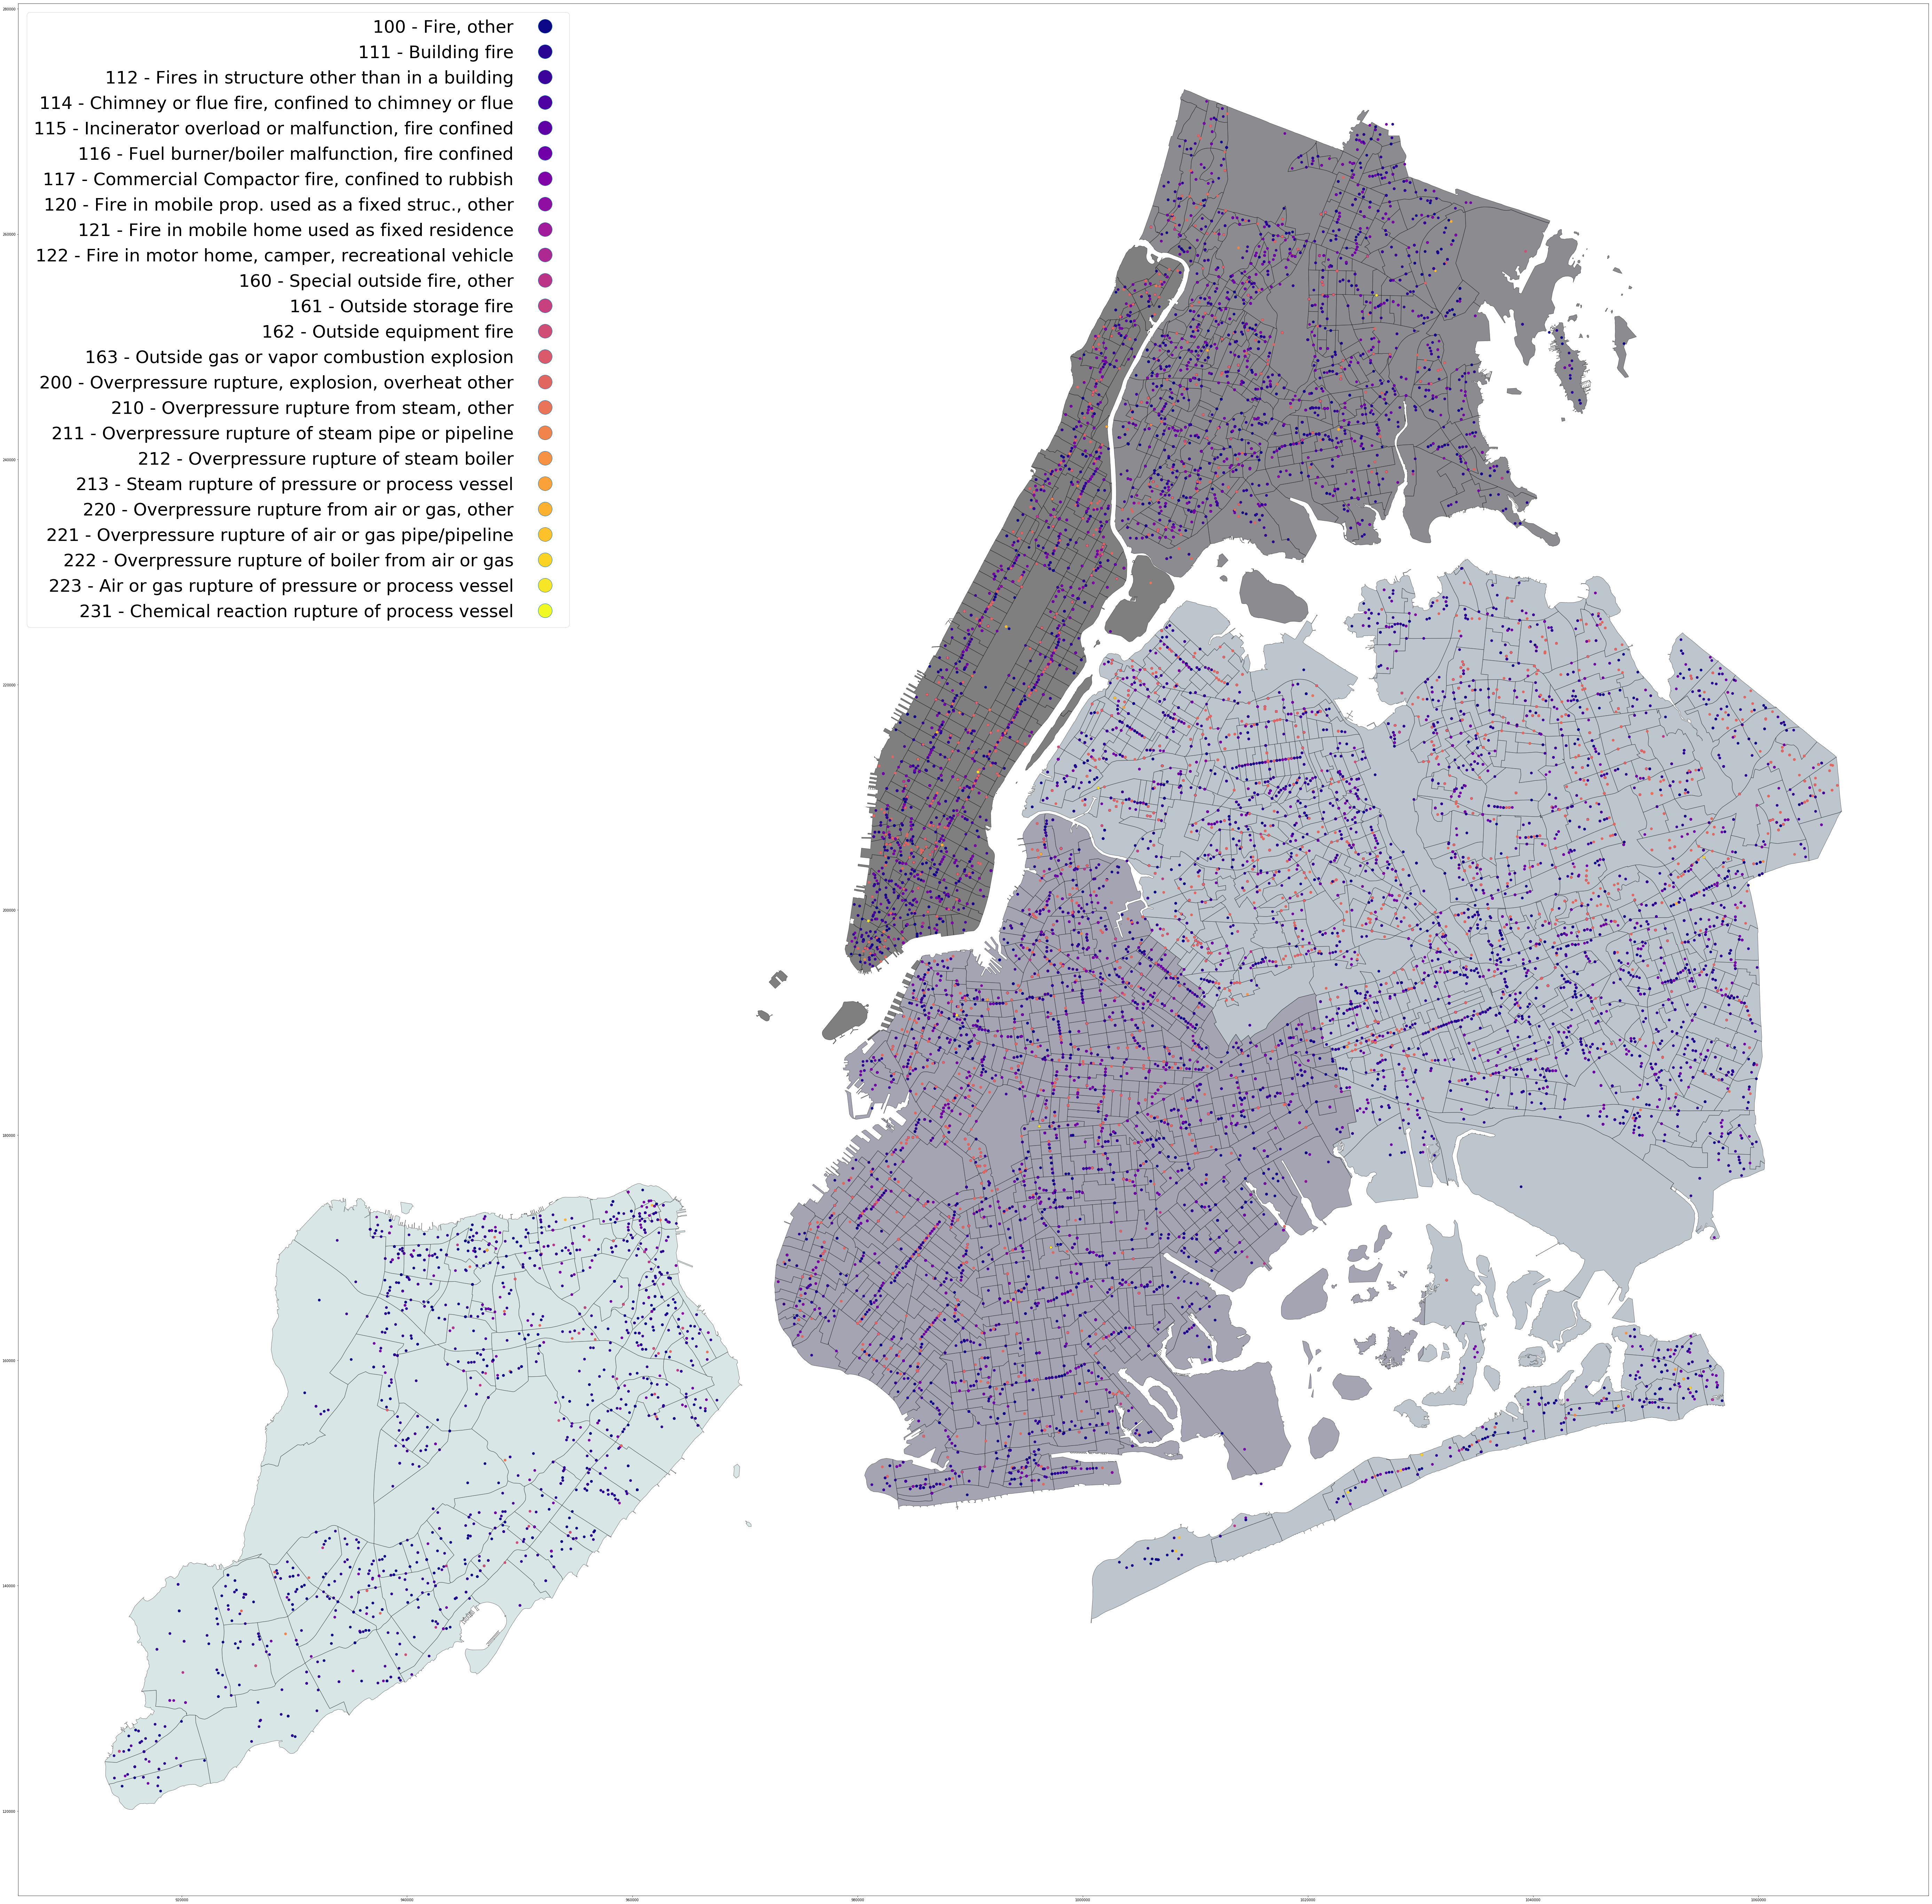

In [832]:
# Create map of all fire incident data over census tracts
fig,ax = plt.subplots(figsize = (100,100))
ct_shp.plot(ax = ax,edgecolor='k',column = 'BoroCode',cmap = 'bone', vmin = 0.5, vmax = 5,alpha = 0.5)
fire_points.plot(ax = ax, markersize = 45,
                 column = 'incident_type_desc',edgecolor = None,
                 cmap = 'plasma',legend = True,
                 legend_kwds = {'markerscale':4,
                                'fontsize':50,
                                'markerfirst':False,
                                'loc':2});

### Spatially Join GeoDataFrames

In [833]:
# Check that CRS for both are the same
fire_points.crs == ct_shp.crs

True

In [834]:
## Select columns to join from ct_shp
tracts = ct_shp[['BoroName','BoroCode','BoroCT2010','NTAName','NTACode','PUMA','geometry']]

In [835]:
## Spatially join both fire_point and tracts
## Census Tracts are joined to fire_points by the census tract each point is within
tract_fires = gpd.sjoin(fire_points,tracts,how= 'left',op = 'within')

In [836]:
tract_fires.isna().sum()

action_taken1_desc                  0
action_taken2_desc              18920
action_taken3_desc              34838
aes_presence_desc               44346
arrival_date_time                 390
borough_desc                        0
co_detector_present_desc        58197
detector_presence_desc          44346
fire_box                            2
fire_origin_below_grade_flag    56420
fire_spread_desc                44345
floor                           30407
highest_level_desc                129
im_incident_key                     0
incident_date_time                  0
incident_type_desc                  0
last_unit_cleared_date_time         0
property_use_desc                   0
standpipe_sys_present_flag      44342
story_fire_origin_count         44344
street_highway                      0
total_incident_duration           142
units_onscene                     533
zip_code                            0
borough                             0
incident_type_num                   0
lat         

In [837]:
## 10 points still have NAs for Census Tract, we can drop those points
tract_fires = tract_fires[tract_fires['BoroCT2010'].notna()]

In [838]:
tract_fires.shape

(58452, 39)

In [839]:
tract_fires.isna().sum()

action_taken1_desc                  0
action_taken2_desc              18919
action_taken3_desc              34834
aes_presence_desc               44337
arrival_date_time                 388
borough_desc                        0
co_detector_present_desc        58187
detector_presence_desc          44337
fire_box                            2
fire_origin_below_grade_flag    56410
fire_spread_desc                44336
floor                           30400
highest_level_desc                129
im_incident_key                     0
incident_date_time                  0
incident_type_desc                  0
last_unit_cleared_date_time         0
property_use_desc                   0
standpipe_sys_present_flag      44333
story_fire_origin_count         44335
street_highway                      0
total_incident_duration           142
units_onscene                     531
zip_code                            0
borough                             0
incident_type_num                   0
lat         

In [840]:
## Save joined geodataframes to CSV
tract_fires.to_csv('./census_tracts_fires.csv',index=False)

In [841]:
tract_fires.head().T

0  \
action_taken1_desc                11 - Extinguishment by fire service personnel   
action_taken2_desc                                               51 - Ventilate   
action_taken3_desc                                                          NaN   
aes_presence_desc                                                           NaN   
arrival_date_time                                       2018-06-30T23:58:53.000   
borough_desc                                                          2 - Bronx   
co_detector_present_desc                                                    NaN   
detector_presence_desc                                                      NaN   
fire_box                                                                   2135   
fire_origin_below_grade_flag                                                NaN   
fire_spread_desc                                                            NaN   
floor                                                                  basement   
highest_level_desc                                             11 - First Alarm   
im_incident_key                                                        63476762   
incident_date_time                                      2018-06-30T23:54:08.000   
incident_type_desc            117 - Commercial Compactor fire, confined to r...   
last_unit_cleared_date_time                             2018-07-01T00:19:16.000   
property_use_desc                                    429 - Multifamily dwelling   
standpipe_sys_present_flag                                                  NaN   
story_fire_origin_count                                                     NaN   
street_highway                                                         BROWN PL   
total_incident_duration                                                    1508   
units_onscene                                                                 5   
zip_code                                                                  10454   
borough                                                                   Bronx   
incident_type_num                                                           117   
lat                                                                     40.8069   
lon                                                                    -73.9208   
geoid                                                               36005002500   
geometry                            POINT (1006187.164915165 233275.6845102735)   
x                                                                   1.00619e+06   
y                                                                        233276   
index_right                                                                2032   
BoroName                                                                  Bronx   
BoroCode                                                                      2   
BoroCT2010                                                              2002500   
NTAName                                                  Mott Haven-Port Morris   
NTACode                                                                    BX39   
PUMA                                                                       3710   

                                                                              1  \
action_taken1_desc                11 - Extinguishment by fire service personnel   
action_taken2_desc                                               51 - Ventilate   
action_taken3_desc                                        64 - Shut down system   
aes_presence_desc                                                           NaN   
arrival_date_time                                       2018-06-30T22:11:36.000   
borough_desc                                                      1 - Manhattan   
co_detector_present_desc                                                    NaN   
detector_presence_desc                                                      NaN   
fire_box  